# Predecir la trayectoria e intensidad de huracanes aplicando modelos de aprendizaje automático, con enfoque en aquellos que amenacen las Islas de San Andrés y Providencia, Caribe colombiano

## Objetivo General
Predecir la trayectoria e intensidad de huracanes aplicando modelos de aprendizaje automático, con enfoque en aquellos que amenacen las Islas de San Andrés y Providencia, Caribe colombiano.


## Objetivos Específicos 

* Realizar extracción, transformación y carga (ETL) de datos mediante reglas para limpiar y organizar datos en bruto y prepararlos para el almacenamiento, el análisis de datos e implementación de modelos de ML para la predicción de la trayectoria e intensidad de huracanes.

* Realizar un Análisis Exploratorio de Datos (EDA) con base en la matriz de datos elaborada, como mecanismo para la detección de patrones importantes, datos faltantes y atípicos a tratar, así como también, el preprocesamiento de cada una de las variables de entrada de los modelos de aprendizaje automático, para la predicción de la trayectoria e intensidad de huracanes. 

* Implementar y evaluar distintos modelos estadísticos y de aprendizaje automático para la predicción de la trayectoria e intensidad de huracanes, mediante el uso de métricas de evaluación y validación cruzada adecuadas, así como métodos de optimización para la selección de parámetros.





### Librerías

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import joblib

# ETL 

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from geopy.distance import geodesic

In [141]:
df = pd.read_csv('hurdat2-1851-2023-051124.txt', sep= ',', names=['Date', 'Hour','RecIdentifier','type_storm','Latitude',
                                                              'Longitude','Max_wind','MinPress','NE34','SE34','SW34','NW34',
                                                              'NE50','SE50','SW50','NW50','NE64','SE64','SW64','NW64','Rad_Max_Wind'])

In [142]:
df.head(5)

Date                 Hour RecIdentifier type_storm Latitude Longitude  \
0  AL011851              UNNAMED            14        NaN      NaN       NaN   
1  18510625                 0000                       HU    28.0N     94.8W   
2  18510625                 0600                       HU    28.0N     95.4W   
3  18510625                 1200                       HU    28.0N     96.0W   
4  18510625                 1800                       HU    28.1N     96.5W   

   Max_wind  MinPress   NE34   SE34  ...   NW34   NE50   SE50   SW50   NW50  \
0       NaN       NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN   
1      80.0    -999.0 -999.0 -999.0  ... -999.0 -999.0 -999.0 -999.0 -999.0   
2      80.0    -999.0 -999.0 -999.0  ... -999.0 -999.0 -999.0 -999.0 -999.0   
3      80.0    -999.0 -999.0 -999.0  ... -999.0 -999.0 -999.0 -999.0 -999.0   
4      80.0    -999.0 -999.0 -999.0  ... -999.0 -999.0 -999.0 -999.0 -999.0   

    NE64   SE64   SW64   NW64  Rad_Max_Wind  
0    NaN    NaN    NaN    NaN           NaN  
1 -999.0 -999.0 -999.0 -999.0        -999.0  
2 -999.0 -999.0 -999.0 -999.0        -999.0  
3 -999.0 -999.0 -999.0 -999.0        -999.0  
4 -999.0 -999.0 -999.0 -999.0        -999.0  

[5 rows x 21 columns]

### organización del dataframe

In [143]:
# Agregar nuevas columnas para almacenar los valores extraídos
df["Code_storm"] = np.nan
df["Name_storm"] = np.nan
df["Trackets"] = np.nan

# Variables temporales para almacenar los valores
current_code, current_name, current_rec = None, None, None

for index, row in df.iterrows():
    if str(row["Date"]).startswith("AL"):
        current_code, current_name, current_rec = row["Date"], row["Hour"], row["RecIdentifier"]

    df.at[index, "Code_storm"] = current_code
    df.at[index, "Name_storm"] = current_name
    df.at[index, "Trackets"] = current_rec


# Eliminar filas donde la columna "Date" comienza con "AL"
df = df[~df["Date"].astype(str).str.startswith("AL")].reset_index(drop=True)

# Reubicar las columnas code_storm, name_storm y recIdentifier al inicio
column_order = ["Code_storm", "Name_storm", "Trackets"] + [col for col in df.columns if col not in ["Code_storm", "Name_storm", "Trackets"]]
df_procesado = df[column_order]

/var/folders/_p/446c73rj4x19qh7rmqlrf1980000gp/T/ipykernel_92315/687664288.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'AL011851' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[index, "Code_storm"] = current_code
/var/folders/_p/446c73rj4x19qh7rmqlrf1980000gp/T/ipykernel_92315/687664288.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '            UNNAMED' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[index, "Name_storm"] = current_name
/var/folders/_p/446c73rj4x19qh7rmqlrf1980000gp/T/ipykernel_92315/687664288.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '     14' has dtype incompatible with float64, please explicitly cast t

In [144]:
df.head(3)

Date   Hour RecIdentifier type_storm Latitude Longitude  Max_wind  \
0  18510625   0000                       HU    28.0N     94.8W      80.0   
1  18510625   0600                       HU    28.0N     95.4W      80.0   
2  18510625   1200                       HU    28.0N     96.0W      80.0   

   MinPress   NE34   SE34  ...   SW50   NW50   NE64   SE64   SW64   NW64  \
0    -999.0 -999.0 -999.0  ... -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   
1    -999.0 -999.0 -999.0  ... -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   
2    -999.0 -999.0 -999.0  ... -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   

   Rad_Max_Wind  Code_storm           Name_storm  Trackets  
0        -999.0    AL011851              UNNAMED        14  
1        -999.0    AL011851              UNNAMED        14  
2        -999.0    AL011851              UNNAMED        14  

[3 rows x 24 columns]

### ajustando las coordenadas a un formato numérico

In [145]:
# Extraer el valor numérico y convertirlo a formato numérico
df_procesado['Lat_N'] = pd.to_numeric(df_procesado['Latitude'].str.extract(r'(\d+\.\d+)', expand=False))
df_procesado['Lon_W'] = pd.to_numeric(df_procesado['Longitude'].str.extract(r'(\d+\.\d+)', expand=False))


# Eliminar las columnas originales 'Latitude' y 'Longitude'
df_procesado.drop(['Latitude', 'Longitude'], axis=1, inplace=True)

/var/folders/_p/446c73rj4x19qh7rmqlrf1980000gp/T/ipykernel_92315/2514829948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_procesado['Lat_N'] = pd.to_numeric(df_procesado['Latitude'].str.extract(r'(\d+\.\d+)', expand=False))
/var/folders/_p/446c73rj4x19qh7rmqlrf1980000gp/T/ipykernel_92315/2514829948.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_procesado['Lon_W'] = pd.to_numeric(df_procesado['Longitude'].str.extract(r'(\d+\.\d+)', expand=False))


### ajuste de los targets de la variable Type_storm y el Codigo de tormenta (Code_storm)

In [146]:
# Cambia la columna 'nombre_columna' a tipo string
df_procesado['type_storm'] = df_procesado['type_storm'].astype(str) # Para asegurar que sea tipo String

df_procesado['type_storm'] = df_procesado['type_storm'].str.strip().str.upper() # Asegurar que no haya espacios en los targets y todo sean en MAYUS

df_procesado['Code_storm'] = df_procesado['Code_storm'].astype(str)
df_procesado['Code_storm'] = df_procesado['Code_storm'].str.strip().str.upper()

### Ajuste en los datos de fecha

In [147]:
df_procesado['Date'] = pd.to_datetime(df_procesado['Date'], format='%Y%m%d', errors='coerce')

#Convertir la columna en Date en datetime
#hrc['Date'] = pd.to_datetime(hrc['Date'])

# Crear nuevas columnas para año, mes y día
df_procesado['year'] = df_procesado['Date'].dt.year
df_procesado['month'] = df_procesado['Date'].dt.month
df_procesado['day'] = df_procesado['Date'].dt.day

# Eliminar la columna original "Date"
df_procesado.drop('Date', axis=1, inplace=True)

In [148]:
# Reorganizar las columnas: mover 'Año', 'Mes' y 'Día' a las posiciones 3, 4 y 5
columnas = list(df_procesado.columns)
# Insertar las nuevas columnas en las posiciones deseadas
columnas_nuevas = ['year', 'month', 'day']
for i, columna in enumerate(columnas_nuevas):
    columnas.remove(columna)  # Eliminar la columna de su posición original
    columnas.insert(3 + i, columna)  # Insertar en la nueva posición (3, 4 y 5)

# Reordenar el DataFrame
df_procesado = df_procesado[columnas]

In [149]:
# Conversión y separación de la hora y los minutos
df_procesado['Hour'] = df_procesado['Hour'].astype(int)  # Asegurar enteros
df_procesado['hour'] = df_procesado['Hour'] // 100  # División entera para las horas
#df_procesado['minuto'] = df_procesado['Hour'] % 100  # Resto para los minutos

df_procesado.drop('Hour', axis=1)

Code_storm           Name_storm Trackets  year  month  day  \
0       AL011851              UNNAMED       14  1851      6   25   
1       AL011851              UNNAMED       14  1851      6   25   
2       AL011851              UNNAMED       14  1851      6   25   
3       AL011851              UNNAMED       14  1851      6   25   
4       AL011851              UNNAMED       14  1851      6   25   
...          ...                  ...      ...   ...    ...  ...   
54744   AL212023           TWENTY-ONE        6  2023     10   23   
54745   AL212023           TWENTY-ONE        6  2023     10   24   
54746   AL212023           TWENTY-ONE        6  2023     10   24   
54747   AL212023           TWENTY-ONE        6  2023     10   24   
54748   AL212023           TWENTY-ONE        6  2023     10   24   

      RecIdentifier type_storm  Max_wind  MinPress  ...   SW50   NW50   NE64  \
0                           HU      80.0    -999.0  ... -999.0 -999.0 -999.0   
1                           HU      80.0    -999.0  ... -999.0 -999.0 -999.0   
2                           HU      80.0    -999.0  ... -999.0 -999.0 -999.0   
3                           HU      80.0    -999.0  ... -999.0 -999.0 -999.0   
4                 L         HU      80.0    -999.0  ... -999.0 -999.0 -999.0   
...             ...        ...       ...       ...  ...    ...    ...    ...   
54744                       TD      25.0    1007.0  ...    0.0    0.0    0.0   
54745                       TD      25.0    1007.0  ...    0.0    0.0    0.0   
54746             L         TD      25.0    1007.0  ...    0.0    0.0    0.0   
54747                       TD      25.0    1007.0  ...    0.0    0.0    0.0   
54748                       LO      20.0    1007.0  ...    0.0    0.0    0.0   

        SE64   SW64   NW64  Rad_Max_Wind  Lat_N  Lon_W  hour  
0     -999.0 -999.0 -999.0        -999.0   28.0   94.8     0  
1     -999.0 -999.0 -999.0        -999.0   28.0   95.4     6  
2     -999.0 -999.0 -999.0        -999.0   28.0   96.0    12  
3     -999.0 -999.0 -999.0        -999.0   28.1   96.5    18  
4     -999.0 -999.0 -999.0        -999.0   28.2   96.8    21  
...      ...    ...    ...           ...    ...    ...   ...  
54744    0.0    0.0    0.0          60.0   11.5   83.2    18  
54745    0.0    0.0    0.0          60.0   12.2   83.4     0  
54746    0.0    0.0    0.0          60.0   12.4   83.5     1  
54747    0.0    0.0    0.0          60.0   13.0   83.8     6  
54748    0.0    0.0    0.0          60.0   13.5   84.4    12  

[54749 rows x 26 columns]

In [150]:
df_procesado.drop('Hour', axis=1, inplace=True) # Eliminar la columna Hour

In [151]:
# Move 'hora' and 'minuto' columns to positions 7 and 8
cols = list(df_procesado.columns)
cols.insert(7, cols.pop(cols.index('hour')))
#cols.insert(8, cols.pop(cols.index('minuto')))
df_procesado = df_procesado[cols]

df_procesado.head(3)

Code_storm           Name_storm Trackets  year  month  day RecIdentifier  \
0   AL011851              UNNAMED       14  1851      6   25                 
1   AL011851              UNNAMED       14  1851      6   25                 
2   AL011851              UNNAMED       14  1851      6   25                 

   hour type_storm  Max_wind  ...   SE50   SW50   NW50   NE64   SE64   SW64  \
0     0         HU      80.0  ... -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   
1     6         HU      80.0  ... -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   
2    12         HU      80.0  ... -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   

    NW64  Rad_Max_Wind  Lat_N  Lon_W  
0 -999.0        -999.0   28.0   94.8  
1 -999.0        -999.0   28.0   95.4  
2 -999.0        -999.0   28.0   96.0  

[3 rows x 26 columns]

In [152]:
df_procesado['fecha'] = pd.to_datetime(
    df_procesado[['year', 'month', 'day', 'hour']]
    )


In [153]:
df_procesado

Code_storm           Name_storm Trackets  year  month  day  \
0       AL011851              UNNAMED       14  1851      6   25   
1       AL011851              UNNAMED       14  1851      6   25   
2       AL011851              UNNAMED       14  1851      6   25   
3       AL011851              UNNAMED       14  1851      6   25   
4       AL011851              UNNAMED       14  1851      6   25   
...          ...                  ...      ...   ...    ...  ...   
54744   AL212023           TWENTY-ONE        6  2023     10   23   
54745   AL212023           TWENTY-ONE        6  2023     10   24   
54746   AL212023           TWENTY-ONE        6  2023     10   24   
54747   AL212023           TWENTY-ONE        6  2023     10   24   
54748   AL212023           TWENTY-ONE        6  2023     10   24   

      RecIdentifier  hour type_storm  Max_wind  ...   SW50   NW50   NE64  \
0                       0         HU      80.0  ... -999.0 -999.0 -999.0   
1                       6         HU      80.0  ... -999.0 -999.0 -999.0   
2                      12         HU      80.0  ... -999.0 -999.0 -999.0   
3                      18         HU      80.0  ... -999.0 -999.0 -999.0   
4                 L    21         HU      80.0  ... -999.0 -999.0 -999.0   
...             ...   ...        ...       ...  ...    ...    ...    ...   
54744                  18         TD      25.0  ...    0.0    0.0    0.0   
54745                   0         TD      25.0  ...    0.0    0.0    0.0   
54746             L     1         TD      25.0  ...    0.0    0.0    0.0   
54747                   6         TD      25.0  ...    0.0    0.0    0.0   
54748                  12         LO      20.0  ...    0.0    0.0    0.0   

        SE64   SW64   NW64  Rad_Max_Wind  Lat_N  Lon_W               fecha  
0     -999.0 -999.0 -999.0        -999.0   28.0   94.8 1851-06-25 00:00:00  
1     -999.0 -999.0 -999.0        -999.0   28.0   95.4 1851-06-25 06:00:00  
2     -999.0 -999.0 -999.0        -999.0   28.0   96.0 1851-06-25 12:00:00  
3     -999.0 -999.0 -999.0        -999.0   28.1   96.5 1851-06-25 18:00:00  
4     -999.0 -999.0 -999.0        -999.0   28.2   96.8 1851-06-25 21:00:00  
...      ...    ...    ...           ...    ...    ...                 ...  
54744    0.0    0.0    0.0          60.0   11.5   83.2 2023-10-23 18:00:00  
54745    0.0    0.0    0.0          60.0   12.2   83.4 2023-10-24 00:00:00  
54746    0.0    0.0    0.0          60.0   12.4   83.5 2023-10-24 01:00:00  
54747    0.0    0.0    0.0          60.0   13.0   83.8 2023-10-24 06:00:00  
54748    0.0    0.0    0.0          60.0   13.5   84.4 2023-10-24 12:00:00  

[54749 rows x 27 columns]

### Se verifican datos duplicados y se reemplaza -99 por NaN

In [154]:
duplicados = df_procesado.duplicated()
print(duplicados.sum())

0


In [155]:
# Reemplazar -999 por NaN en todo el DataFrame
df_procesado.replace(-999, np.nan, inplace=True)
df_procesado.replace(-99, np.nan, inplace=True)

### Eliminación de la variable Rad_Max_wind

Los valores de esta variable solo han sido rastreados de manera precisa a partir de 2021. Por ende, es la variable que cuenta con menor cantidad de datos, teniendo 1331 registros o filas, lo cual representa el 2.46% del set de datos total. Por este motivo, se decidió borrar esta variable del conjunto de datos.  

Esta variable corresponde a los Radio de Vientos Máximos: Es la distancia desde el centro de un ciclón tropical hasta la ubicación de los vientos máximos del ciclón. En huracanes bien desarrollados, el radio de vientos máximos generalmente se encuentra en el borde interior de la pared del ojo (https://www.nhc.noaa.gov/aboutgloss.shtml#a)


In [156]:
# Eliminar la columna 'Rad_Max_Wind'
df_procesado.drop('Rad_Max_Wind', axis=1, inplace=True)

RecIdentifier y Trackets son variables descriptivas asociadas a la toma de información, número de tracks registrados y ...

In [157]:
df_procesado.drop(columns=['RecIdentifier', 'Trackets'], inplace=True)

In [158]:
df_ETL = df_procesado

# EDA #1

## Datos faltantes

In [159]:
df_ETL.head(3)

Code_storm           Name_storm  year  month  day  hour type_storm  \
0   AL011851              UNNAMED  1851      6   25     0         HU   
1   AL011851              UNNAMED  1851      6   25     6         HU   
2   AL011851              UNNAMED  1851      6   25    12         HU   

   Max_wind  MinPress  NE34  ...  SE50  SW50  NW50  NE64  SE64  SW64  NW64  \
0      80.0       NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1      80.0       NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2      80.0       NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   Lat_N  Lon_W               fecha  
0   28.0   94.8 1851-06-25 00:00:00  
1   28.0   95.4 1851-06-25 06:00:00  
2   28.0   96.0 1851-06-25 12:00:00  

[3 rows x 24 columns]

In [160]:
# Procederemos a ver Missing values a través de msno.matrix
import missingno as msno
msno.matrix(df_ETL)

<Axes: >

In [161]:
df_ETL.isnull().sum()

Code_storm        0
Name_storm        0
year              0
month             0
day               0
hour              0
type_storm        0
Max_wind         57
MinPress      30948
NE34          43802
SE34          43802
SW34          43802
NW34          43802
NE50          43802
SE50          43802
SW50          43802
NW50          43802
NE64          43802
SE64          43802
SW64          43802
NW64          43802
Lat_N             0
Lon_W             0
fecha             0
dtype: int64

Los datos faltantes corresponden a lo siguiente:

* "Minpress", "solo se incluían valores si había una observación específica que pudiera utilizarse explicitamente". A partir de 1979, se analizaba e incluía toda medición incluso si no fuese una medición in situ especifica.



* NE34 to NW64: Estos valores están disponibles a partir de 2004 con una resolución de hasta 5 millas nauticas. Las columnas de NE34 a NW64 hace referencia al Wind Radii o *Radios de viento*. "Se refiere a la distancia desde el centro de un huracán hasta donde los vientos alcanzan ciertas velocidades específicas, medidas en diferentes cuadrantes (noreste, sureste, suroeste y noroeste). Se utilizan para describir el tamaño del huracán y la extensión de los vientos peligrosos en diferentes direcciones". La distribución de los vientos alrededor de un huracán no es simétrica, entre mas lejos del ojo del huracán los vientos disminuyen y los vientos del lado derecho de la tormenta son mas fuertes en relación al lado izquierdo (De acuerdo a la dirección) (George & Gray, 1976).         
*NOTA*:Si bien es cierto que se observaron patrones importantes y que coinciden con la literatura de que son características importantes en cada estado de tormenta, la realidad es que la medición y obtención de estos radios en tiempo real no es práctica lo que entorpece el funcionamiento de un modelo operativo en tiempo real, además dentro del set de datos de HURDAT2 solo se tienen datos desde el 2004 hasta el año presente, y aunque se exploró la estrategia de imputar datos, esta no fue finalmente realizada ni incluida en el trabajo, ya que la naturaleza de la variable se presta para un trabajo adicional enfocado solamente en los radios del viento de los huracanes, por ello, se recomienda tenerla en cuenta para futuros trabajos o incluso explorar la predicción de esta variable importante en los huracanes






Gray, W. M., & Shea, D. J. (1976). Data summary of NOAA's hurricane inner-core radial leg flight penetrations 1957-1967, and 1969. Department of Atmospheric Sciences, Colorado State University.

## Exploración de los Radios del viento

In [162]:
def find_negative_wind_radii(df):

  negative_values = {}
  for col in df.columns:
    if 'NW' in col or 'NE' in col or 'SE' in col or 'SW' in col:
      negative_rows = df[df[col] < 0]
      if not negative_rows.empty:
        negative_values[col] = negative_rows.index.tolist()
  return negative_values


negative_wind_radii = find_negative_wind_radii(df_ETL)

if negative_wind_radii:
  print("Valores negativos en las columnas NW, NE, SE y SW y sus posiciones:")
  for col, rows in negative_wind_radii.items():
    print(f"Columna: {col}")
    print(f"Filas con valores negativos: {rows}")
else:
  print("No se encontraron valores negativos en las columnas NW, NE, SE y SW.")

No se encontraron valores negativos en las columnas NW, NE, SE y SW.


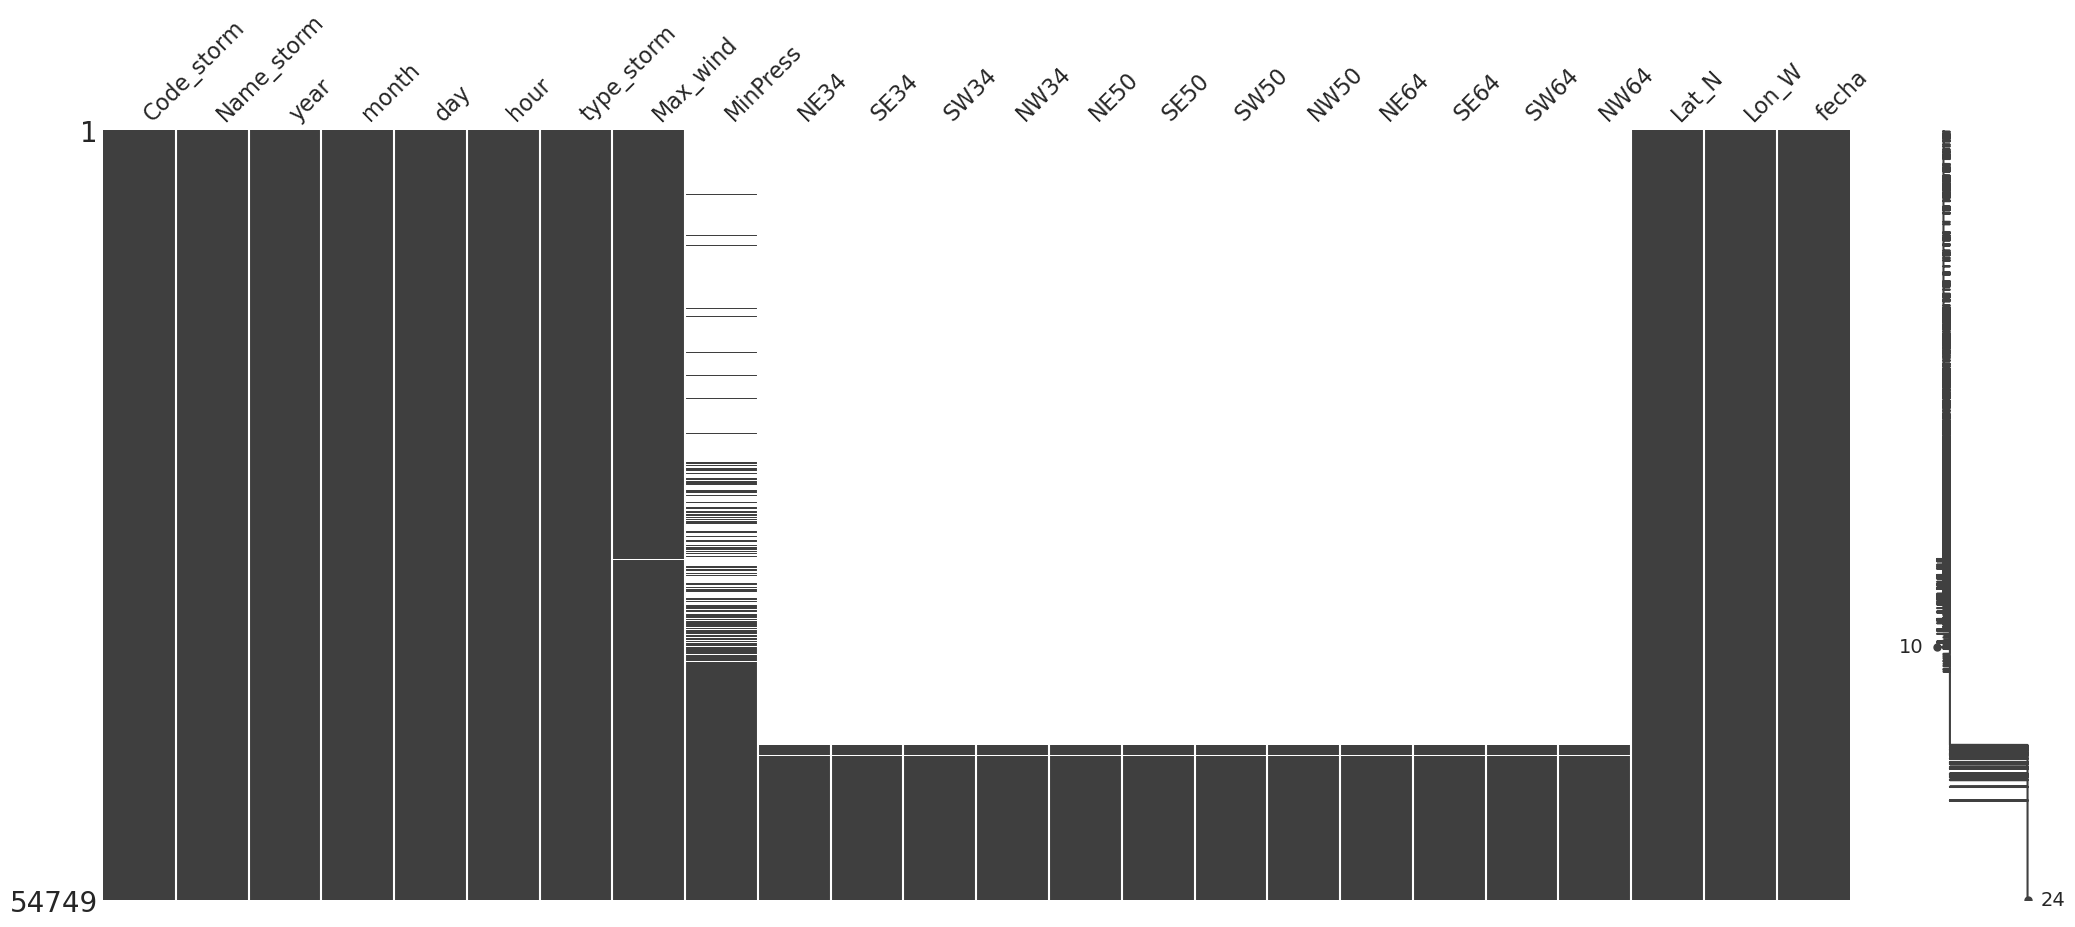

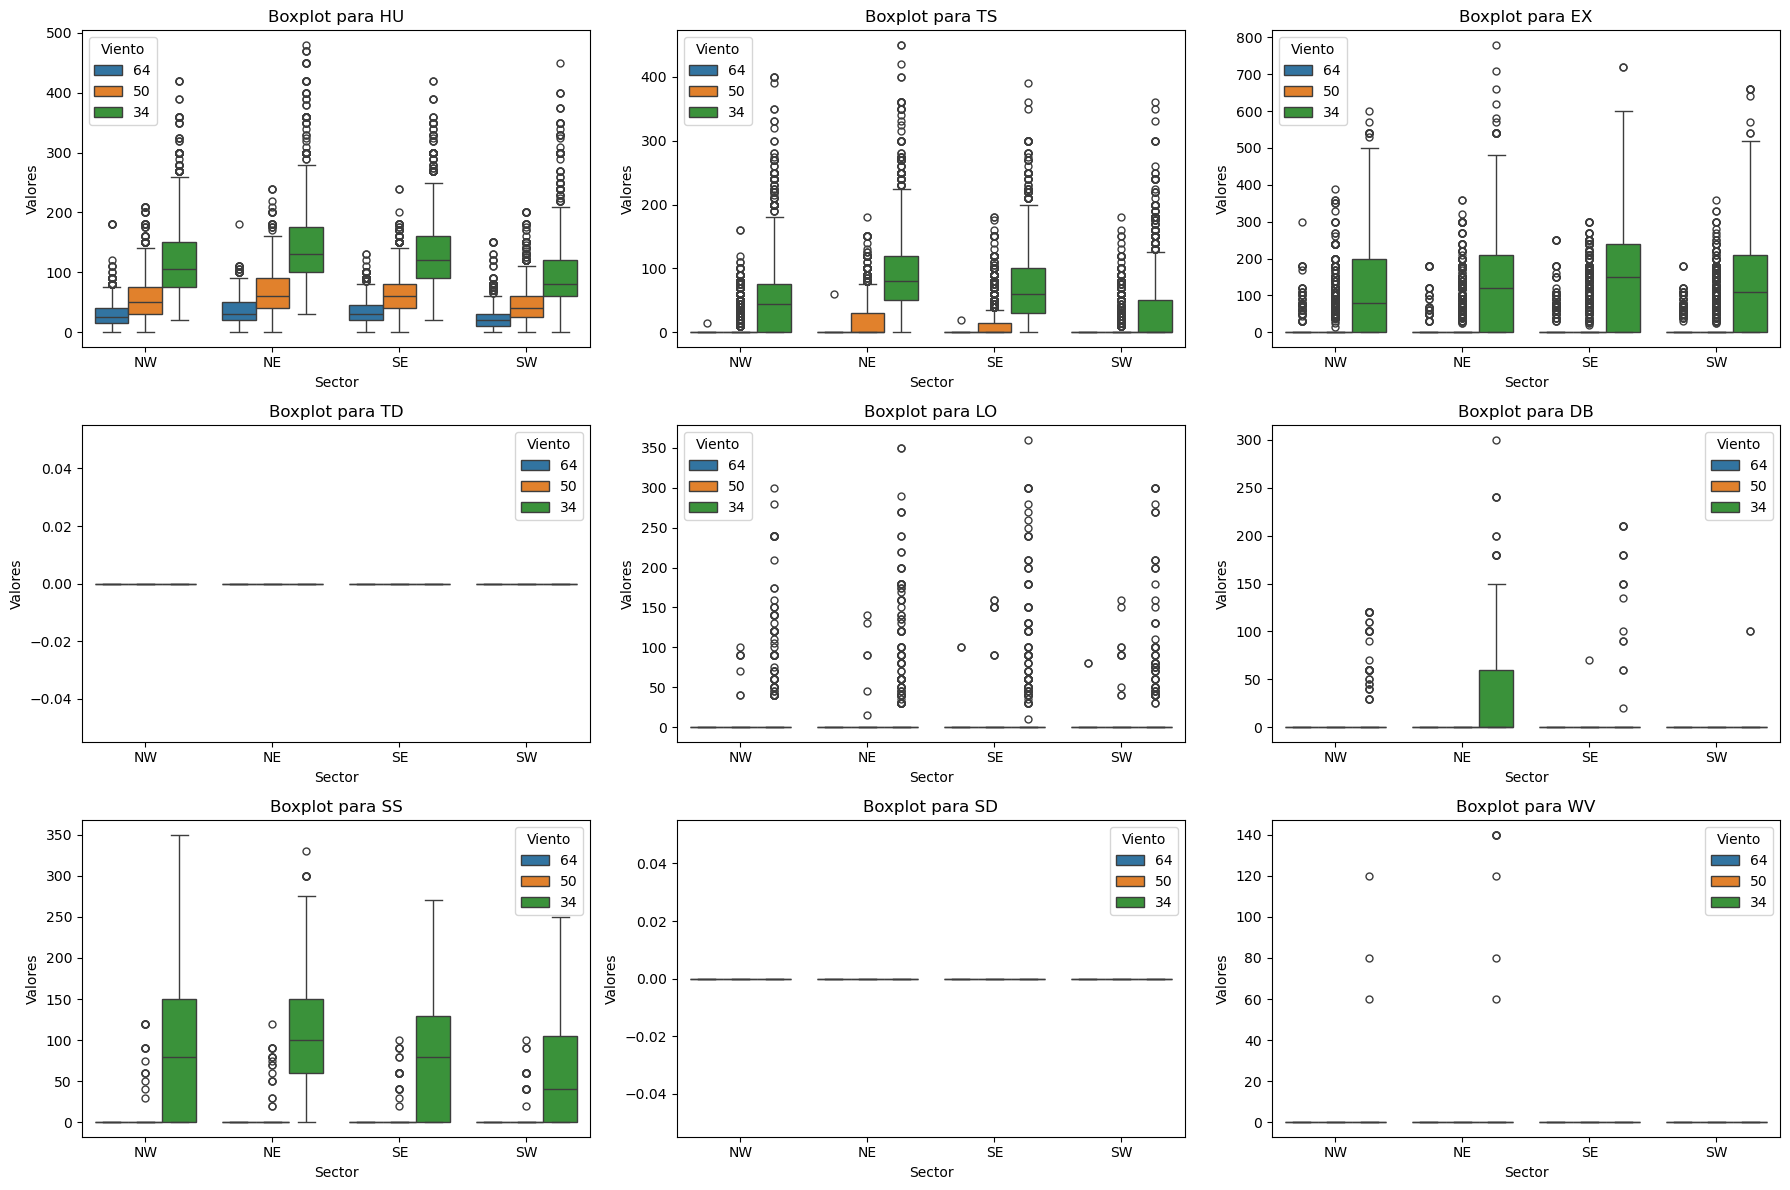

In [163]:
def boxplots_windrad(dataframe):
    """
    Genera gráficos de caja (boxplot) de NW, NE, SE y SW organizados en una cuadrícula de 3x3
    para cada tipo de tormenta en el dataframe, incluyendo los tres campos de viento (64, 50, 34).
    Los outliers tienen el mismo color que las cajas de cada campo de viento y no tienen borde negro.

    :param dataframe: DataFrame con los datos de tormentas.
    """
    counter = 0

    # Definir colores personalizados para cada velocidad de viento
    colores = {'64': 'blue', '50': 'green', '34': 'red'}

    for storm_type in dataframe['type_storm'].unique():
        if counter % 9 == 0:
            fig, axes = plt.subplots(3, 3, figsize=(18, 12))
            fig_index = 0

        row, col = divmod(fig_index, 3)

        subset = dataframe[dataframe['type_storm'] == storm_type]

        # Transformar los datos usando melt
        data_melted = subset.melt(value_vars=[f'NW64', f'NE64', f'SE64', f'SW64',
                                              f'NW50', f'NE50', f'SE50', f'SW50',
                                              f'NW34', f'NE34', f'SE34', f'SW34'],
                                  var_name='Sector_Viento', value_name='Valor')

        # Extraer información de la columna Sector_Viento
        data_melted['Sector'] = data_melted['Sector_Viento'].str[:2]  # NW, NE, SE, SW
        data_melted['Viento'] = data_melted['Sector_Viento'].str[2:]  # 64, 50, 34

        # Crear el boxplot con outliers personalizados
        boxplot = sns.boxplot(
            x='Sector',
            y='Valor',
            hue='Viento',
            data=data_melted,
            ax=axes[row, col],
            flierprops={'marker': 'o', 'markersize': 5, 'linestyle': 'none'}  # Configurar outliers
        )

        # Personalizar los colores de outliers según su grupo de viento
        for artist, label in zip(boxplot.artists, sorted(colores.keys())):
            color = colores[label]
            artist.set_facecolor(color)  # Color de la caja
            artist.set_edgecolor(color)  # Color del borde de la caja

            # Personalizar los outliers
            for line in boxplot.lines:
                if 'fliers' in line.get_label():
                    line.set_markerfacecolor(color)  # Misma tonalidad de la caja
                    line.set_markeredgecolor('none')  # Sin borde negro

        axes[row, col].set_title(f'Boxplot para {storm_type}')
        axes[row, col].set_xlabel('Sector')
        axes[row, col].set_ylabel('Valores')

        fig_index += 1
        counter += 1

        if fig_index == 9 or counter == len(dataframe['type_storm'].unique()):
            plt.tight_layout()
            plt.show()



sns.reset_defaults()
boxplots_windrad(df_ETL)

Estas cajas de bigote muestran la distribución de los datos en cada cuadrante de la tormenta (NE, NW, SE, SW). Cada cuadrante puede presentar hasta 3 radios de vientos, en azul (64kt), naranja (50kt) y verde (34kt). Las gráficas de boxplot fueron realizadas para cada estado de la tormenta (WV, SD, SS, DB, LO, TD, EX, TS, HU)

* DB – Perturbación (de cualquier intensidad)
* WV – Onda tropical (de cualquier intensidad)
* LO – Baja no ciclónica (de cualquier intensidad)
* TD – Depresión tropical (< 34 nudos)
* SD – Depresión subtropical (< 34 nudos)
* TS – Tormenta tropical (34-63 nudos)
* SS – Tormenta subtropical (> 34 nudos)
* EX – Ciclón extratropical (de cualquier intensidad
* HU – Huracán (> 64 nudos)

Se aprecian valores extremos en todas las cateegorias de Huracanes, además hay presencia de Radios del viento en LO, DB, y WV, lo cual puede parecer atípico en estos estados de tormenta, ya que son tormentas muy debiles como para tener una formación ciclonica y por ende radios de vientos, pero no son erroneos ya que un Huracan puede disminuir a un estado de tormenta muy debil como estos y de esta manera quedan remanentes de estos radios.

También, se puede observar que las bandas de 34, 50 y 64 nudos, se presentan especificamente en ciertas categorías de la tormenta, estando presente los 3 casos en la categoría de huracán (HU) y con la mayor distribución de valores (Km)

Se destaca también que la categoría Tormenta tropical (TS) registra valores de distancia para las bandas de 50 y 34 nudos solamente. Según (McKenzie, 2017) el radio del viento 64 está reservado para los ciclones tropicales con fuerza de huracán.



McKenzie III, T. B. (2017). A climatology of tropical cyclone size in the western North Pacific using an alternative metric (Master's thesis, The Florida State University).

In [164]:
df_EDA = df_ETL.copy()

In [165]:
df_EDA = df_EDA.drop(columns=['NE34', 'SE34', 'SW34', 'NW34', 'NE50', 'SE50', 'SW50', 'NW50', 'NE64', 'SE64', 'SW64', 'NW64'])
df_EDA.head(3)


Code_storm           Name_storm  year  month  day  hour type_storm  \
0   AL011851              UNNAMED  1851      6   25     0         HU   
1   AL011851              UNNAMED  1851      6   25     6         HU   
2   AL011851              UNNAMED  1851      6   25    12         HU   

   Max_wind  MinPress  Lat_N  Lon_W               fecha  
0      80.0       NaN   28.0   94.8 1851-06-25 00:00:00  
1      80.0       NaN   28.0   95.4 1851-06-25 06:00:00  
2      80.0       NaN   28.0   96.0 1851-06-25 12:00:00

## Agregar Categorias de Huracan & "type_storm" numérico

* DB – Perturbación (de cualquier intensidad)
* WV – Onda tropical (de cualquier intensidad)
* LO – Baja no ciclónica (de cualquier intensidad)
* TD – Depresión tropical (< 34 nudos)
* SD – Depresión subtropical (< 34 nudos)
* TS – Tormenta tropical (34-63 nudos)
* SS – Tormenta subtropical (> 34 nudos)
* EX – Ciclón extratropical (de cualquier intensidad
* HU – Huracán (> 64 nudos)

In [166]:
def clasificacion_huracan(df):
    '''
    64-82       Cat 1
    83-95       Cat 2
    96-113      Cat 3
    114-135     Cat 4
    Mayor 135 Cat 5
    '''
    condiciones = [
        (df['Max_wind'] >= 64) & (df['Max_wind'] <= 82),
        (df['Max_wind'] >= 83) & (df['Max_wind'] <= 95),
        (df['Max_wind'] >= 96) & (df['Max_wind'] <= 113),
        (df['Max_wind'] >= 114) & (df['Max_wind'] <= 135),
        (df['Max_wind'] > 135)
    ]

    categorias = ['Cat 1', 'Cat 2', 'Cat 3', 'Cat 4', 'Cat 5']

    # Crear una nueva columna en el DataFrame con las categorías de huracanes
    df['categoria_huracan'] = np.select(condiciones, categorias,default='Sin categoria')

    return df

In [167]:
df_EDA = clasificacion_huracan(df_EDA)

In [168]:
# Reemplazar 'HU' en 'type_storm' por el valor de 'categoria_huracan' de la misma fila
df_EDA.loc[df_EDA['type_storm'] == 'HU', 'type_storm'] = df_EDA.loc[df_EDA['type_storm'] == 'HU', 'categoria_huracan']

df_EDA.drop('categoria_huracan', axis=1, inplace=True)

Las filas 25198 y 25199 presentaban categoría "HU" o sea Huracán. Sin embargo, la velocidad de viento máxima en estos dos registros fue de 60 nudos, lo cual está por debajo de los límites de la escala Saffir-Simpson que categoriza los estados Huracán de 1 a 5. Siendo 5 el mas fuerte. 


Esto pudo deberse a un error al ingresar los datos por parte del NHC (Centro nacional de Huracanes de EE.UU) o que los vientos del viento de huracán se debilitaron pero se conservó el estado de la tormenta en "HU".

En cualquier caso, se decide eliminar estas dos filas para no generar ruido en los modelos de clasificación.

In [169]:
df_EDA = df_EDA.drop([25198, 25199])

A continuación procedemos a convertir las categorias a númericas de manera manual, quiere decir, asignarle valores especificos para cada estado de tormenta. 

Se usa el siguiente Mapeo, empezando el 1 con "TD" hasta 7 con "HU-Cat5" porque se usarán estas categorías para los modelos de clasificación de categorías. 

Mientras que las restantes, se les coloca números restantes en orden, pero estas categorías no serán usadas para entrenar los modelos. Porque lo ideal es que la operatividad de los modelos empiece desde el estado de Depresión Tropical (TD). Además de simplificar el problema a menos categorías. 

In [170]:
# Mapeo manual
mapeo_target = {'TD': 1, 'TS': 2, 'Cat 1': 3, 'Cat 2': 4, 'Cat 3': 5, 'Cat 4': 6, 'Cat 5': 7,
                'DB': 13, 'WV': 12, 'LO': 11, 'SD': 10, 'SS': 9, 'EX': 8,}

# Aplicar el mapeo a la columna 'type_storm'
df_EDA['type_storm_n'] = df_EDA['type_storm'].map(mapeo_target)

In [171]:
df_EDA.head()

Code_storm           Name_storm  year  month  day  hour type_storm  \
0   AL011851              UNNAMED  1851      6   25     0      Cat 1   
1   AL011851              UNNAMED  1851      6   25     6      Cat 1   
2   AL011851              UNNAMED  1851      6   25    12      Cat 1   
3   AL011851              UNNAMED  1851      6   25    18      Cat 1   
4   AL011851              UNNAMED  1851      6   25    21      Cat 1   

   Max_wind  MinPress  Lat_N  Lon_W               fecha  type_storm_n  
0      80.0       NaN   28.0   94.8 1851-06-25 00:00:00             3  
1      80.0       NaN   28.0   95.4 1851-06-25 06:00:00             3  
2      80.0       NaN   28.0   96.0 1851-06-25 12:00:00             3  
3      80.0       NaN   28.1   96.5 1851-06-25 18:00:00             3  
4      80.0       NaN   28.2   96.8 1851-06-25 21:00:00             3

## Imputación de Presión Mínima "Minpress"

Test de Kolmogorov-Smirnov por tipo de tormenta:
     Tipo  Estadístico       p-valor  Normal
0   Cat 3     0.064777  1.078040e-03   False
1   Cat 4     0.074709  7.057064e-04   False
2      TS     0.105658  1.278932e-79   False
3   Cat 2     0.083973  5.717901e-09   False
4   Cat 1     0.078087  2.428718e-18   False
5      EX     0.097321  2.375355e-21   False
6      TD     0.116633  6.662224e-47   False
7   Cat 5     0.090982  1.945478e-01    True
8      DB     0.102283  3.346421e-02   False
9      SS     0.081447  1.798898e-03   False
10     LO     0.150243  9.183964e-33   False
11     SD     0.087572  4.812734e-02   False
12     WV     0.147376  1.439014e-02   False


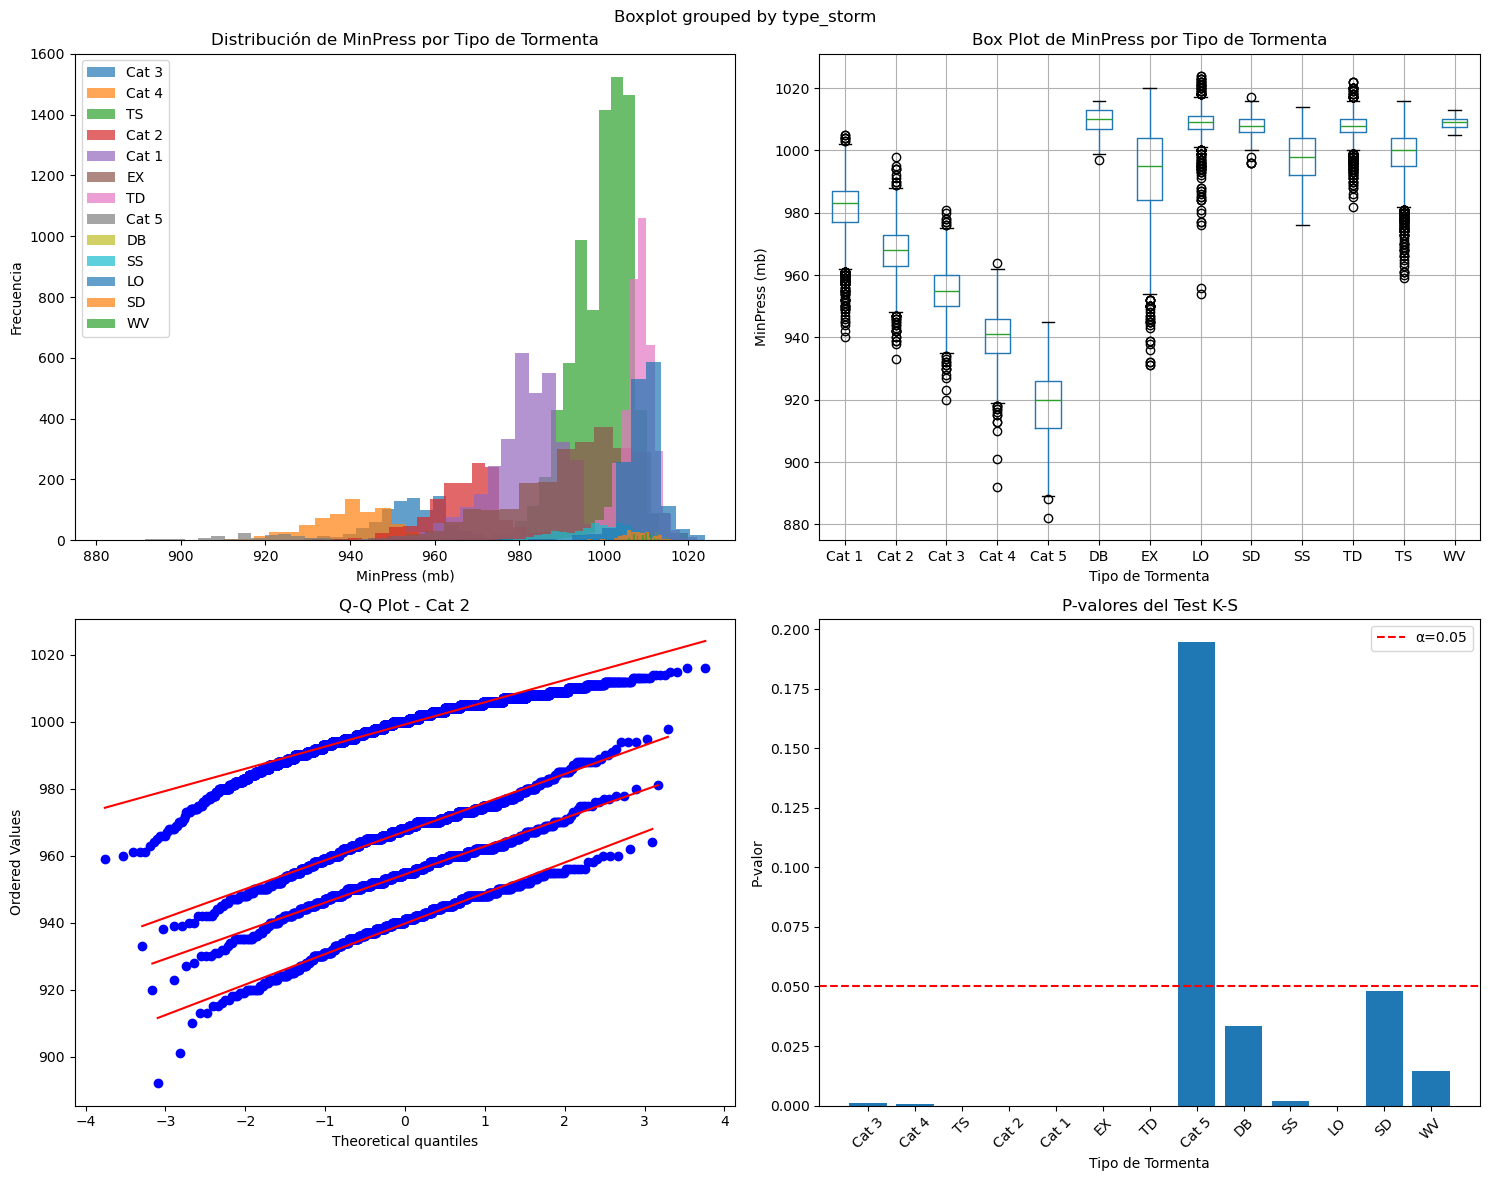


Estadísticas descriptivas por tipo de tormenta:
             count         mean        std     min     25%     50%     75%  \
type_storm                                                                   
Cat 1       3374.0   981.616183   8.958149   940.0   977.0   983.0   987.0   
Cat 2       1389.0   967.252700   8.639777   933.0   963.0   968.0   973.0   
Cat 3        891.0   954.445567   8.447067   920.0   950.0   955.0   960.0   
Cat 4        707.0   939.773692   9.209537   892.0   935.0   941.0   946.0   
Cat 5        137.0   918.116788  12.244486   882.0   911.0   920.0   926.0   
DB           192.0  1009.463542   3.783226   997.0  1007.0  1010.0  1013.0   
EX          2535.0   992.485602  14.530555   931.0   984.0   995.0  1004.0   
LO          1639.0  1008.758999   5.121110   954.0  1007.0  1009.0  1011.0   
SD           239.0  1007.861925   3.653273   996.0  1006.0  1008.0  1010.0   
SS           524.0   997.458015   7.712580   976.0   992.0   998.0  1004.0   
TD          391

In [172]:
# Eliminar filas con NaN
hrc_press = df_EDA.copy()
press_clean = hrc_press.dropna(subset=['MinPress', 'type_storm'])

# Gráficos de distribución por tipo de tormenta
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Histogramas por tipo de tormenta
for storm_type in press_clean['type_storm'].unique():
    data = press_clean[press_clean['type_storm'] == storm_type]['MinPress']
    axes[0, 0].hist(data, alpha=0.7, label=storm_type, bins=20)

axes[0, 0].set_title('Distribución de MinPress por Tipo de Tormenta')
axes[0, 0].set_xlabel('MinPress (mb)')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].legend()

# 2. Box plots
press_clean.boxplot(column='MinPress', by='type_storm', ax=axes[0, 1])
axes[0, 1].set_title('Box Plot de MinPress por Tipo de Tormenta')
axes[0, 1].set_xlabel('Tipo de Tormenta')
axes[0, 1].set_ylabel('MinPress (mb)')

# 3. Q-Q plots para normalidad
storm_types = press_clean['type_storm'].unique()
for i, storm_type in enumerate(storm_types[:4]):  # Solo primeros 4 tipos
    data = press_clean[press_clean['type_storm'] == storm_type]['MinPress']
    stats.probplot(data, dist="norm", plot=axes[1, 0])
    axes[1, 0].set_title(f'Q-Q Plot - {storm_type}')

# 4. Test de Kolmogorov-Smirnov por tipo
results = []
for storm_type in storm_types:
    data = press_clean[press_clean['type_storm'] == storm_type]['MinPress']
    if len(data) > 50:
        # Normalizar los datos
        data_norm = (data - data.mean()) / data.std()
        stat, p_value = stats.kstest(data_norm, 'norm')
        results.append({
            'Tipo': storm_type,
            'Estadístico': stat,
            'p-valor': p_value,
            'Normal': p_value > 0.05
        })

results_df = pd.DataFrame(results)
print("Test de Kolmogorov-Smirnov por tipo de tormenta:")
print(results_df)

# Gráfico de p-valores
axes[1, 1].bar(results_df['Tipo'], results_df['p-valor'])
axes[1, 1].axhline(y=0.05, color='red', linestyle='--', label='α=0.05')
axes[1, 1].set_title('P-valores del Test K-S')
axes[1, 1].set_xlabel('Tipo de Tormenta')
axes[1, 1].set_ylabel('P-valor')
axes[1, 1].legend()
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Resumen estadístico por tipo
print("\nEstadísticas descriptivas por tipo de tormenta:")
print(press_clean.groupby('type_storm')['MinPress'].describe())

Gráificos solo para Categoría 5

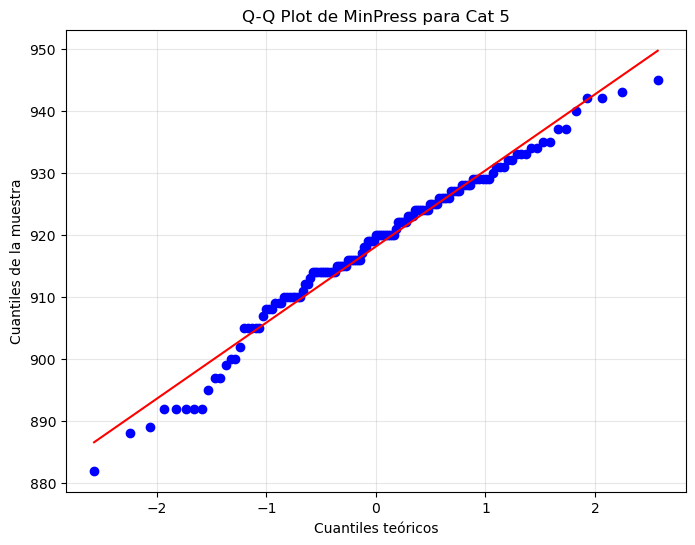

In [173]:
# Filtrar solo Cat 5 y eliminar NaN en MinPress
cat5_minpress = hrc_press[(hrc_press['type_storm'] == 'Cat 5') & (~hrc_press['MinPress'].isnull())]

# Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(cat5_minpress['MinPress'], dist="norm", plot=plt)
plt.title('Q-Q Plot de MinPress para Cat 5')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles de la muestra')
plt.grid(alpha=0.3)
plt.show()

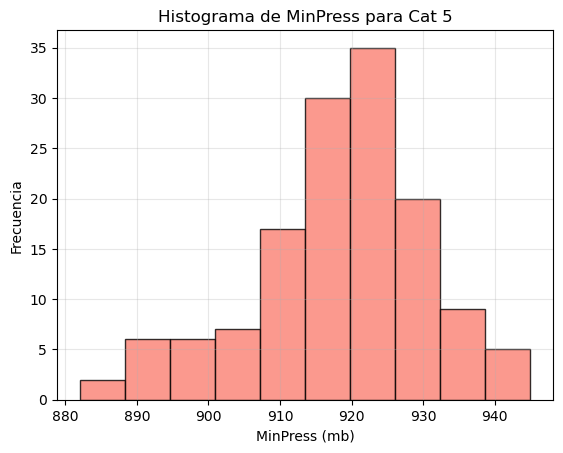

In [174]:
# Filtrar solo Cat 5 y eliminar NaN en MinPress
cat5_minpress = hrc_press[(hrc_press['type_storm'] == 'Cat 5') & (~hrc_press['MinPress'].isnull())]

# Histograma
plt.hist(cat5_minpress['MinPress'], bins=10, color='salmon', edgecolor='black', alpha=0.8)
plt.title('Histograma de MinPress para Cat 5')
plt.xlabel('MinPress (mb)')
plt.ylabel('Frecuencia')
plt.grid(alpha=0.3)
plt.show()

Sabiendo entonces que la distribución de los datos de MinPress no sigue una distribucion en normal en niguna de las categorias. Procedemos a usar la MEDIANA de cada categoria para imputar en los valores faltantes de MinPress. 

La categoria 5, sigue una distribución normal según el valor P del test K-S 

In [175]:
# Ver valores faltantes antes de imputar
print("Valores faltantes antes de imputar:")
print(df_EDA['MinPress'].isnull().sum())

# Diccionario con las medianas por tipo de tormenta
medianas_por_tipo = {
    'Cat 1': 983.0,
    'Cat 2': 968.0,
    'Cat 3': 955.0,
    'Cat 4': 941.0,
    'Cat 5': 918.1, # Para esta categoria se usa el promedio y no la mediana.
    'DB': 1010.0,
    'EX': 995.0,
    'LO': 1009.0,
    'SD': 1008.0,
    'SS': 998.0,
    'TD': 1008.0,
    'TS': 1000.0,
    'WV': 1009.0
}

# Imputar directamente en la variable MinPress
df_EDA['MinPress'] = df_EDA['MinPress'].fillna(df_EDA['type_storm'].map(medianas_por_tipo))

# Verificar valores faltantes después de imputar
print(f"\nValores faltantes después de imputar: {df_EDA['MinPress'].isnull().sum()}")

# Mostrar filas que aún tienen valores faltantes
filas_con_nan = df_EDA[df_EDA['MinPress'].isnull()]
print(f"\nFilas que quedaron con valores faltantes después de imputar:")
print(f"Total de filas con NaN: {len(filas_con_nan)}")

if len(filas_con_nan) > 0:
    print("\nDetalle de las filas con valores faltantes:")
    print(filas_con_nan[['type_storm', 'MinPress']].head(20))
else:
    print("No quedaron valores faltantes después de la imputación.")


Valores faltantes antes de imputar:
30946

Valores faltantes después de imputar: 0

Filas que quedaron con valores faltantes después de imputar:
Total de filas con NaN: 0
No quedaron valores faltantes después de la imputación.


In [176]:
df_EDA.head(3)

Code_storm           Name_storm  year  month  day  hour type_storm  \
0   AL011851              UNNAMED  1851      6   25     0      Cat 1   
1   AL011851              UNNAMED  1851      6   25     6      Cat 1   
2   AL011851              UNNAMED  1851      6   25    12      Cat 1   

   Max_wind  MinPress  Lat_N  Lon_W               fecha  type_storm_n  
0      80.0     983.0   28.0   94.8 1851-06-25 00:00:00             3  
1      80.0     983.0   28.0   95.4 1851-06-25 06:00:00             3  
2      80.0     983.0   28.0   96.0 1851-06-25 12:00:00             3

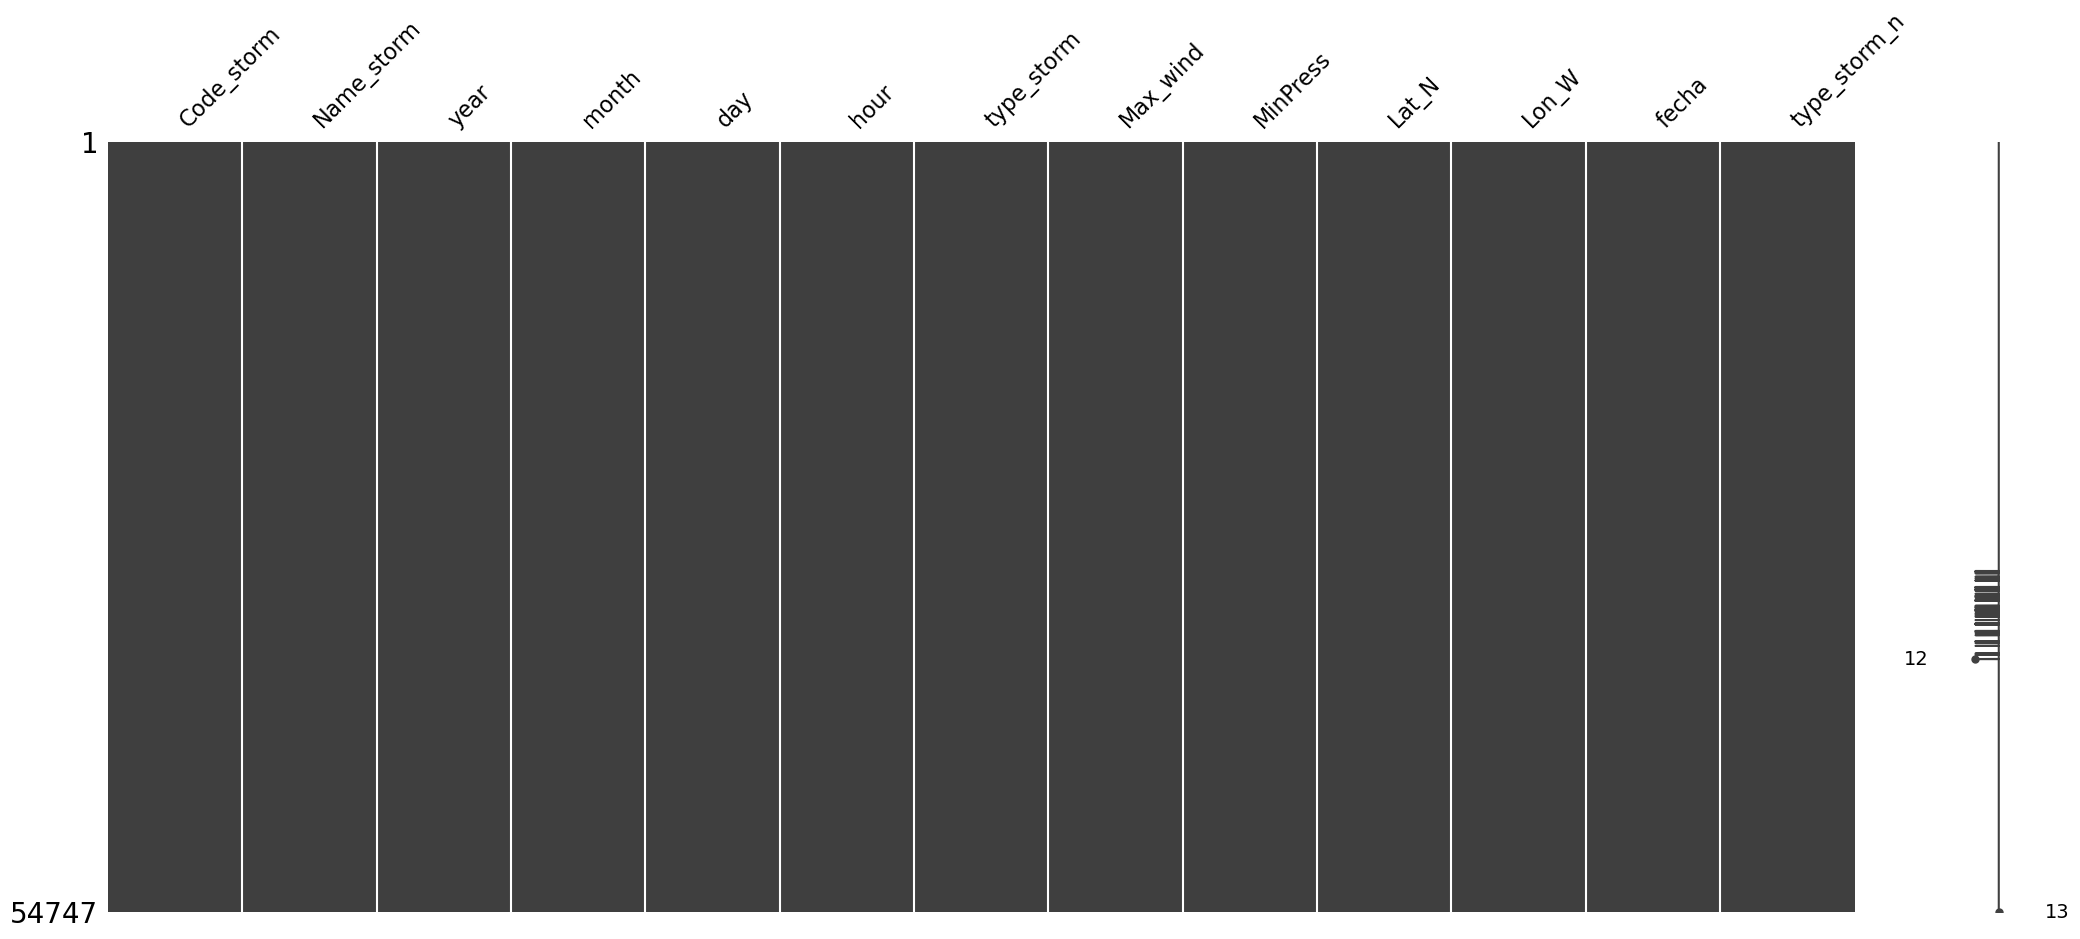

In [177]:
msno.matrix(df_EDA)
plt.show()

# IMPUTACIONES

In [178]:
df_EDA

Code_storm           Name_storm  year  month  day  hour type_storm  \
0       AL011851              UNNAMED  1851      6   25     0      Cat 1   
1       AL011851              UNNAMED  1851      6   25     6      Cat 1   
2       AL011851              UNNAMED  1851      6   25    12      Cat 1   
3       AL011851              UNNAMED  1851      6   25    18      Cat 1   
4       AL011851              UNNAMED  1851      6   25    21      Cat 1   
...          ...                  ...   ...    ...  ...   ...        ...   
54744   AL212023           TWENTY-ONE  2023     10   23    18         TD   
54745   AL212023           TWENTY-ONE  2023     10   24     0         TD   
54746   AL212023           TWENTY-ONE  2023     10   24     1         TD   
54747   AL212023           TWENTY-ONE  2023     10   24     6         TD   
54748   AL212023           TWENTY-ONE  2023     10   24    12         LO   

       Max_wind  MinPress  Lat_N  Lon_W               fecha  type_storm_n  
0          80.0     983.0   28.0   94.8 1851-06-25 00:00:00             3  
1          80.0     983.0   28.0   95.4 1851-06-25 06:00:00             3  
2          80.0     983.0   28.0   96.0 1851-06-25 12:00:00             3  
3          80.0     983.0   28.1   96.5 1851-06-25 18:00:00             3  
4          80.0     983.0   28.2   96.8 1851-06-25 21:00:00             3  
...         ...       ...    ...    ...                 ...           ...  
54744      25.0    1007.0   11.5   83.2 2023-10-23 18:00:00             1  
54745      25.0    1007.0   12.2   83.4 2023-10-24 00:00:00             1  
54746      25.0    1007.0   12.4   83.5 2023-10-24 01:00:00             1  
54747      25.0    1007.0   13.0   83.8 2023-10-24 06:00:00             1  
54748      20.0    1007.0   13.5   84.4 2023-10-24 12:00:00            11  

[54747 rows x 13 columns]

In [179]:
df_EDA["Lon_W"] = -df_EDA["Lon_W"]

## Cálculo de vector de longitud

In [180]:
# Crear columnas para vectores
df_EDA["vec_x"] = np.nan
df_EDA["vec_y"] = np.nan

# Diccionario para almacenar vectores
vecs = {"vec_x": [], "vec_y": [], "id": []}

# Procesar cada tormenta por separado
for storm_id in df_EDA["Code_storm"].unique():
    # Filtrar datos de la tormenta y ordenar por fecha
    storm_data = df_EDA[df_EDA["Code_storm"] == storm_id].copy()
    storm_data = storm_data.sort_values(['year', 'month', 'day', 'hour']).reset_index()
    
    # Inicializar variables
    last_x = None
    last_y = None
    
    # Calcular vectores para cada punto de la tormenta
    for i, row in storm_data.iterrows():
        current_x = row["Lon_W"]
        current_y = row["Lat_N"]
        
        # Si no es el primer punto, calcular vector
        if last_x is not None and last_y is not None:
            vec_x = current_x - last_x
            vec_y = current_y - last_y
            
            # Guardar vector y índice original
            vecs["vec_x"].append(vec_x)
            vecs["vec_y"].append(vec_y)
            vecs["id"].append(row["index"])  # Índice original en df
        
        # Actualizar coordenadas para siguiente iteración
        last_x = current_x
        last_y = current_y

# Asignar vectores al DataFrame original
df_EDA.loc[vecs["id"], "vec_x"] = vecs["vec_x"]
df_EDA.loc[vecs["id"], "vec_y"] = vecs["vec_y"]

Manejado la ecuación de calculo de un vector a partir de grados decimales. 

* Vector_Longitud = ((vec_x)"2 + (vec_y)"2)"-2

In [181]:
df_EDA["vec_len"] = np.sqrt((df_EDA["vec_x"]**2)+(df_EDA["vec_y"]**2))

Hubo valores de 354 a 356 de vec_len que no permitía graficar un buen histograma, así que eliminamos la ficha que corresponde a ese valor de 356. Sucedió porque se registró una tormenta en dos punto muy distantes y en las etapas finales de la tormenta cuando sale de la zona de los trópicos y gana mas velocidad

In [182]:
# Ver cuántos se eliminarán
print(f"Filas a eliminar: {(df_EDA['vec_len'] >= 354).sum()}")

# Eliminar
df_EDA = df_EDA[df_EDA["vec_len"] < 354]

Filas a eliminar: 4


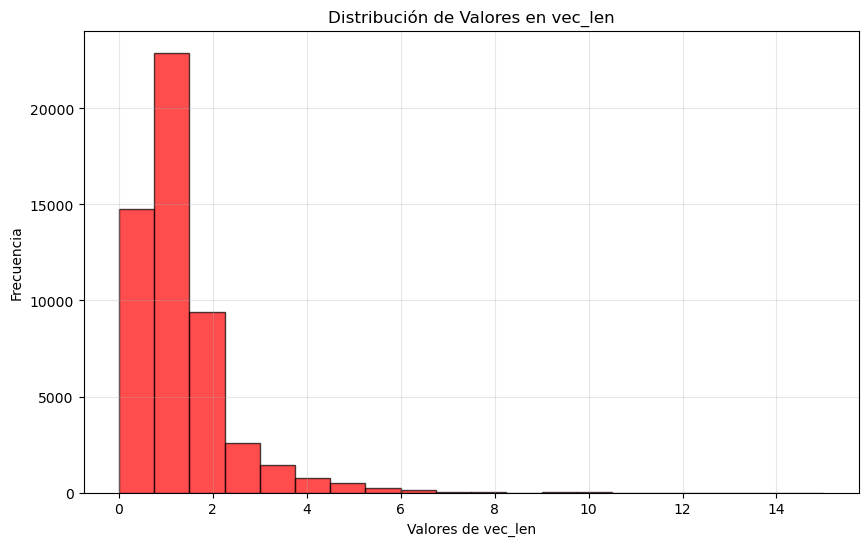

In [183]:
# Histograma de valores mayores a 5.5
plt.figure(figsize=(10, 6))
plt.hist(df_EDA['vec_len'], bins=20, alpha=0.7, color='red', edgecolor='black')
plt.title('Distribución de Valores en vec_len')
plt.xlabel('Valores de vec_len')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()

## Calculo de la dirección de la tormenta

La ecuación usada para el cálculo de la dirección es:

* Dirección = Arctg( vector_x / vector_y)

In [184]:
def calculate_direction(vec_x, vec_y):
    # atan2 devuelve el ángulo en radianes en el rango [-π, π]
    # (x, y) para que 0 rad apunte al norte
    #return np.arctan2(vec_y, -vec_x)
    
    # (x, y) para que 0 rad apunte al este
    return np.arctan2(vec_x, vec_y)


# Aplicar al DataFrame
df_EDA["vec_direction"] = df_EDA.apply(lambda x: calculate_direction(x.vec_x, x.vec_y), axis=1)

/var/folders/_p/446c73rj4x19qh7rmqlrf1980000gp/T/ipykernel_92315/509707704.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_EDA["vec_direction"] = df_EDA.apply(lambda x: calculate_direction(x.vec_x, x.vec_y), axis=1)


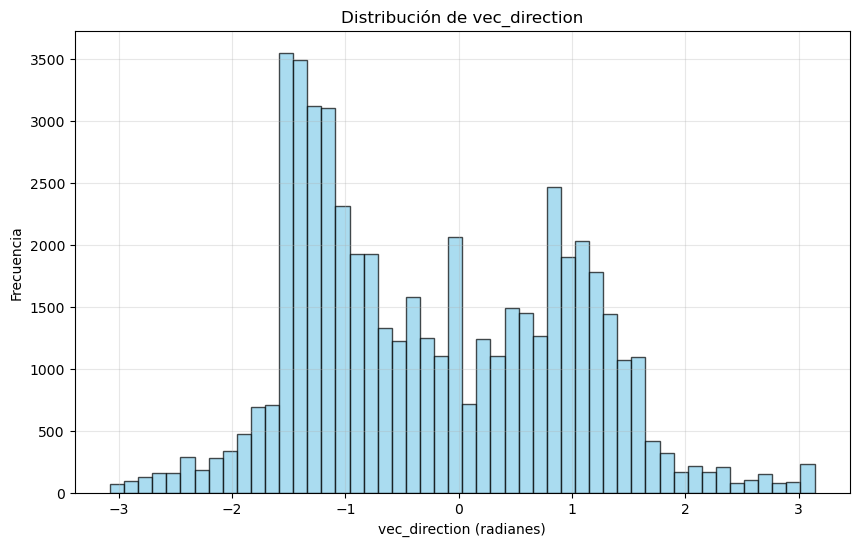

In [185]:
# Histograma de vec_direction
plt.figure(figsize=(10, 6))
plt.hist(df_EDA["vec_direction"], bins=50, alpha=0.7, edgecolor='black', color='skyblue')
plt.title("Distribución de vec_direction")
plt.xlabel("vec_direction (radianes)")
plt.ylabel("Frecuencia")
plt.grid(True, alpha=0.3)
plt.show()


Para cada tormenta (Code_storm) vamos a crear 3 lags, quiere decir, los 3 pasos anteriores

In [186]:
# Para cada tormenta (Code_storm) vamos a crear 3 columnas con desplazamiento
for k in range(1, 4):
    df_EDA[f"prev_len_{k}"] = df_EDA.groupby("Code_storm")["vec_len"].shift(k)
    df_EDA[f"prev_direction_{k}"] = df_EDA.groupby("Code_storm")["vec_direction"].shift(k)

/var/folders/_p/446c73rj4x19qh7rmqlrf1980000gp/T/ipykernel_92315/3036120763.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_EDA[f"prev_len_{k}"] = df_EDA.groupby("Code_storm")["vec_len"].shift(k)
/var/folders/_p/446c73rj4x19qh7rmqlrf1980000gp/T/ipykernel_92315/3036120763.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_EDA[f"prev_direction_{k}"] = df_EDA.groupby("Code_storm")["vec_direction"].shift(k)
/var/folders/_p/446c73rj4x19qh7rmqlrf1980000gp/T/ipykernel_92315/3036120763.py:3: SettingWithC

Se crea una columna que almacenará un paso adelante del vector longitud y vector dirección. Llevará el nombre next_len y next_dir y serán los targets en cada modelo.

In [187]:
df_EDA["next_len"] = df_EDA.groupby("Code_storm")["vec_len"].shift(-1)
df_EDA["next_direction"] = df_EDA.groupby("Code_storm")["vec_direction"].shift(-1)

/var/folders/_p/446c73rj4x19qh7rmqlrf1980000gp/T/ipykernel_92315/449305890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_EDA["next_len"] = df_EDA.groupby("Code_storm")["vec_len"].shift(-1)
/var/folders/_p/446c73rj4x19qh7rmqlrf1980000gp/T/ipykernel_92315/449305890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_EDA["next_direction"] = df_EDA.groupby("Code_storm")["vec_direction"].shift(-1)


In [188]:
# Finalmente Se eliminan todas las filas que tengan valores nulos, ya que no se puede usar para entrenar los modelos
df_EDA = df_EDA.dropna().reset_index(drop=True)

In [189]:
df_EDA

Code_storm           Name_storm  year  month  day  hour type_storm  \
0       AL011851              UNNAMED  1851      6   25    21      Cat 1   
1       AL011851              UNNAMED  1851      6   26     0      Cat 1   
2       AL011851              UNNAMED  1851      6   26     6         TS   
3       AL011851              UNNAMED  1851      6   26    12         TS   
4       AL011851              UNNAMED  1851      6   26    18         TS   
...          ...                  ...   ...    ...  ...   ...        ...   
45008   AL202023                TAMMY  2023     10   30    18         LO   
45009   AL202023                TAMMY  2023     10   31     0         LO   
45010   AL202023                TAMMY  2023     10   31     6         LO   
45011   AL202023                TAMMY  2023     10   31    12         LO   
45012   AL212023           TWENTY-ONE  2023     10   24     6         TD   

       Max_wind  MinPress  Lat_N  ...   vec_len vec_direction  prev_len_1  \
0          80.0     983.0   28.2  ...  0.316228     -1.249046    0.509902   
1          70.0     983.0   28.2  ...  0.200000     -1.570796    0.316228   
2          60.0    1000.0   28.3  ...  0.608276     -1.405648    0.200000   
3          60.0    1000.0   28.4  ...  0.707107     -1.428899    0.608276   
4          50.0    1000.0   28.6  ...  0.632456     -1.249046    0.707107   
...         ...       ...    ...  ...       ...           ...         ...   
45008      25.0    1006.0   26.5  ...  1.077033      2.761086    1.118034   
45009      25.0    1006.0   25.6  ...  0.984886     -2.723368    1.077033   
45010      25.0    1007.0   25.1  ...  0.707107     -2.356194    0.984886   
45011      20.0    1008.0   24.9  ...  0.921954     -1.789465    0.707107   
45012      25.0    1007.0   13.0  ...  0.670820     -0.463648    0.223607   

       prev_direction_1  prev_len_2  prev_direction_2  prev_len_3  \
0             -1.373401    0.600000         -1.570796    0.600000   
1             -1.249046    0.509902         -1.373401    0.600000   
2             -1.570796    0.316228         -1.249046    0.509902   
3             -1.405648    0.200000         -1.570796    0.316228   
4             -1.428899    0.608276         -1.405648    0.200000   
...                 ...         ...               ...         ...   
45008          2.677945    1.252996          2.642246    1.838478   
45009          2.761086    1.118034          2.677945    1.252996   
45010         -2.723368    1.077033          2.761086    1.118034   
45011         -2.356194    0.984886         -2.723368    1.077033   
45012         -0.463648    0.728011         -0.278300    0.608276   

       prev_direction_3  next_len  next_direction  
0             -1.570796  0.200000       -1.570796  
1             -1.570796  0.608276       -1.405648  
2             -1.373401  0.707107       -1.428899  
3             -1.249046  0.632456       -1.249046  
4             -1.570796  0.640312       -0.896055  
...                 ...       ...             ...  
45008          2.356194  0.984886       -2.723368  
45009          2.642246  0.707107       -2.356194  
45010          2.677945  0.921954       -1.789465  
45011          2.761086  0.761577       -1.975688  
45012         -1.405648  0.781025       -0.876058  

[45013 rows x 25 columns]

# Generico pruebas

In [192]:
# --- Imports y setup general ---
import numpy as np
import pandas as pd
import torch, torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import mean_squared_error as _mse, mean_absolute_error
import matplotlib.pyplot as plt
from tqdm import tqdm

SEED = 42
np.random.seed(SEED); torch.manual_seed(SEED)
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# --- Métricas (RMSE compatible con versiones viejas de sklearn) ---
def RMSE(y_true, y_pred):
    yt = np.asarray(y_true, dtype=float).ravel()
    yp = np.asarray(y_pred, dtype=float).ravel()
    try:
        return _mse(yt, yp, squared=False)  # sklearn moderno
    except TypeError:
        return np.sqrt(_mse(yt, yp))        # sklearn antiguo

def MAE(y_true, y_pred):
    return mean_absolute_error(np.ravel(y_true), np.ravel(y_pred))

def sMAPE(y_true, y_pred, eps=1e-8):
    yt, yp = np.ravel(y_true), np.ravel(y_pred)
    return 100*np.mean(2*np.abs(yp-yt)/(np.abs(yt)+np.abs(yp)+eps))

def make_loader(X, y, bs=256, shuffle=True):
    X_t = torch.tensor(X, dtype=torch.float32)
    y_t = torch.tensor(y, dtype=torch.float32)
    return DataLoader(TensorDataset(X_t, y_t), batch_size=bs, shuffle=shuffle)

In [193]:
# =========================
# HELPERS COMUNES (pegar una vez)
# =========================
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy import stats

plt.style.use('seaborn-v0_8-whitegrid'); sns.set_palette("husl")
plt.rcParams.update({"axes.edgecolor":"#333","axes.titleweight":"bold",
                     "axes.grid":True,"grid.alpha":0.3,"legend.frameon":False})

COL_REAL, COL_PRED, COL_ERR = "#e76f51", "#b08d57", "#9aa0a6"
H_GRAPH = 0  # horizonte a graficar (0 = t+1)

# Métricas
def MAPE(y_true,y_pred,eps=1e-8):
    yt=np.asarray(y_true).ravel().astype(float)
    yp=np.asarray(y_pred).ravel().astype(float)
    return 100*np.mean(np.abs(yt-yp)/np.maximum(np.abs(yt),eps))
def RMSE(y_true,y_pred):
    return float(np.sqrt(mean_squared_error(np.asarray(y_true).ravel(),
                                            np.asarray(y_pred).ravel())))
def MAE(y_true,y_pred):
    return float(mean_absolute_error(np.asarray(y_true).ravel(),
                                     np.asarray(y_pred).ravel()))
def sMAPE(y_true,y_pred,eps=1e-8):
    yt=np.asarray(y_true).ravel().astype(float)
    yp=np.asarray(y_pred).ravel().astype(float)
    return 100*np.mean(2*np.abs(yp-yt)/(np.abs(yt)+np.abs(yp)+eps))

# Fechas por bloque
def last_block_dates(df_full, n, offset=0):
    if isinstance(df_full, pd.DataFrame) and 'ds' in df_full.columns:
        idx=pd.to_datetime(df_full['ds']); end=len(idx)-offset; start=max(0,end-n)
        return idx.iloc[start:end]
    return pd.RangeIndex(n)

# BDS
try:
    from statsmodels.tsa.stattools import bds
    HAS_BDS=True
except Exception:
    HAS_BDS=False
def run_bds(residuals_1d, max_dim=6):
    if not HAS_BDS: return "BDS no disponible."
    r=np.asarray(residuals_1d,dtype=float).ravel()
    stats_b,pvals=bds(r,max_dim=max_dim)
    dims=np.arange(2,2+len(np.ravel(stats_b)))
    lines=[f"m={int(m)}: p={float(p):.3g}" for m,p in zip(dims,np.ravel(pvals))]
    concl=("Rechazamos H0 — residuos NO independientes."
           if (np.ravel(pvals)<0.05).any() else
           "No rechazamos H0 — residuos independientes.")
    return " | ".join(lines)+" || "+concl

# Importancias (árboles/XGB; lineales por |coef|; sino, ceros)
from sklearn.multioutput import MultiOutputRegressor
def get_importances(model, n_feats):
    if hasattr(model, "feature_importances_"):
        imp=np.asarray(model.feature_importances_,dtype=float)
        return imp if imp.size==n_feats else np.resize(imp,n_feats)
    if hasattr(model, "coef_"):
        c=np.asarray(model.coef_,dtype=float)
        c = np.mean(np.abs(c), axis=0) if c.ndim>1 else np.abs(c)
        return c if c.size==n_feats else np.resize(c,n_feats)
    if isinstance(model, MultiOutputRegressor) and hasattr(model,"estimators_"):
        imps=[]
        for est in model.estimators_:
            if hasattr(est,"feature_importances_"):
                v=np.asarray(est.feature_importances_,dtype=float)
                imps.append(v if v.size==n_feats else np.resize(v,n_feats))
            elif hasattr(est,"coef_"):
                v=np.asarray(est.coef_,dtype=float)
                v = np.mean(np.abs(v),axis=0) if v.ndim>1 else np.abs(v)
                imps.append(v if v.size==n_feats else np.resize(v,n_feats))
        if imps: return np.mean(imps,axis=0)
    return np.zeros(n_feats,dtype=float)

# Plot 
def plot_like_partner(model_name, X, y, Xcv, ycv, Xtest, ytest,
                      y_tr_pred, y_cv_pred, y_te_pred, importances_vec, df):
    Nte,Nva,Ntr=len(ytest),len(ycv),len(y)
    test_dates  = last_block_dates(df,Nte,offset=0)
    val_dates   = last_block_dates(df,Nva,offset=Nte)
    train_dates = last_block_dates(df,Ntr,offset=Nte+Nva)

    resid_h0 = ytest[:,0]-y_te_pred[:,0]

    # General 3x3
    fig=plt.figure(figsize=(20,16)); gs=fig.add_gridspec(3,3,hspace=0.35,wspace=0.35)
    ax1=fig.add_subplot(gs[0,:])
    ax1.plot(test_dates,ytest[:,H_GRAPH],'o-',color=COL_REAL,lw=2,ms=3,label='Valores Reales (Test)')
    ax1.plot(test_dates,y_te_pred[:,H_GRAPH],'s-',color=COL_PRED,lw=2,ms=3,label='Predicciones (Test)')
    ax1.fill_between(test_dates,ytest[:,H_GRAPH],y_te_pred[:,H_GRAPH],color=COL_ERR,alpha=0.25,label='Error')
    ax1.set_title(f'Predicciones vs Valores Reales - {model_name} (TEST)')
    ax1.set_xlabel('Tiempo'); ax1.set_ylabel('Valor'); ax1.legend()

    ax2=fig.add_subplot(gs[1,0])
    ax2.scatter(ytest[:,H_GRAPH],y_te_pred[:,H_GRAPH],alpha=0.6,s=25,color=COL_REAL)
    miv=min(ytest[:,H_GRAPH].min(),y_te_pred[:,H_GRAPH].min())
    mav=max(ytest[:,H_GRAPH].max(),y_te_pred[:,H_GRAPH].max())
    ax2.plot([miv,mav],[miv,mav],'r--',lw=1.5,label='Línea perfecta')
    ax2.set_title('Dispersión: Real vs Predicho (TEST)')
    ax2.set_xlabel('Valores Reales'); ax2.set_ylabel('Predicciones'); ax2.legend()

    ax3=fig.add_subplot(gs[1,1])
    ax3.plot(test_dates,resid_h0,'o-',color=COL_REAL,lw=1,ms=2)
    ax3.axhline(0,color='k',ls='--',alpha=0.8)
    ax3.set_title('Residuos del Modelo (TEST)'); ax3.set_xlabel('Tiempo'); ax3.set_ylabel('Residuos')

    ax4=fig.add_subplot(gs[1,2])
    ax4.hist(resid_h0,bins=30,alpha=0.7,ec='black',color=COL_REAL)
    ax4.set_title('Distribución de Residuos (TEST)'); ax4.set_xlabel('Residuos'); ax4.set_ylabel('Frecuencia')

    ax5=fig.add_subplot(gs[2,0])
    feat_names=[f"feat_{i}" for i in range(X.shape[1])]
    top=np.argsort(importances_vec)[-10:]; fi=pd.DataFrame({"feature":np.array(feat_names)[top],"importance":importances_vec[top]}).sort_values("importance")
    ax5.barh(range(len(fi)),fi["importance"],color=COL_PRED)
    ax5.set_yticks(range(len(fi))); ax5.set_yticklabels(fi["feature"])
    ax5.set_xlabel("Importancia"); ax5.set_title("Top 10 Features Importantes"); ax5.grid(True,axis="x",alpha=0.3)

    ax6=fig.add_subplot(gs[2,1])
    mape_val=MAPE(ycv,y_cv_pred); mae_val=MAE(ycv,y_cv_pred); rmse_val=RMSE(ycv,y_cv_pred)
    ax6.boxplot([[mape_val],[mae_val],[rmse_val]],labels=['MAPE','MAE','RMSE'])
    ax6.set_title('Distribución de Métricas CV (Validación)'); ax6.set_ylabel('Valor')

    ax7=fig.add_subplot(gs[2,2]); stats.probplot(resid_h0,dist="norm",plot=ax7)
    ax7.set_title('Q-Q Plot de Residuos (TEST)')

    plt.suptitle(f'Análisis General - {model_name} - Series Temporales',fontsize=18,fontweight='bold')
    plt.tight_layout(); plt.show()

    # Por conjunto
    fig2,axs=plt.subplots(3,1,figsize=(18,12),sharex=False)
    axs[0].plot(train_dates,y[:,H_GRAPH],'o-',color=COL_REAL,ms=2.5,lw=1.8,label='Real (Train)')
    axs[0].plot(train_dates,y_tr_pred[:,H_GRAPH],'s-',color=COL_PRED,ms=2.5,lw=1.8,label='Pred (Train)')
    axs[0].fill_between(train_dates,y[:,H_GRAPH],y_tr_pred[:,H_GRAPH],color=COL_ERR,alpha=0.25,label='Error')
    axs[0].set_title('Conjunto TRAIN - Último fold'); axs[0].legend()

    axs[1].plot(val_dates,ycv[:,H_GRAPH],'o-',color=COL_REAL,ms=2.5,lw=1.8,label='Real (Val)')
    axs[1].plot(val_dates,y_cv_pred[:,H_GRAPH],'s-',color=COL_PRED,ms=2.5,lw=1.8,label='Pred (Val)')
    axs[1].fill_between(val_dates,ycv[:,H_GRAPH],y_cv_pred[:,H_GRAPH],color=COL_ERR,alpha=0.25,label='Error')
    axs[1].set_title('Conjunto VALIDATION - Último fold'); axs[1].legend()

    axs[2].plot(test_dates,ytest[:,H_GRAPH],'o-',color=COL_REAL,ms=2.5,lw=1.8,label='Real (Test)')
    axs[2].plot(test_dates,y_te_pred[:,H_GRAPH],'s-',color=COL_PRED,ms=2.5,lw=1.8,label='Pred (Test - final_model)')
    axs[2].fill_between(test_dates,ytest[:,H_GRAPH],y_te_pred[:,H_GRAPH],color=COL_ERR,alpha=0.25,label='Error')
    axs[2].set_title('Conjunto TEST - Último fold'); axs[2].legend()
    plt.tight_layout(); plt.show()

# Entrena/valida/test para modelos scikit-learn
def fit_eval_plot_sklearn(model, name, X, y, Xcv, ycv, Xtest, ytest, df):
    # Train -> Val
    mdl = model.__class__(**model.get_params()) if hasattr(model,"get_params") else model
    mdl.fit(X,y)
    y_tr = mdl.predict(X)
    y_va = mdl.predict(Xcv)

    # Train+Val -> Test
    mdl_f = model.__class__(**model.get_params()) if hasattr(model,"get_params") else model
    mdl_f.fit(np.vstack([X,Xcv]), np.vstack([y,ycv]))
    y_te = mdl_f.predict(Xtest)

    # Métricas
    print(f"\n[{name}] Métricas")
    for tag,(yt,yp) in {"Train":(y,y_tr),"Val":(ycv,y_va),"Test":(ytest,y_te)}.items():
        line=f"{tag:>5}: MAPE={MAPE(yt,yp):.4f}% | MAE={MAE(yt,yp):.6f} | RMSE={RMSE(yt,yp):.6f}"
        if tag!="Train": line+=f" | sMAPE={sMAPE(yt,yp):.2f}%"
        print(line)

    # BDS h=0
    resid_h0 = ytest[:,0]-y_te[:,0]
    print(f"[{name}] BDS (residuos TEST, h=t+1):", run_bds(resid_h0))

    # Importancias
    imp = get_importances(mdl_f, X.shape[1])

    # Plots
    plot_like_partner(name, X,y,Xcv,ycv,Xtest,ytest, y_tr,y_va,y_te, imp, df)

# Split

In [194]:
from tsxv.splitTrainValTest import split_train_val_test_groupKFold

LOOKBACK = 200
HORIZON  = 7
JUMP     = 1

# 1. PRIMERO: Dividir tormentas entre train y test
cantidad_unicos = df_EDA["Code_storm"].nunique()
n_test = int(cantidad_unicos * 0.10)  # 10% para test

storm_test_ids = df_EDA["Code_storm"].unique()[:n_test]

test_df = df_EDA[df_EDA["Code_storm"].isin(storm_test_ids)]
train_df = df_EDA[~df_EDA["Code_storm"].isin(storm_test_ids)]

# 2. Guardar los grupos solo del conjunto de entrenamiento
grupos = train_df["Code_storm"].values

# 3. AHORA SÍ: Aplicar split_train_val_test_groupKFold SOLO sobre train_df
X_features = train_df[['MinPress', 'Max_wind', 'vec_direction', 'vec_len', 'month']].to_numpy()
y_target = train_df[['next_direction','next_len']].to_numpy()

res_X = split_train_val_test_groupKFold(
    sequence=X_features,
    numInputs=LOOKBACK,
    numOutputs=HORIZON,
    numJumps=JUMP
)

res_y = split_train_val_test_groupKFold(
    sequence=y_target,
    numInputs=LOOKBACK,
    numOutputs=HORIZON,
    numJumps=JUMP
)

# ... resto igual
# --- Desempaquetador robusto (tupla con dicts o 6 arrays) ---
def unpack_timeseries_cv(res, lookback, horizon):
    if isinstance(res, tuple):
        dicts = [d for d in res if isinstance(d, dict)]
        if len(dicts) >= 2:
            Xd, Yd = dicts[0], dicts[1]
            common = sorted(set(Xd.keys()) & set(Yd.keys()))
            if len(common) < 3:
                raise RuntimeError(f"No hay suficientes subconjuntos: {common}")
            k_tr, k_val, k_te = common[:3]
            return Xd[k_tr], Yd[k_tr], Xd[k_val], Yd[k_val], Xd[k_te], Yd[k_te]
        if len(res) == 6 and all(hasattr(a, "shape") for a in res):
            return res
        if len(dicts) == 1:
            items = sorted(dicts[0].items(), key=lambda kv: kv[0])
            Xs = [v for _, v in items if v.ndim==2 and v.shape[1]==lookback]
            ys = [v for _, v in items if v.ndim==2 and v.shape[1]==horizon]
            if len(Xs)>=3 and len(ys)>=3:
                return Xs[0], ys[0], Xs[1], ys[1], Xs[2], ys[2]
    elif isinstance(res, dict):
        req = {'Xtrain','ytrain','Xval','yval','Xtest','ytest'}
        if req.issubset(res.keys()):
            return res['Xtrain'], res['ytrain'], res['Xval'], res['yval'], res['Xtest'], res['ytest']
    raise TypeError(f"Formato inesperado: {type(res)}")

# Desempaquetar
X, _, Xcv, _, Xtest, _ = unpack_timeseries_cv(res_X, LOOKBACK, HORIZON)
_, y, _, ycv, _, ytest = unpack_timeseries_cv(res_y, LOOKBACK, HORIZON)

# Ahora X tiene shape (n_samples, LOOKBACK, 3) - necesitas aplanarlo para ML clásico
X = X.reshape(X.shape[0], -1)  # (n_samples, LOOKBACK*3) = (n_samples, 600)
Xcv = Xcv.reshape(Xcv.shape[0], -1)
Xtest = Xtest.reshape(Xtest.shape[0], -1)

print("Train:", X.shape, y.shape)  # X: (n, 600), y: (n, 7)
print("Val:  ", Xcv.shape, ycv.shape)
print("Test: ", Xtest.shape, ytest.shape)

# --- DataLoaders ---
train_loader = make_loader(X, y, shuffle=True)
val_loader   = make_loader(Xcv, ycv, shuffle=False)
test_loader  = make_loader(Xtest, ytest, shuffle=False)

# Sanity: el batch debe ser [B,14] y [B,7] (no [B,14,1])
xb, yb = next(iter(train_loader))
print("Batch sample:", xb.shape, yb.shape)  # esperado: (*,14) (*,7)

Train: (208, 1000) (208, 7, 2)
Val:   (207, 1000) (207, 7, 2)
Test:  (206, 1000) (206, 7, 2)
Batch sample: torch.Size([208, 1000]) torch.Size([208, 7, 2])


In [195]:
#Paso 3) Crear splits con timeseries-cv (tu API real)
# - Usamos split_train_val_test_groupKFold con:
#       numInputs=200  (LOOKBACK: 14 días pasados como entrada)
#       numOutputs=7  (HORIZON: 7 días futuros como etiqueta)
#       numJumps=4    (JUMP: la ventana se desliza día a día)
# - Se devuelve una tupla con diccionarios; por eso desempaquetamos de forma robusta
#   hasta obtener:
#       X, y     -> Train   (shapes ~ (796,200), (796,7))
#       Xcv, ycv -> Val     (shapes ~ (795,200), (795,7))
#       Xtest, ytest -> Test (shapes ~ (794,200), (794,7))
#   -> Esto convierte la serie en un dataset supervisado: cada fila de X son 200 días, y, Y es el
#      vector de 7 días siguientes.


# Modelo KNN


[KNN] Métricas
Train: MAPE=61.6277% | MAE=0.000001 | RMSE=0.000004
  Val: MAPE=23072942.2392% | MAE=0.196383 | RMSE=0.552011 | sMAPE=23.04%
 Test: MAPE=39938595.3365% | MAE=0.169211 | RMSE=0.535271 | sMAPE=19.10%
[KNN] BDS (residuos TEST, h=t+1): m=2: p=0.0242 | m=3: p=0.00177 | m=4: p=0.00835 | m=5: p=0.0194 | m=6: p=0.0166 || Rechazamos H0 — residuos NO independientes.


/var/folders/_p/446c73rj4x19qh7rmqlrf1980000gp/T/ipykernel_92315/1796777802.py:123: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax6.boxplot([[mape_val],[mae_val],[rmse_val]],labels=['MAPE','MAE','RMSE'])
/var/folders/_p/446c73rj4x19qh7rmqlrf1980000gp/T/ipykernel_92315/1796777802.py:130: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(); plt.show()


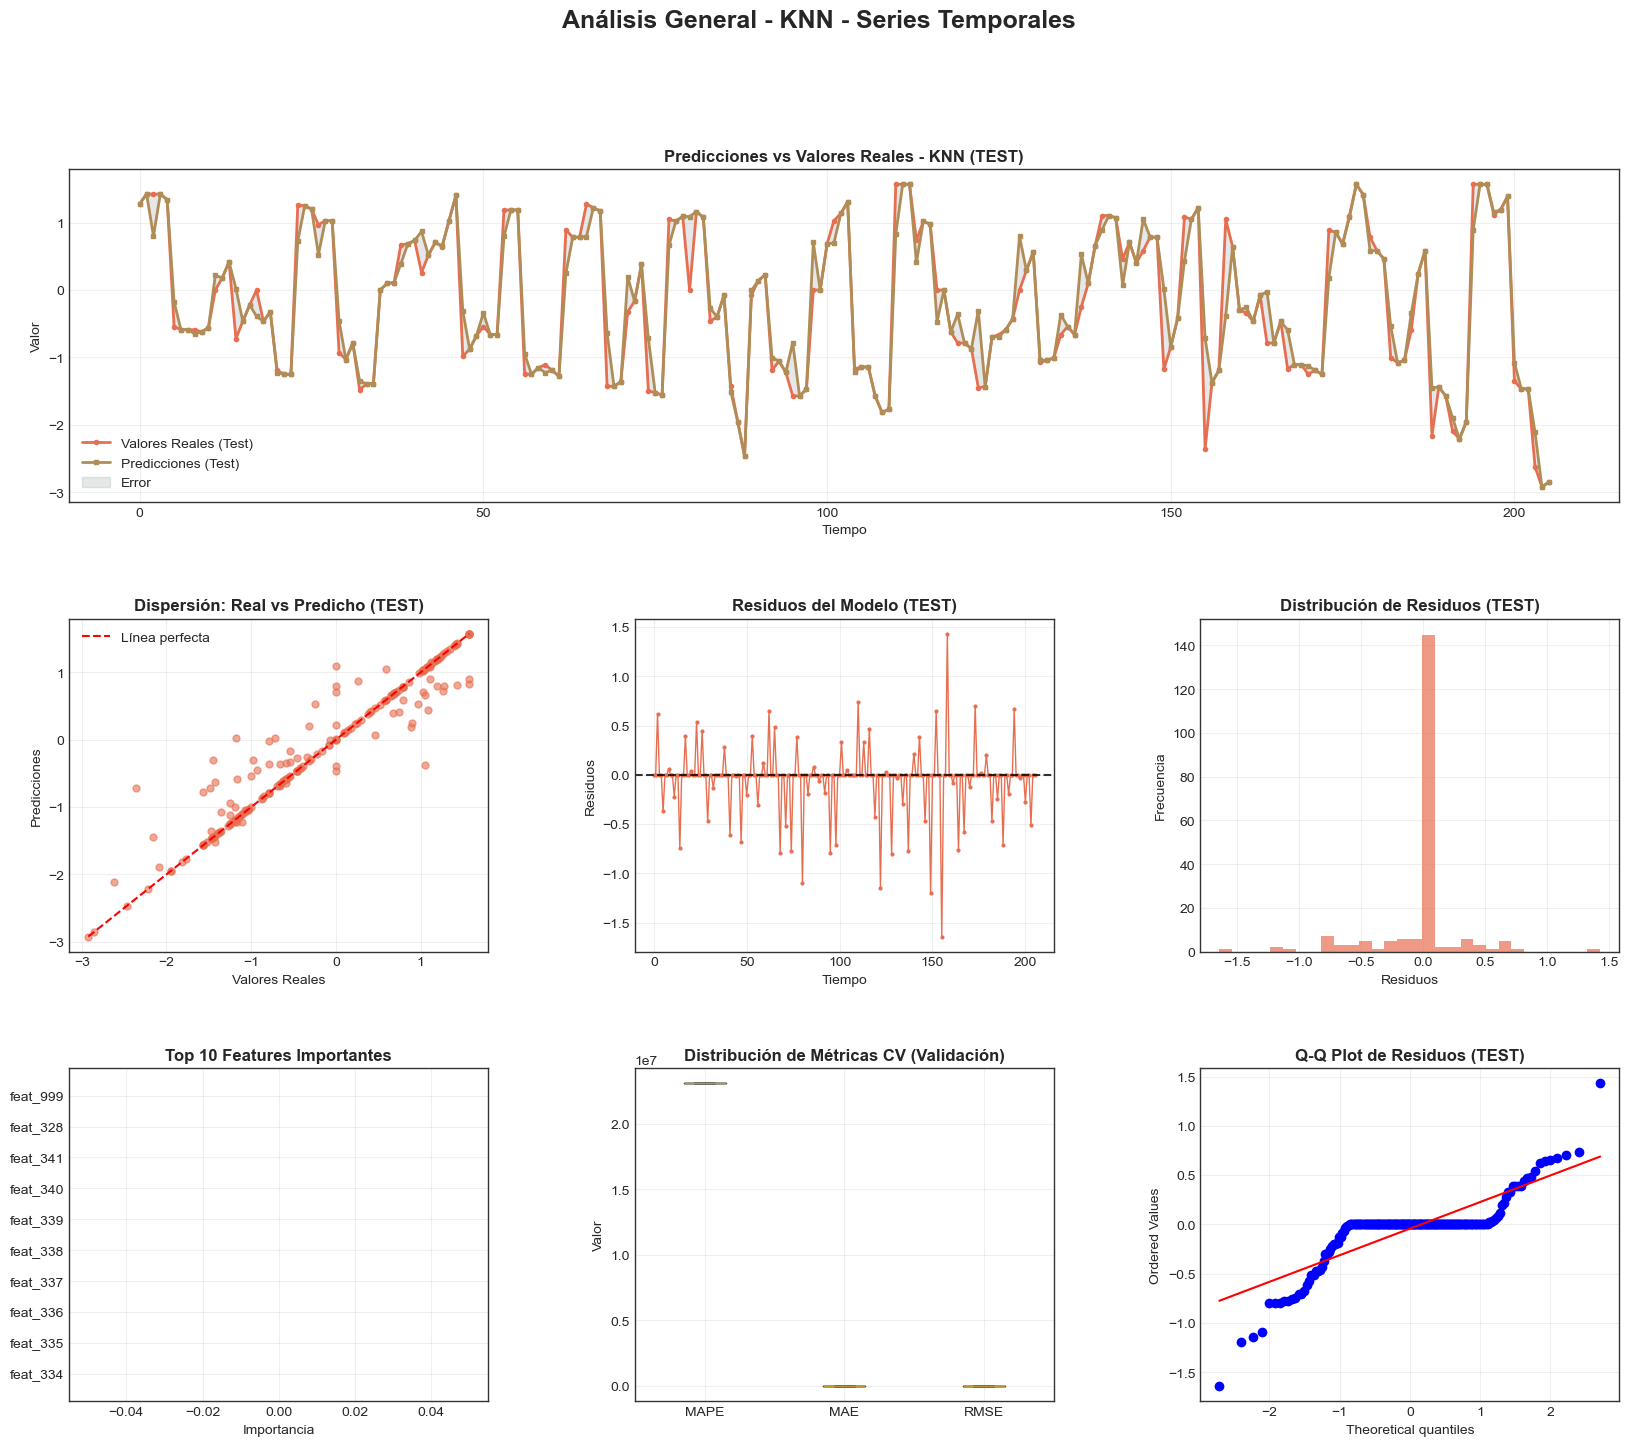

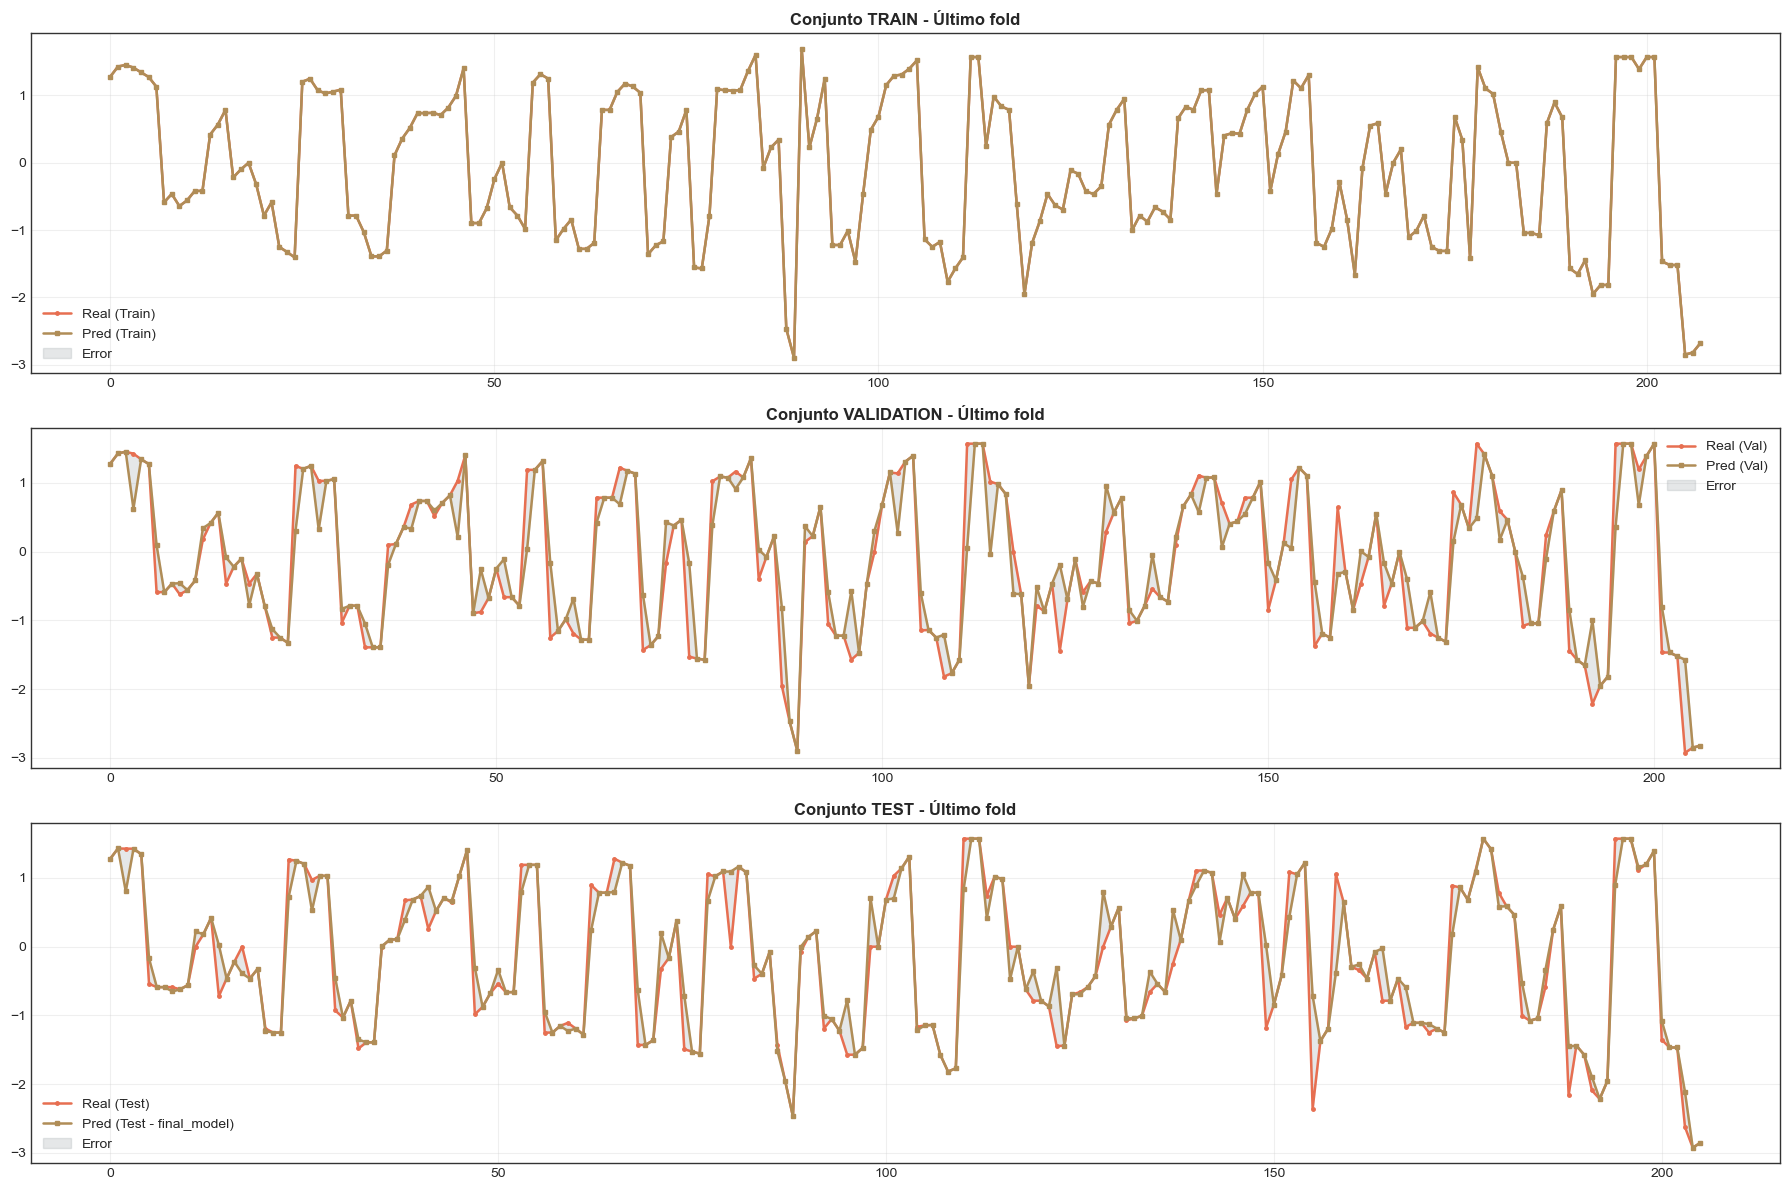

In [196]:
from sklearn.neighbors import KNeighborsRegressor
# KNN soporta multi-output directamente
# Aplanar X de (n_samples, lookback, n_features) a (n_samples, lookback*n_features)
X = X.reshape(X.shape[0], -1)
Xcv = Xcv.reshape(Xcv.shape[0], -1)
Xtest = Xtest.reshape(Xtest.shape[0], -1)

# Aplanar y de (n_samples, horizon, n_outputs) a (n_samples, horizon*n_outputs)
y = y.reshape(y.shape[0], -1)
ycv = ycv.reshape(ycv.shape[0], -1)
ytest = ytest.reshape(ytest.shape[0], -1)

# Entrenar KNN
knn = KNeighborsRegressor(n_neighbors=10, weights='distance', metric='minkowski', p=2)
fit_eval_plot_sklearn(knn, "KNN", X, y, Xcv, ycv, Xtest, ytest, df)

In [197]:
# Entrenar el modelo knn con todos los datos (train + validation)
X_train_full = np.vstack([X, Xcv])
y_train_full = np.vstack([y, ycv])

knn.fit(X_train_full, y_train_full)

#guardar el modelo
joblib.dump(knn, './models_all/knn_model.pkl')

['./models_all/knn_model.pkl']

# Modelo Decission tree


[Decision Tree] Métricas
Train: MAPE=60923442.5139% | MAE=0.593727 | RMSE=0.880555
  Val: MAPE=68007300.0792% | MAE=0.616334 | RMSE=0.949099 | sMAPE=63.05%
 Test: MAPE=62111948.2259% | MAE=0.576209 | RMSE=1.004173 | sMAPE=58.62%
[Decision Tree] BDS (residuos TEST, h=t+1): m=2: p=6.32e-14 | m=3: p=1.68e-10 | m=4: p=4.29e-07 | m=5: p=1.21e-05 | m=6: p=0.000174 || Rechazamos H0 — residuos NO independientes.


/var/folders/_p/446c73rj4x19qh7rmqlrf1980000gp/T/ipykernel_92315/2548301883.py:96: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax6.boxplot([[mape_val],[mae_val],[rmse_val]],labels=['MAPE','MAE','RMSE']); ax6.set_title('Distribución de Métricas CV (Validación)'); ax6.set_ylabel('Valor')
/var/folders/_p/446c73rj4x19qh7rmqlrf1980000gp/T/ipykernel_92315/2548301883.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.suptitle('Análisis General - Decision Tree - Series Temporales',fontsize=18,fontweight='bold'); plt.tight_layout(); plt.show()


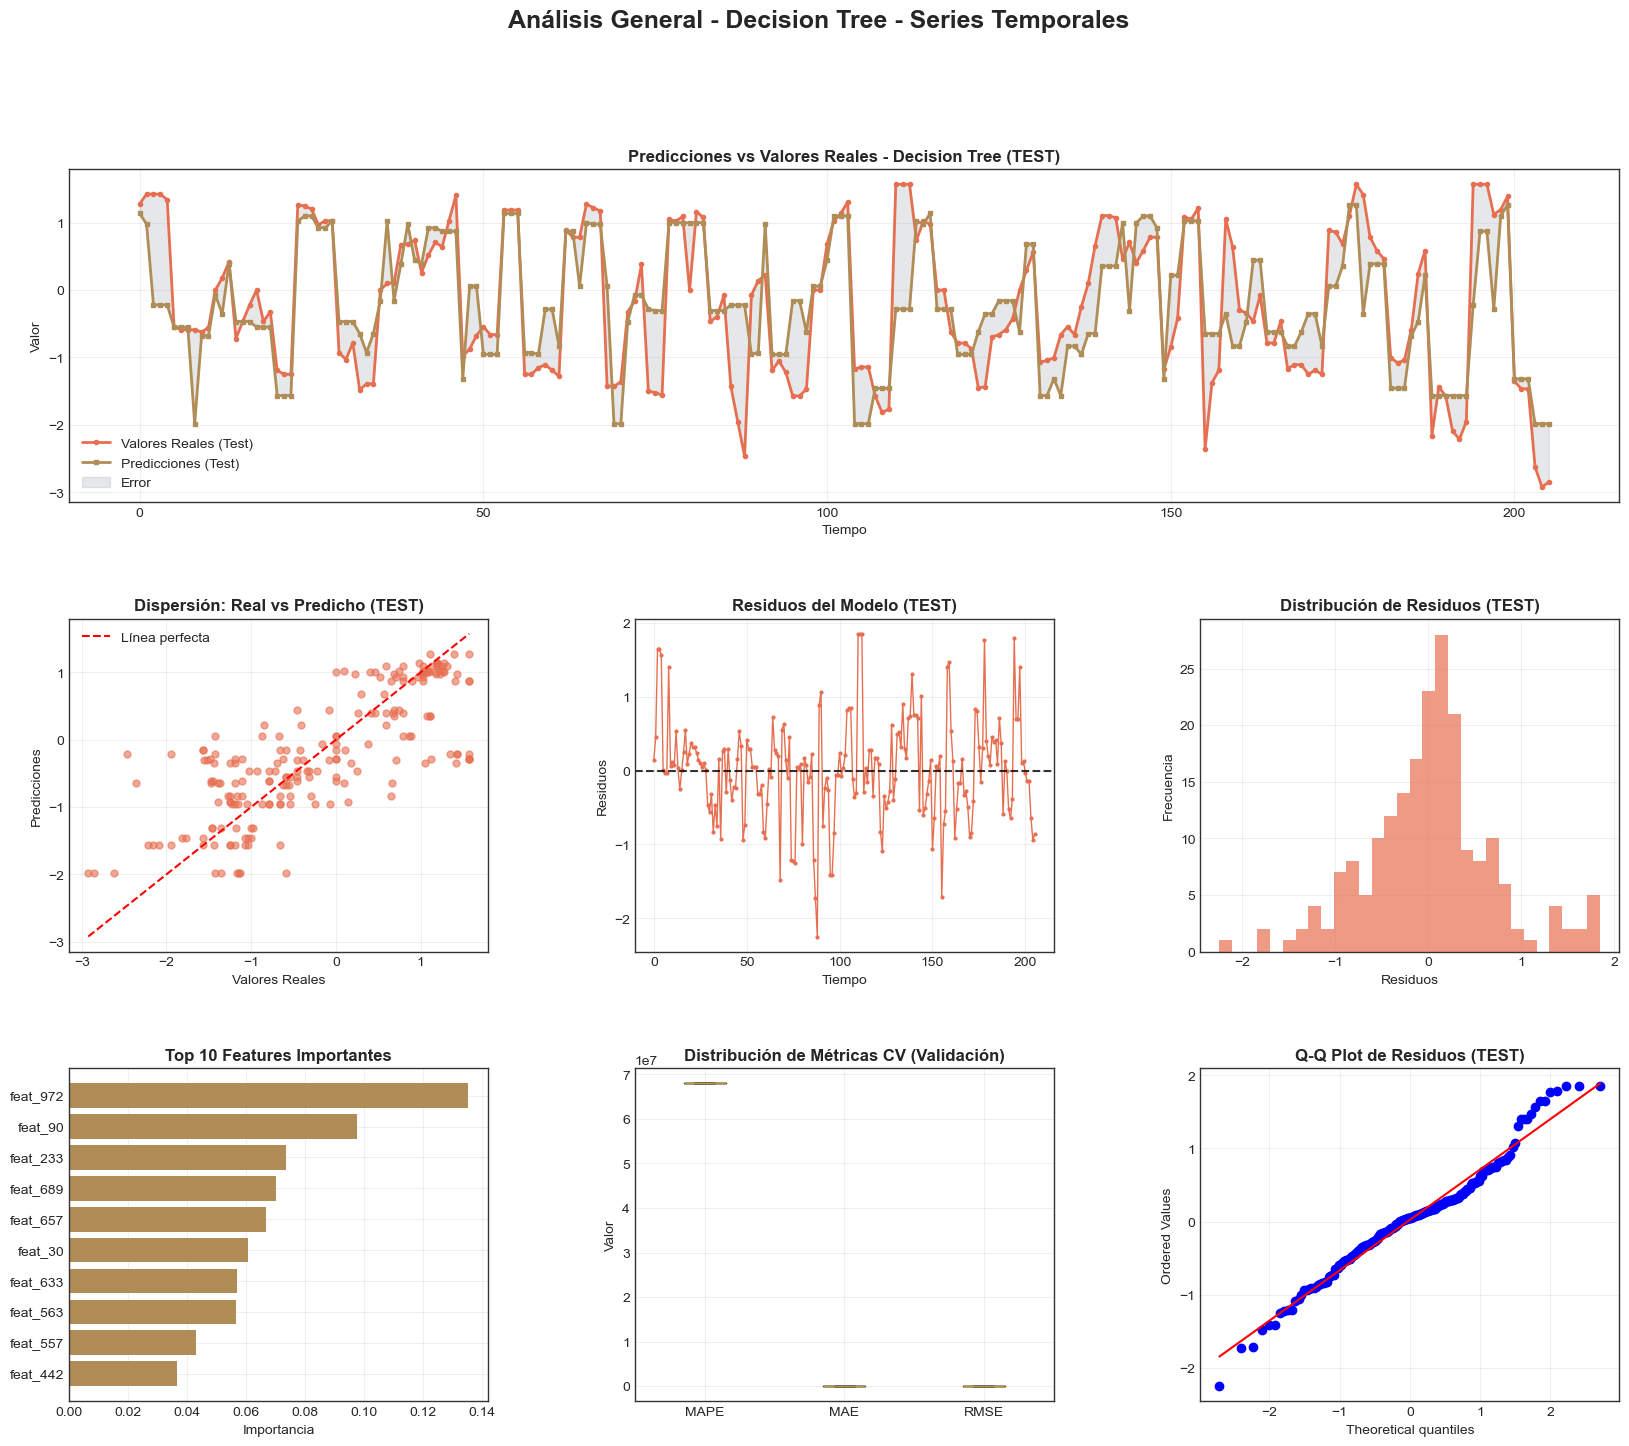

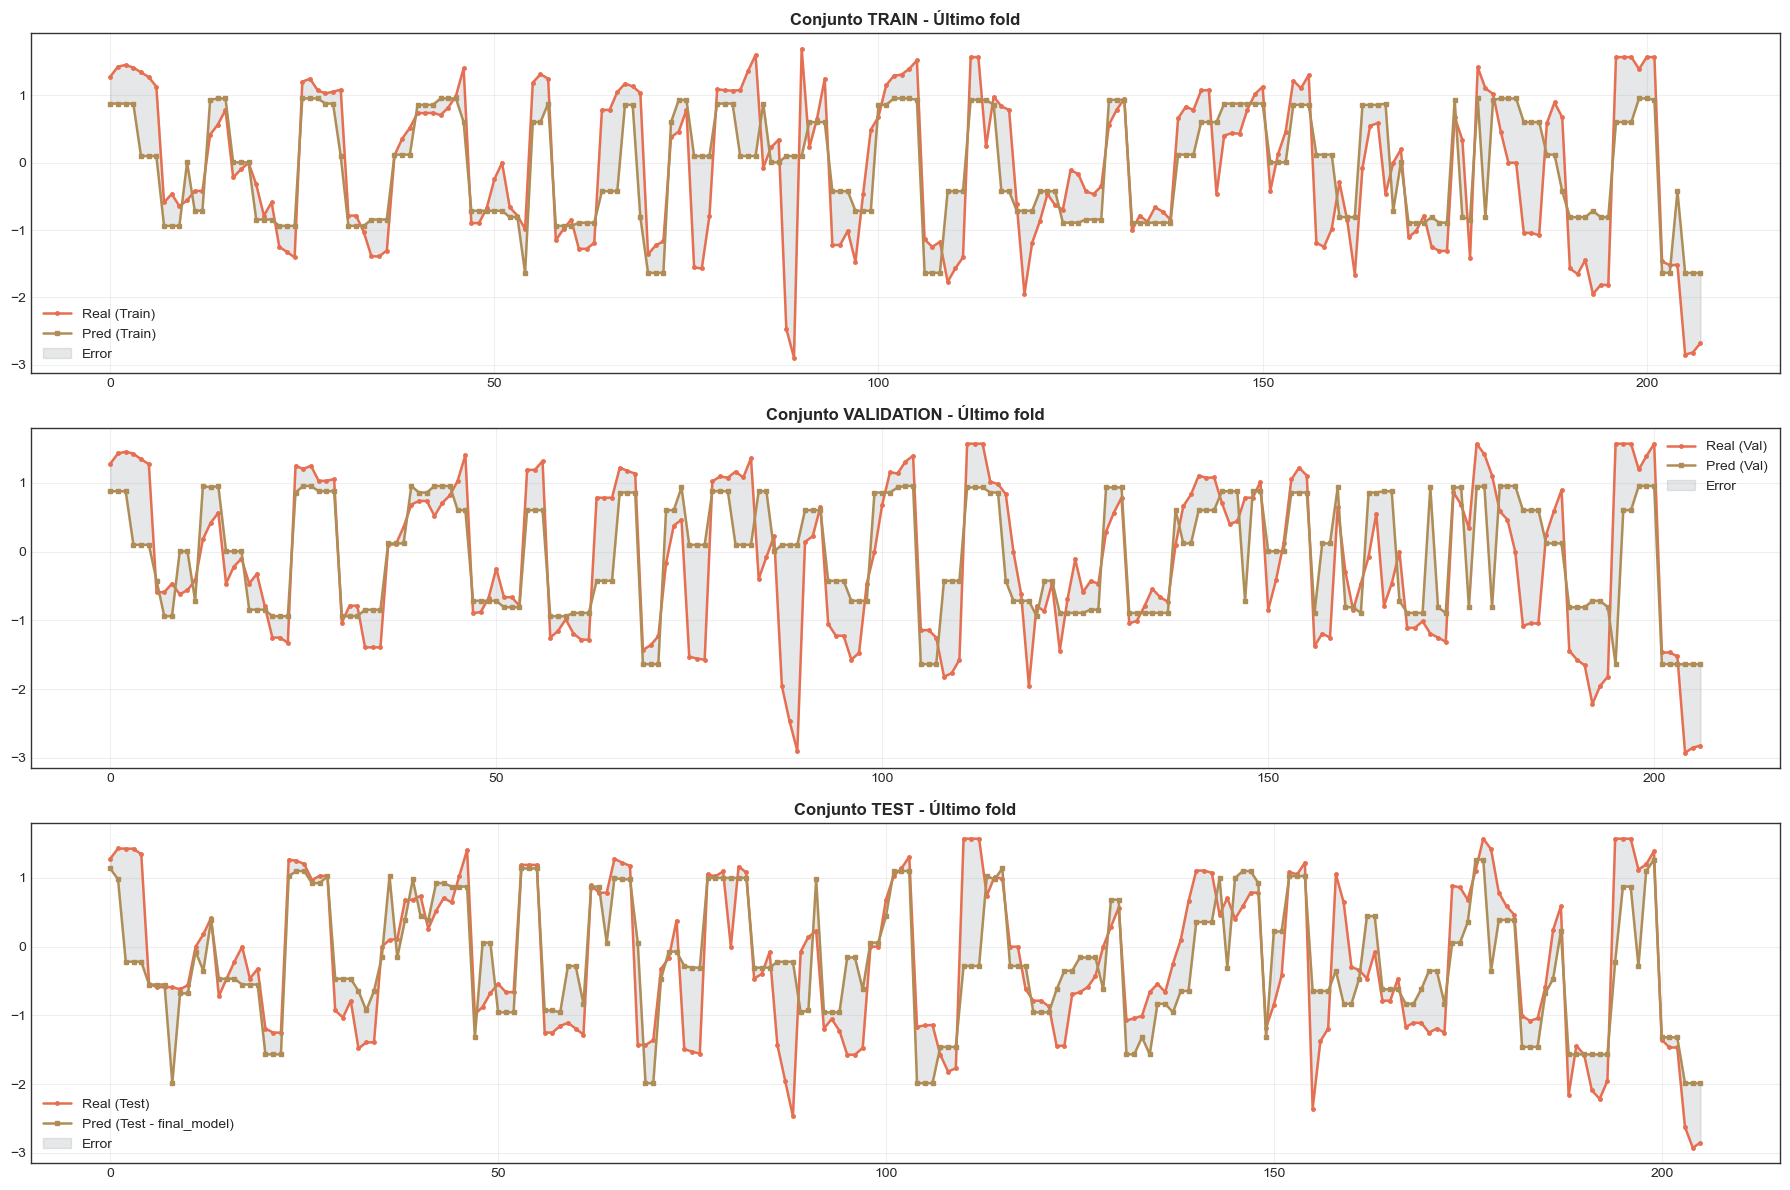

In [198]:
# =======================
# Decision Tree (tsxv split) + Gráficas + BDS
# =======================

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import jarque_bera

try:
    from statsmodels.tsa.stattools import bds
    HAS_BDS = True
except Exception:
    HAS_BDS = False
    print("Aviso: no se pudo importar bds; se omite BDS.")

# ---- estilo idéntico ----
plt.style.use('seaborn-v0_8-whitegrid'); sns.set_palette("husl")
plt.rcParams.update({"axes.edgecolor":"#333","axes.titleweight":"bold","axes.grid":True,"grid.alpha":0.3,"legend.frameon":False})
COL_REAL, COL_PRED, COL_ERR = "#e76f51", "#b08d57", "#9aa0a6"
H_GRAPH = 0  # h=0 (t+1)

# ---- utils ----
def MAPE(y_true,y_pred,eps=1e-8):
    yt=np.asarray(y_true).ravel().astype(float); yp=np.asarray(y_pred).ravel().astype(float)
    return 100*np.mean(np.abs(yt-yp)/np.maximum(np.abs(yt),eps))
def RMSE(y_true,y_pred): return float(np.sqrt(mean_squared_error(np.asarray(y_true).ravel(), np.asarray(y_pred).ravel())))
def MAE(y_true,y_pred):  return float(mean_absolute_error(np.asarray(y_true).ravel(), np.asarray(y_pred).ravel()))
def sMAPE(y_true,y_pred,eps=1e-8):
    yt=np.asarray(y_true).ravel().astype(float); yp=np.asarray(y_pred).ravel().astype(float)
    return 100*np.mean(2*np.abs(yp-yt)/(np.abs(yt)+np.abs(yp)+eps))
def last_block_dates(df_full, n, offset=0):
    if isinstance(df_full,pd.DataFrame) and 'ds' in df_full.columns:
        idx=pd.to_datetime(df_full['ds']); end=len(idx)-offset; start=max(0,end-n); return idx.iloc[start:end]
    return pd.RangeIndex(n)
def run_bds(res_1d, max_dim=6):
    if not HAS_BDS: return "BDS no disponible."
    r=np.asarray(res_1d,dtype=float).ravel(); stats,pvals=bds(r,max_dim=max_dim)
    dims=np.arange(2,2+len(np.ravel(stats))); lines=[f"m={int(m)}: p={float(p):.3g}" for m,p in zip(dims,np.ravel(pvals))]
    concl="Rechazamos H0 — residuos NO independientes." if (np.ravel(pvals)<0.05).any() else "No rechazamos H0 — residuos independientes."
    return " | ".join(lines)+" || "+concl

# ===== 1) Entrena en TRAIN y valida en VAL =====
dt = DecisionTreeRegressor(max_depth=10, min_samples_split=20, min_samples_leaf=10, max_features='sqrt', random_state=42)
dt.fit(X, y)               # multi-output nativo
y_tr_pred = dt.predict(X)
y_cv_pred = dt.predict(Xcv)

# ===== 2) Reentrena en TRAIN+VAL y evalúa en TEST =====
dt_final = DecisionTreeRegressor(max_depth=10, min_samples_split=20, min_samples_leaf=10, max_features='sqrt', random_state=42)
dt_final.fit(np.vstack([X,Xcv]), np.vstack([y,ycv]))
y_te_pred = dt_final.predict(Xtest)

# ===== 3) Métricas + BDS =====
print("\n[Decision Tree] Métricas")
for name,(yt,yp) in {"Train":(y,y_tr_pred),"Val":(ycv,y_cv_pred),"Test":(ytest,y_te_pred)}.items():
    line=f"{name:>5}: MAPE={MAPE(yt,yp):.4f}% | MAE={MAE(yt,yp):.6f} | RMSE={RMSE(yt,yp):.6f}"
    if name!="Train": line+=f" | sMAPE={sMAPE(yt,yp):.2f}%"
    print(line)
resid_h0 = ytest[:,0]-y_te_pred[:,0]
print("[Decision Tree] BDS (residuos TEST, h=t+1):", run_bds(resid_h0, max_dim=6))

# ===== 4) Gráficas estilo compañera =====
Nte,Nva,Ntr=len(ytest),len(ycv),len(y)
test_dates  = last_block_dates(df,Nte,offset=0)
val_dates   = last_block_dates(df,Nva,offset=Nte)
train_dates = last_block_dates(df,Ntr,offset=Nte+Nva)

# General 3x3
fig=plt.figure(figsize=(20,16)); gs=fig.add_gridspec(3,3,hspace=0.35,wspace=0.35)
ax1=fig.add_subplot(gs[0,:])
ax1.plot(test_dates,ytest[:,H_GRAPH],'o-',color=COL_REAL,linewidth=2,markersize=3,label='Valores Reales (Test)')
ax1.plot(test_dates,y_te_pred[:,H_GRAPH],'s-',color=COL_PRED,linewidth=2,markersize=3,label='Predicciones (Test)')
ax1.fill_between(test_dates,ytest[:,H_GRAPH],y_te_pred[:,H_GRAPH],color=COL_ERR,alpha=0.25,label='Error')
ax1.set_title('Predicciones vs Valores Reales - Decision Tree (TEST)'); ax1.set_xlabel('Tiempo'); ax1.set_ylabel('Valor'); ax1.legend()

ax2=fig.add_subplot(gs[1,0])
ax2.scatter(ytest[:,H_GRAPH],y_te_pred[:,H_GRAPH],alpha=0.6,s=25,color=COL_REAL)
miv=min(ytest[:,H_GRAPH].min(),y_te_pred[:,H_GRAPH].min()); mav=max(ytest[:,H_GRAPH].max(),y_te_pred[:,H_GRAPH].max())
ax2.plot([miv,mav],[miv,mav],'r--',linewidth=1.5,label='Línea perfecta'); ax2.set_title('Dispersión: Real vs Predicho (TEST)')
ax2.set_xlabel('Valores Reales'); ax2.set_ylabel('Predicciones'); ax2.legend()

ax3=fig.add_subplot(gs[1,1]); ax3.plot(test_dates,resid_h0,'o-',color=COL_REAL,linewidth=1,markersize=2)
ax3.axhline(0,color='k',ls='--',alpha=0.8); ax3.set_title('Residuos del Modelo (TEST)'); ax3.set_xlabel('Tiempo'); ax3.set_ylabel('Residuos')

ax4=fig.add_subplot(gs[1,2]); ax4.hist(resid_h0,bins=30,alpha=0.7,ec='black',color=COL_REAL)
ax4.set_title('Distribución de Residuos (TEST)'); ax4.set_xlabel('Residuos'); ax4.set_ylabel('Frecuencia')

ax5=fig.add_subplot(gs[2,0])
imp = getattr(dt_final,"feature_importances_", np.zeros(X.shape[1],dtype=float))
feat_names=[f"feat_{i}" for i in range(X.shape[1])]
top_idx=np.argsort(imp)[-10:]; fi=pd.DataFrame({"feature":np.array(feat_names)[top_idx],"importance":imp[top_idx]}).sort_values("importance")
ax5.barh(range(len(fi)),fi["importance"],color=COL_PRED); ax5.set_yticks(range(len(fi))); ax5.set_yticklabels(fi["feature"])
ax5.set_xlabel("Importancia"); ax5.set_title("Top 10 Features Importantes"); ax5.grid(True,axis="x",alpha=0.3)

ax6=fig.add_subplot(gs[2,1]); mape_val=MAPE(ycv,y_cv_pred); mae_val=MAE(ycv,y_cv_pred); rmse_val=RMSE(ycv,y_cv_pred)
ax6.boxplot([[mape_val],[mae_val],[rmse_val]],labels=['MAPE','MAE','RMSE']); ax6.set_title('Distribución de Métricas CV (Validación)'); ax6.set_ylabel('Valor')

from scipy import stats
ax7=fig.add_subplot(gs[2,2]); stats.probplot(resid_h0,dist="norm",plot=ax7); ax7.set_title('Q-Q Plot de Residuos (TEST)')
plt.suptitle('Análisis General - Decision Tree - Series Temporales',fontsize=18,fontweight='bold'); plt.tight_layout(); plt.show()

# Por conjunto
fig2,axs=plt.subplots(3,1,figsize=(18,12),sharex=False)
axs[0].plot(train_dates,y[:,H_GRAPH],'o-',color=COL_REAL,ms=2.5,lw=1.8,label='Real (Train)')
axs[0].plot(train_dates,y_tr_pred[:,H_GRAPH],'s-',color=COL_PRED,ms=2.5,lw=1.8,label='Pred (Train)')
axs[0].fill_between(train_dates,y[:,H_GRAPH],y_tr_pred[:,H_GRAPH],color=COL_ERR,alpha=0.25,label='Error'); axs[0].set_title('Conjunto TRAIN - Último fold'); axs[0].legend()
axs[1].plot(val_dates,ycv[:,H_GRAPH],'o-',color=COL_REAL,ms=2.5,lw=1.8,label='Real (Val)')
axs[1].plot(val_dates,y_cv_pred[:,H_GRAPH],'s-',color=COL_PRED,ms=2.5,lw=1.8,label='Pred (Val)')
axs[1].fill_between(val_dates,ycv[:,H_GRAPH],y_cv_pred[:,H_GRAPH],color=COL_ERR,alpha=0.25,label='Error'); axs[1].set_title('Conjunto VALIDATION - Último fold'); axs[1].legend()
axs[2].plot(test_dates,ytest[:,H_GRAPH],'o-',color=COL_REAL,ms=2.5,lw=1.8,label='Real (Test)')
axs[2].plot(test_dates,y_te_pred[:,H_GRAPH],'s-',color=COL_PRED,ms=2.5,lw=1.8,label='Pred (Test - final_model)')
axs[2].fill_between(test_dates,ytest[:,H_GRAPH],y_te_pred[:,H_GRAPH],color=COL_ERR,alpha=0.25,label='Error'); axs[2].set_title('Conjunto TEST - Último fold'); axs[2].legend()
plt.tight_layout(); plt.show()

In [60]:
import joblib

# Guardar el modelo
joblib.dump(dt_final, 'models_all/detree_final_timeSplit.pkl')

['models_all/detree_final_timeSplit.pkl']

# Random Forest


[Random Forest] Métricas
Train: MAPE=18071639.7888% | MAE=0.176111 | RMSE=0.295977
  Val: MAPE=30454236.9005% | MAE=0.271871 | RMSE=0.570564 | sMAPE=30.58%
 Test: MAPE=32281029.6121% | MAE=0.232165 | RMSE=0.565599 | sMAPE=26.19%
[Random Forest] BDS (residuos TEST, h=t+1): m=2: p=0.497 | m=3: p=0.966 | m=4: p=0.496 | m=5: p=0.482 | m=6: p=0.595 || No rechazamos H0 — residuos independientes.


/var/folders/_p/446c73rj4x19qh7rmqlrf1980000gp/T/ipykernel_92315/1945060331.py:84: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax6.boxplot([[mape_val],[mae_val],[rmse_val]],labels=['MAPE','MAE','RMSE']); ax6.set_title('Distribución de Métricas CV (Validación)'); ax6.set_ylabel('Valor')
/var/folders/_p/446c73rj4x19qh7rmqlrf1980000gp/T/ipykernel_92315/1945060331.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.suptitle('Análisis General - Random Forest - Series Temporales',fontsize=18,fontweight='bold'); plt.tight_layout(); plt.show()


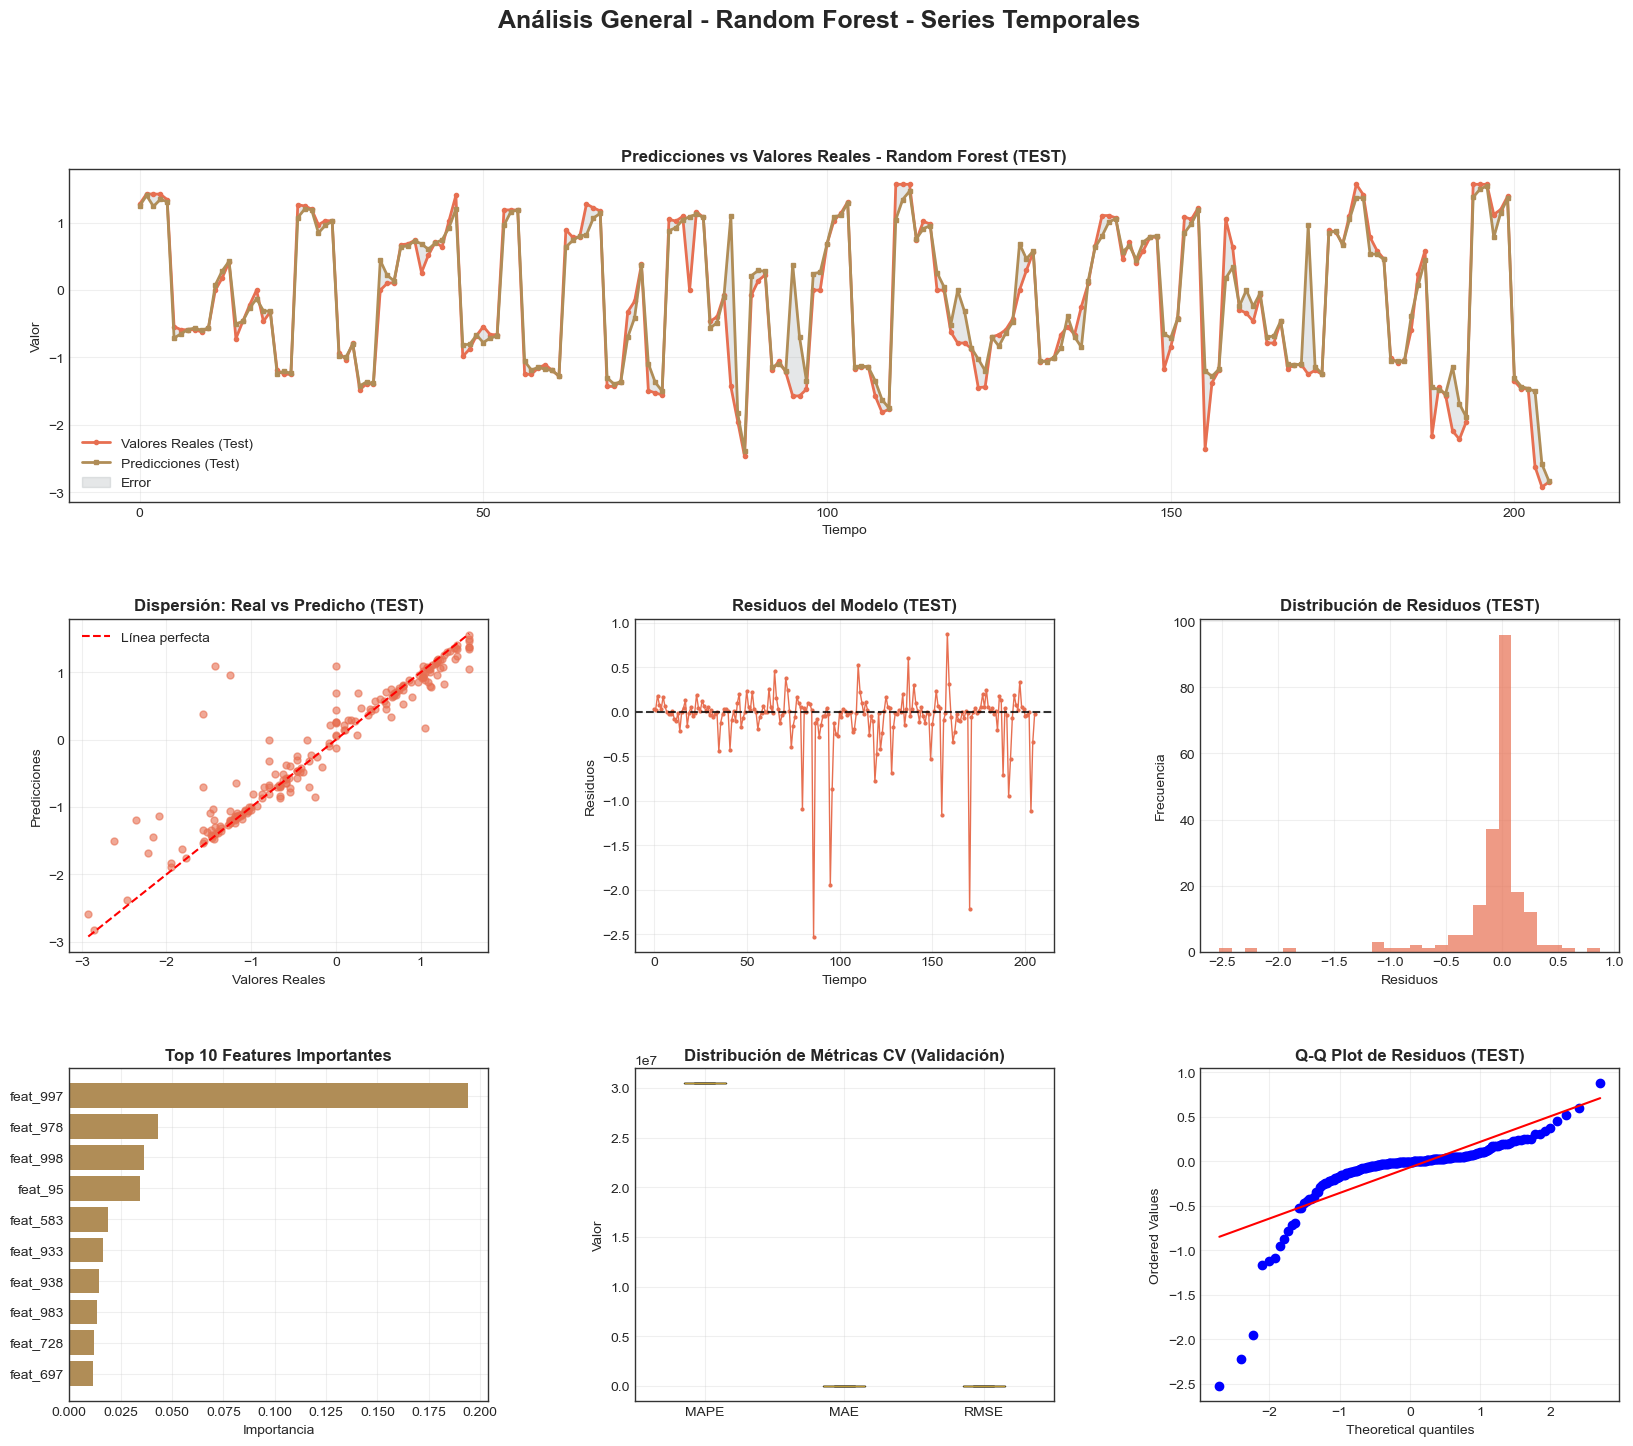

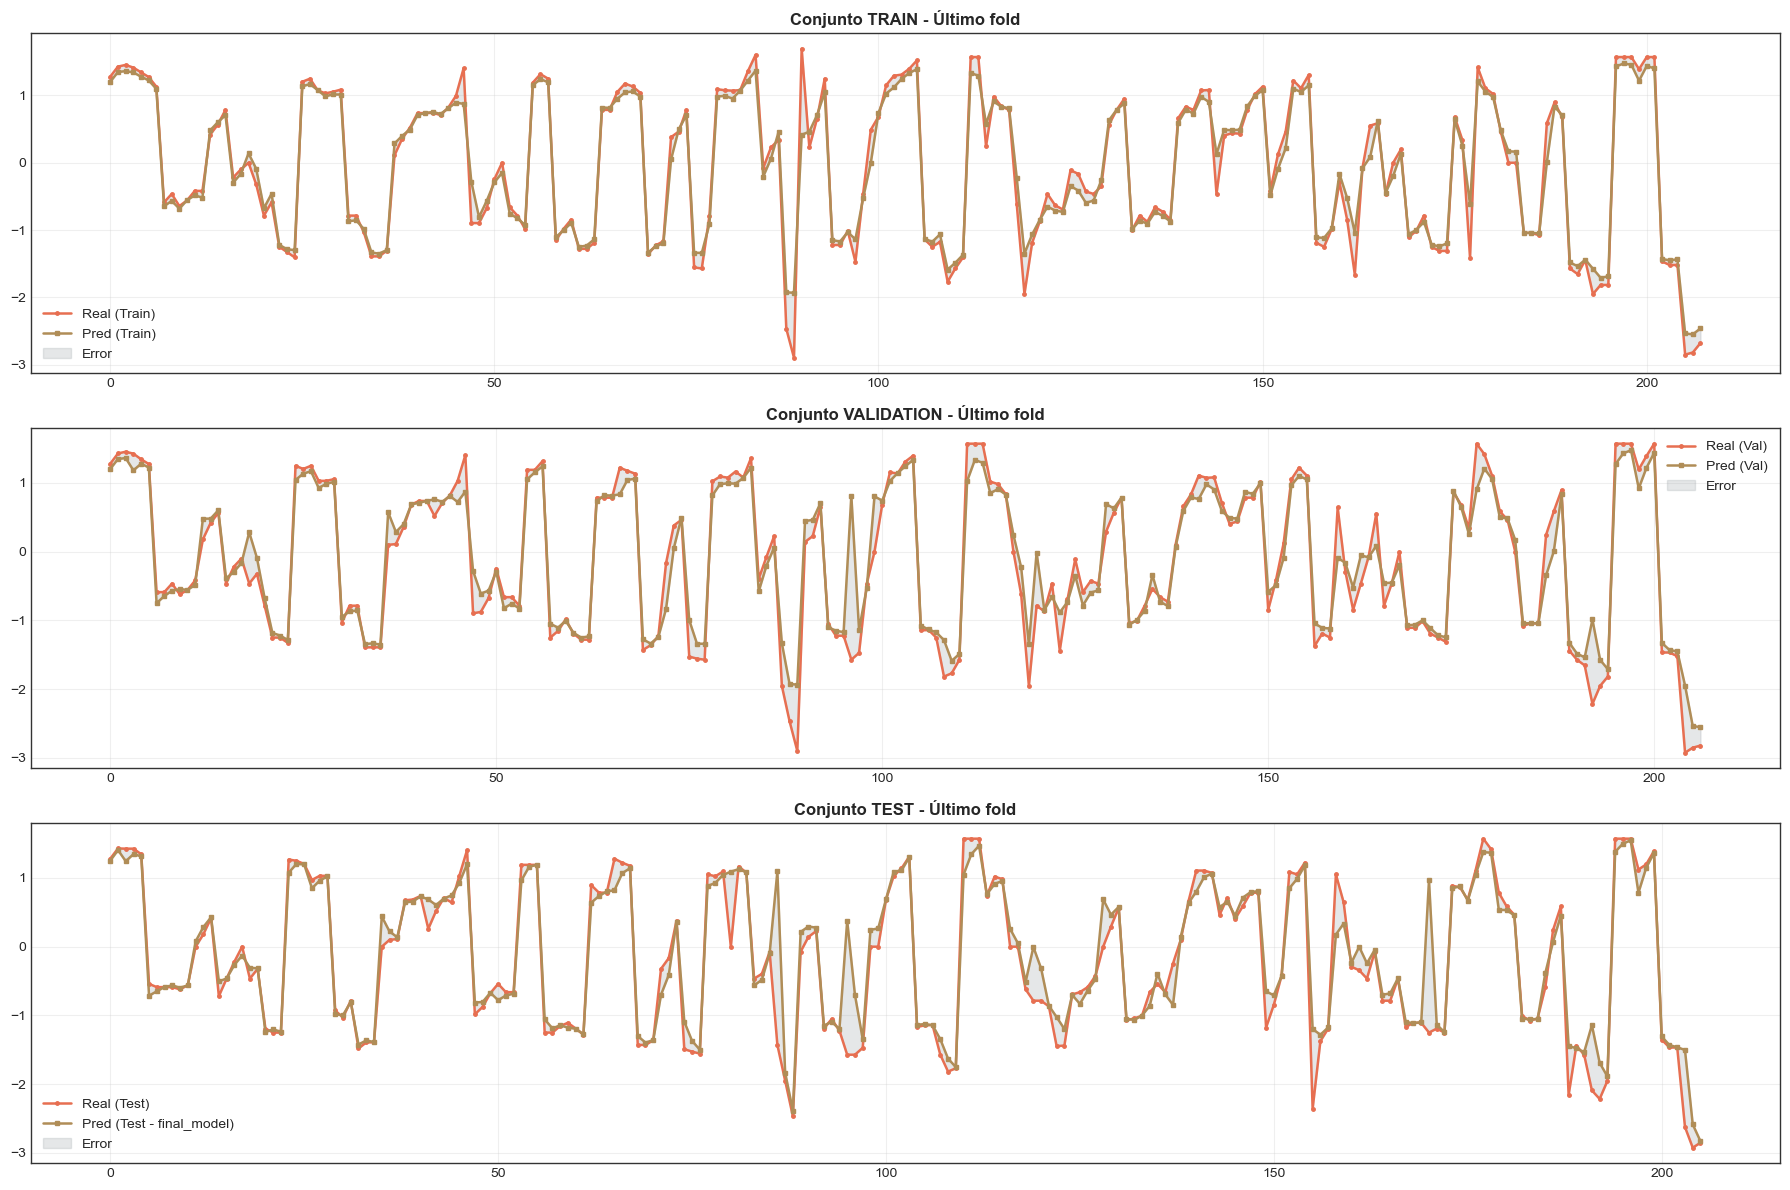

In [61]:
# =======================
# Random Forest (tsxv split) + Gráficas estilo compañera + BDS
# =======================
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import jarque_bera
try:
    from statsmodels.tsa.stattools import bds
    HAS_BDS=True
except Exception:
    HAS_BDS=False; print("Aviso: no se pudo importar bds; se omite BDS.")

plt.style.use('seaborn-v0_8-whitegrid'); sns.set_palette("husl")
plt.rcParams.update({"axes.edgecolor":"#333","axes.titleweight":"bold","axes.grid":True,"grid.alpha":0.3,"legend.frameon":False})
COL_REAL, COL_PRED, COL_ERR = "#e76f51", "#b08d57", "#9aa0a6"; H_GRAPH=0

def MAPE(y_true,y_pred,eps=1e-8):
    yt=np.asarray(y_true).ravel().astype(float); yp=np.asarray(y_pred).ravel().astype(float)
    return 100*np.mean(np.abs(yt-yp)/np.maximum(np.abs(yt),eps))
def RMSE(y_true,y_pred): return float(np.sqrt(mean_squared_error(np.asarray(y_true).ravel(), np.asarray(y_pred).ravel())))
def MAE(y_true,y_pred):  return float(mean_absolute_error(np.asarray(y_true).ravel(), np.asarray(y_pred).ravel()))
def sMAPE(y_true,y_pred,eps=1e-8):
    yt=np.asarray(y_true).ravel().astype(float); yp=np.asarray(y_pred).ravel().astype(float)
    return 100*np.mean(2*np.abs(yp-yt)/(np.abs(yt)+np.abs(yp)+eps))
def last_block_dates(df_full,n,offset=0):
    if isinstance(df_full,pd.DataFrame) and 'ds' in df_full.columns:
        idx=pd.to_datetime(df_full['ds']); end=len(idx)-offset; start=max(0,end-n); return idx.iloc[start:end]
    return pd.RangeIndex(n)
def run_bds(res_1d,max_dim=6):
    if not HAS_BDS: return "BDS no disponible."
    stats,pvals=bds(np.asarray(res_1d,dtype=float).ravel(),max_dim=max_dim)
    dims=np.arange(2,2+len(np.ravel(stats))); lines=[f"m={int(m)}: p={float(p):.3g}" for m,p in zip(dims,np.ravel(pvals))]
    concl="Rechazamos H0 — residuos NO independientes." if (np.ravel(pvals)<0.05).any() else "No rechazamos H0 — residuos independientes."
    return " | ".join(lines)+" || "+concl

# 1) Train->Val
rf = RandomForestRegressor(n_estimators=600, max_depth=None, min_samples_leaf=1, n_jobs=-1, random_state=42)
rf.fit(X, y)
y_tr_pred = rf.predict(X); y_cv_pred = rf.predict(Xcv)

# 2) Train+Val->Test
rf_final = RandomForestRegressor(n_estimators=600, max_depth=None, min_samples_leaf=1, n_jobs=-1, random_state=42)
rf_final.fit(np.vstack([X,Xcv]), np.vstack([y,ycv]))
y_te_pred = rf_final.predict(Xtest)

# 3) Métricas + BDS
print("\n[Random Forest] Métricas")
for name,(yt,yp) in {"Train":(y,y_tr_pred),"Val":(ycv,y_cv_pred),"Test":(ytest,y_te_pred)}.items():
    line=f"{name:>5}: MAPE={MAPE(yt,yp):.4f}% | MAE={MAE(yt,yp):.6f} | RMSE={RMSE(yt,yp):.6f}"
    if name!="Train": line+=f" | sMAPE={sMAPE(yt,yp):.2f}%"
    print(line)
resid_h0=ytest[:,0]-y_te_pred[:,0]
print("[Random Forest] BDS (residuos TEST, h=t+1):", run_bds(resid_h0))

# 4) Gráficas (idénticas)
Nte,Nva,Ntr=len(ytest),len(ycv),len(y)
test_dates=last_block_dates(df,Nte,0); val_dates=last_block_dates(df,Nva,Nte); train_dates=last_block_dates(df,Ntr,Nte+Nva)

fig=plt.figure(figsize=(20,16)); gs=fig.add_gridspec(3,3,hspace=0.35,wspace=0.35)
ax1=fig.add_subplot(gs[0,:]); ax1.plot(test_dates,ytest[:,H_GRAPH],'o-',color=COL_REAL,lw=2,ms=3,label='Valores Reales (Test)')
ax1.plot(test_dates,y_te_pred[:,H_GRAPH],'s-',color=COL_PRED,lw=2,ms=3,label='Predicciones (Test)')
ax1.fill_between(test_dates,ytest[:,H_GRAPH],y_te_pred[:,H_GRAPH],color=COL_ERR,alpha=0.25,label='Error')
ax1.set_title('Predicciones vs Valores Reales - Random Forest (TEST)'); ax1.set_xlabel('Tiempo'); ax1.set_ylabel('Valor'); ax1.legend()

ax2=fig.add_subplot(gs[1,0]); ax2.scatter(ytest[:,H_GRAPH],y_te_pred[:,H_GRAPH],alpha=0.6,s=25,color=COL_REAL)
miv=min(ytest[:,H_GRAPH].min(),y_te_pred[:,H_GRAPH].min()); mav=max(ytest[:,H_GRAPH].max(),y_te_pred[:,H_GRAPH].max())
ax2.plot([miv,mav],[miv,mav],'r--',lw=1.5,label='Línea perfecta'); ax2.set_title('Dispersión: Real vs Predicho (TEST)')
ax2.set_xlabel('Valores Reales'); ax2.set_ylabel('Predicciones'); ax2.legend()

ax3=fig.add_subplot(gs[1,1]); ax3.plot(test_dates,resid_h0,'o-',color=COL_REAL,lw=1,ms=2)
ax3.axhline(0,color='k',ls='--',alpha=0.8); ax3.set_title('Residuos del Modelo (TEST)'); ax3.set_xlabel('Tiempo'); ax3.set_ylabel('Residuos')

ax4=fig.add_subplot(gs[1,2]); ax4.hist(resid_h0,bins=30,alpha=0.7,ec='black',color=COL_REAL)
ax4.set_title('Distribución de Residuos (TEST)'); ax4.set_xlabel('Residuos'); ax4.set_ylabel('Frecuencia')

ax5=fig.add_subplot(gs[2,0]); imp=getattr(rf_final,"feature_importances_",np.zeros(X.shape[1],dtype=float))
feat_names=[f"feat_{i}" for i in range(X.shape[1])]; top_idx=np.argsort(imp)[-10:]
fi=pd.DataFrame({"feature":np.array(feat_names)[top_idx],"importance":imp[top_idx]}).sort_values("importance")
ax5.barh(range(len(fi)),fi["importance"],color=COL_PRED); ax5.set_yticks(range(len(fi))); ax5.set_yticklabels(fi["feature"])
ax5.set_xlabel("Importancia"); ax5.set_title("Top 10 Features Importantes"); ax5.grid(True,axis="x",alpha=0.3)

ax6=fig.add_subplot(gs[2,1]); mape_val=MAPE(ycv,y_cv_pred); mae_val=MAE(ycv,y_cv_pred); rmse_val=RMSE(ycv,y_cv_pred)
ax6.boxplot([[mape_val],[mae_val],[rmse_val]],labels=['MAPE','MAE','RMSE']); ax6.set_title('Distribución de Métricas CV (Validación)'); ax6.set_ylabel('Valor')

from scipy import stats
ax7=fig.add_subplot(gs[2,2]); stats.probplot(resid_h0,dist="norm",plot=ax7); ax7.set_title('Q-Q Plot de Residuos (TEST)')
plt.suptitle('Análisis General - Random Forest - Series Temporales',fontsize=18,fontweight='bold'); plt.tight_layout(); plt.show()

fig2,axs=plt.subplots(3,1,figsize=(18,12),sharex=False)
axs[0].plot(train_dates,y[:,H_GRAPH],'o-',color=COL_REAL,ms=2.5,lw=1.8,label='Real (Train)')
axs[0].plot(train_dates,y_tr_pred[:,H_GRAPH],'s-',color=COL_PRED,ms=2.5,lw=1.8,label='Pred (Train)')
axs[0].fill_between(train_dates,y[:,H_GRAPH],y_tr_pred[:,H_GRAPH],color=COL_ERR,alpha=0.25,label='Error'); axs[0].set_title('Conjunto TRAIN - Último fold'); axs[0].legend()
axs[1].plot(val_dates,ycv[:,H_GRAPH],'o-',color=COL_REAL,ms=2.5,lw=1.8,label='Real (Val)')
axs[1].plot(val_dates,y_cv_pred[:,H_GRAPH],'s-',color=COL_PRED,ms=2.5,lw=1.8,label='Pred (Val)')
axs[1].fill_between(val_dates,ycv[:,H_GRAPH],y_cv_pred[:,H_GRAPH],color=COL_ERR,alpha=0.25,label='Error'); axs[1].set_title('Conjunto VALIDATION - Último fold'); axs[1].legend()
axs[2].plot(test_dates,ytest[:,H_GRAPH],'o-',color=COL_REAL,ms=2.5,lw=1.8,label='Real (Test)')
axs[2].plot(test_dates,y_te_pred[:,H_GRAPH],'s-',color=COL_PRED,ms=2.5,lw=1.8,label='Pred (Test - final_model)')
axs[2].fill_between(test_dates,ytest[:,H_GRAPH],y_te_pred[:,H_GRAPH],color=COL_ERR,alpha=0.25,label='Error'); axs[2].set_title('Conjunto TEST - Último fold'); axs[2].legend()
plt.tight_layout(); plt.show()

# Modelo XGBoost


[XGBoost] Métricas
Train: MAPE=36936.3070% | MAE=0.000297 | RMSE=0.000358
  Val: MAPE=18534984.1555% | MAE=0.146771 | RMSE=0.517411 | sMAPE=17.41%
 Test: MAPE=24877618.7023% | MAE=0.147315 | RMSE=0.510887 | sMAPE=17.48%
[XGBoost] BDS (residuos TEST, h=t+1): m=2: p=0.161 | m=3: p=0.0478 | m=4: p=0.465 | m=5: p=0.708 | m=6: p=0.714 || Rechazamos H0 — residuos NO independientes.


/var/folders/_p/446c73rj4x19qh7rmqlrf1980000gp/T/ipykernel_92315/1029435192.py:108: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax6.boxplot([[mape_val],[mae_val],[rmse_val]],labels=['MAPE','MAE','RMSE']); ax6.set_title('Distribución de Métricas CV (Validación)'); ax6.set_ylabel('Valor')
/var/folders/_p/446c73rj4x19qh7rmqlrf1980000gp/T/ipykernel_92315/1029435192.py:112: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.suptitle('Análisis General - XGBoost - Series Temporales',fontsize=18,fontweight='bold'); plt.tight_layout(); plt.show()


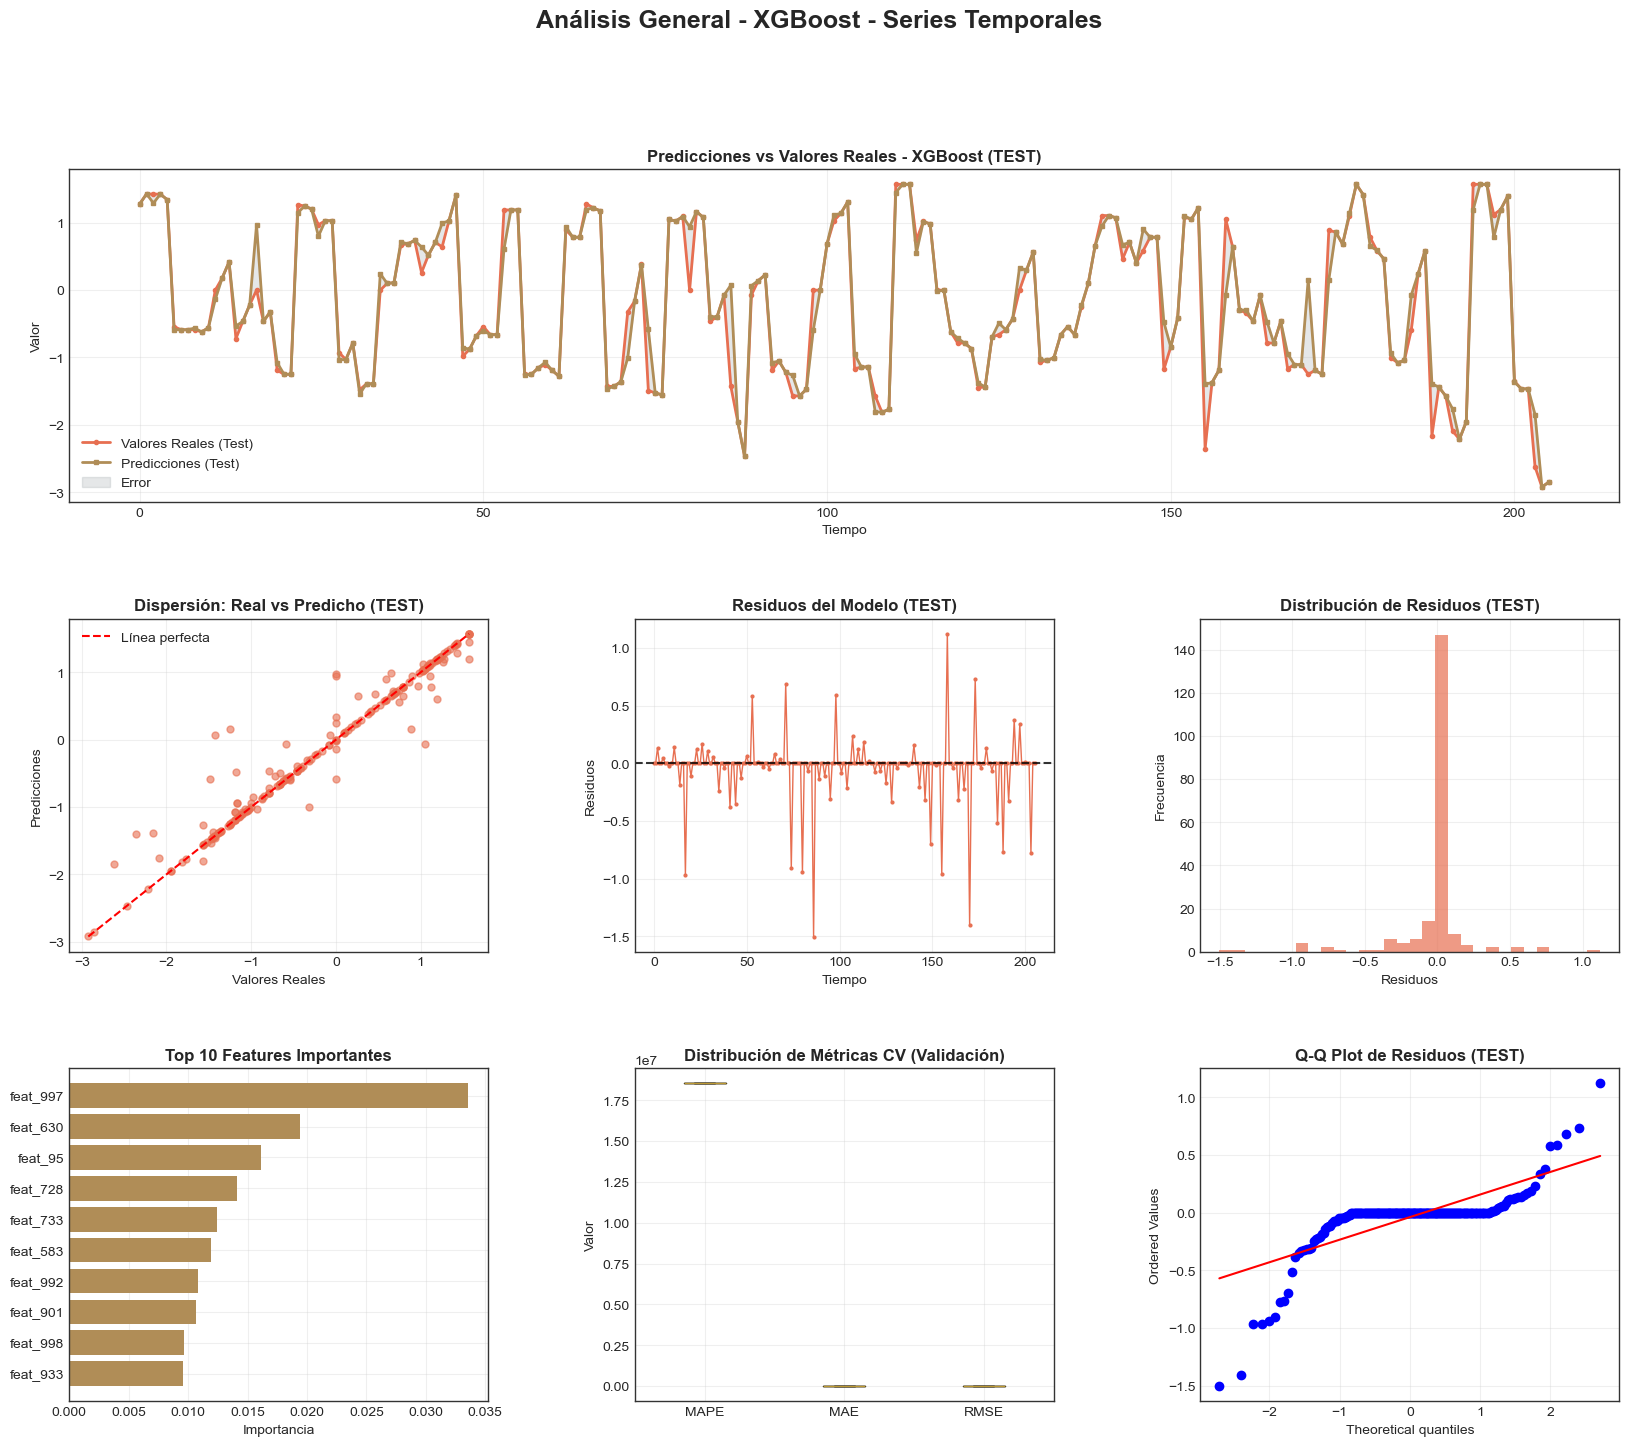

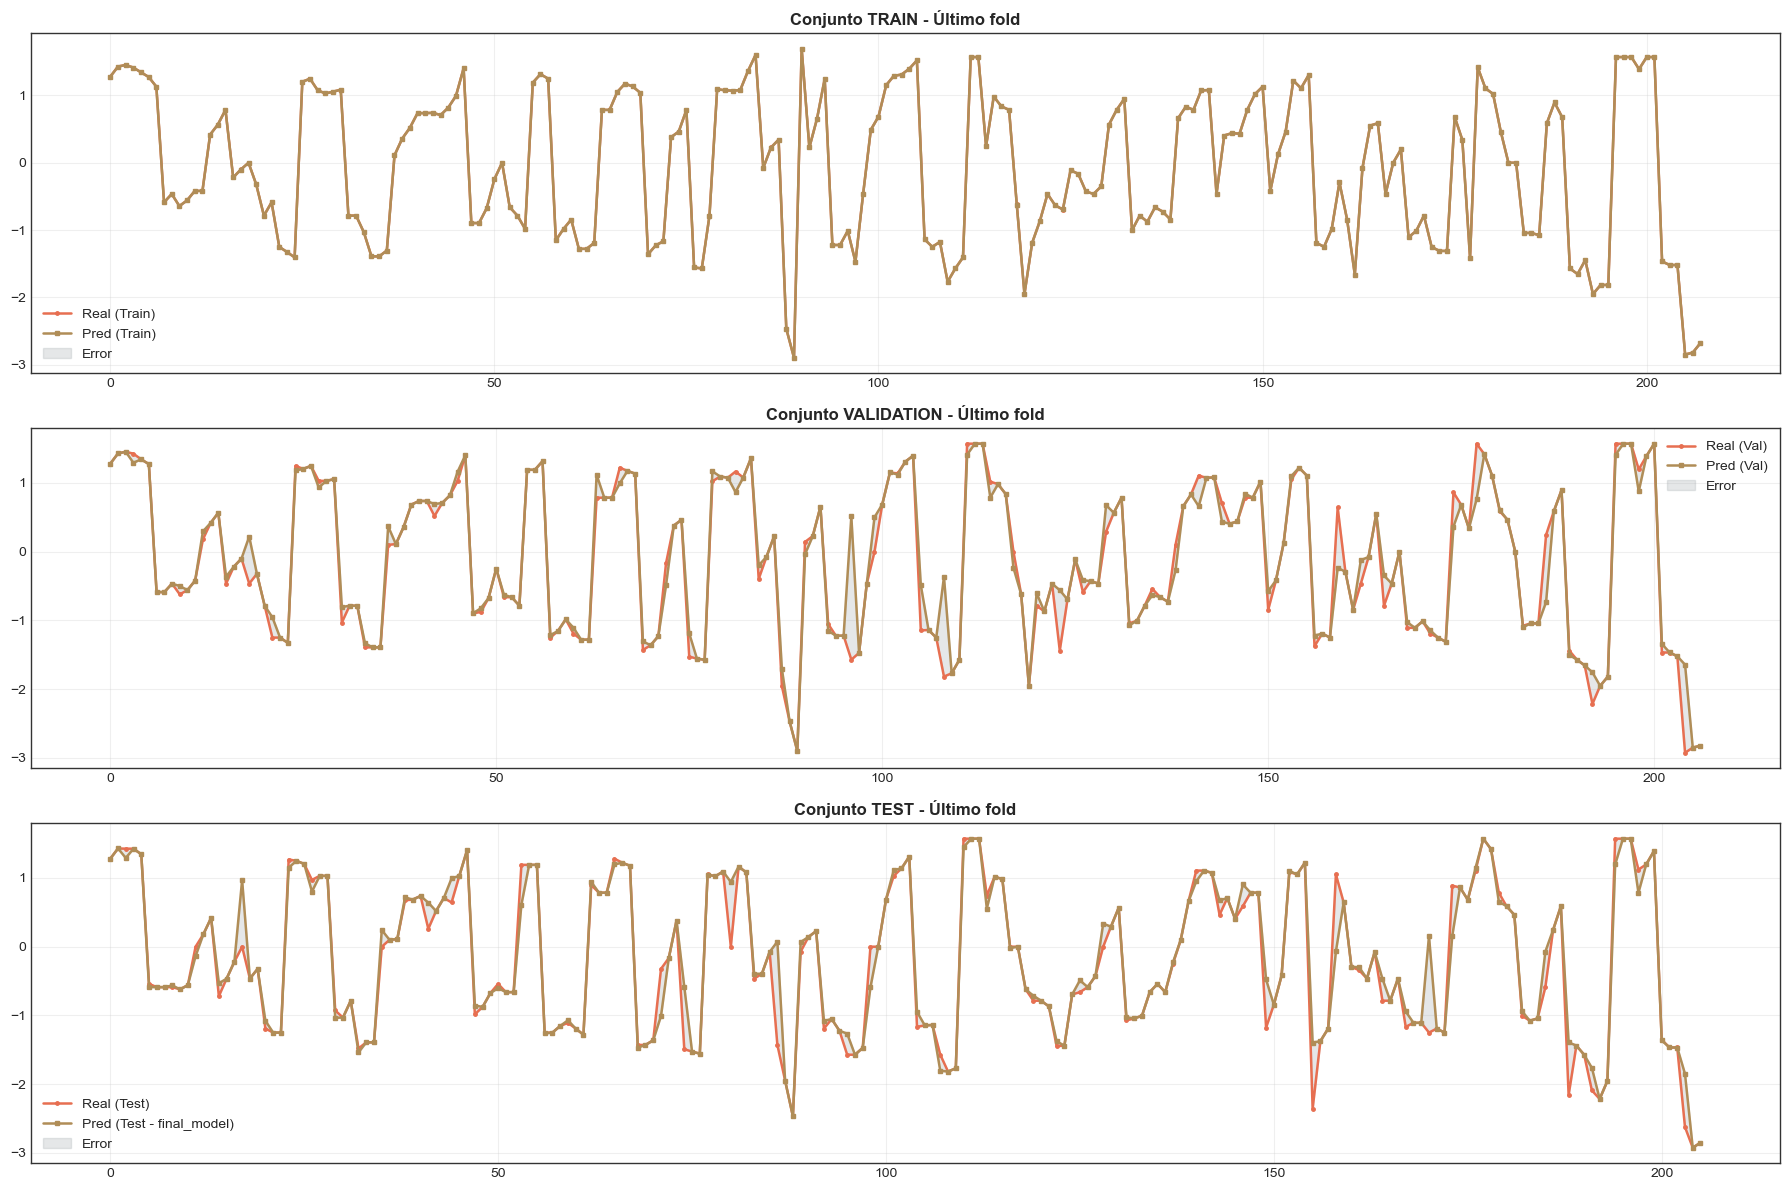

In [62]:
# =======================
# XGBoost (tsxv split) + Gráficas estilo compañera + BDS
# =======================
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import jarque_bera

try:
    from xgboost import XGBRegressor
except Exception:
    import sys, subprocess
    subprocess.check_call([sys.executable,"-m","pip","install","-q","xgboost"])
    from xgboost import XGBRegressor

try:
    from statsmodels.tsa.stattools import bds
    HAS_BDS=True
except Exception:
    HAS_BDS=False; print("Aviso: no se pudo importar bds; se omite BDS.")

plt.style.use('seaborn-v0_8-whitegrid'); sns.set_palette("husl")
plt.rcParams.update({"axes.edgecolor":"#333","axes.titleweight":"bold","axes.grid":True,"grid.alpha":0.3,"legend.frameon":False})
COL_REAL, COL_PRED, COL_ERR = "#e76f51", "#b08d57", "#9aa0a6"; H_GRAPH=0

def MAPE(y_true,y_pred,eps=1e-8):
    yt=np.asarray(y_true).ravel().astype(float); yp=np.asarray(y_pred).ravel().astype(float)
    return 100*np.mean(np.abs(yt-yp)/np.maximum(np.abs(yt),eps))
def RMSE(y_true,y_pred): return float(np.sqrt(mean_squared_error(np.asarray(y_true).ravel(), np.asarray(y_pred).ravel())))
def MAE(y_true,y_pred):  return float(mean_absolute_error(np.asarray(y_true).ravel(), np.asarray(y_pred).ravel()))
def sMAPE(y_true,y_pred,eps=1e-8):
    yt=np.asarray(y_true).ravel().astype(float); yp=np.asarray(y_pred).ravel().astype(float)
    return 100*np.mean(2*np.abs(yp-yt)/(np.abs(yt)+np.abs(yp)+eps))
def last_block_dates(df_full,n,offset=0):
    if isinstance(df_full,pd.DataFrame) and 'ds' in df_full.columns:
        idx=pd.to_datetime(df_full['ds']); end=len(idx)-offset; start=max(0,end-n); return idx.iloc[start:end]
    return pd.RangeIndex(n)
def run_bds(res_1d,max_dim=6):
    if not HAS_BDS: return "BDS no disponible."
    stats,pvals=bds(np.asarray(res_1d,dtype=float).ravel(),max_dim=max_dim)
    dims=np.arange(2,2+len(np.ravel(stats))); lines=[f"m={int(m)}: p={float(p):.3g}" for m,p in zip(dims,np.ravel(pvals))]
    concl="Rechazamos H0 — residuos NO independientes." if (np.ravel(pvals)<0.05).any() else "No rechazamos H0 — residuos independientes."
    return " | ".join(lines)+" || "+concl

# 1) Base XGB y wrapper multi-output
xgb_base = XGBRegressor(
    n_estimators=600, learning_rate=0.05, max_depth=6,
    subsample=0.8, colsample_bytree=0.8,
    reg_lambda=1.0, reg_alpha=0.0,
    objective="reg:squarederror", tree_method="hist",
    n_jobs=-1, random_state=42
)
xgb = MultiOutputRegressor(xgb_base)

# 2) Train->Val
xgb.fit(X, y); y_tr_pred = xgb.predict(X); y_cv_pred = xgb.predict(Xcv)

# 3) Train+Val->Test
xgb_final = MultiOutputRegressor(XGBRegressor(**xgb_base.get_params()))
xgb_final.fit(np.vstack([X,Xcv]), np.vstack([y,ycv]))
y_te_pred = xgb_final.predict(Xtest)

# 4) Métricas + BDS
print("\n[XGBoost] Métricas")
for name,(yt,yp) in {"Train":(y,y_tr_pred),"Val":(ycv,y_cv_pred),"Test":(ytest,y_te_pred)}.items():
    line=f"{name:>5}: MAPE={MAPE(yt,yp):.4f}% | MAE={MAE(yt,yp):.6f} | RMSE={RMSE(yt,yp):.6f}"
    if name!="Train": line+=f" | sMAPE={sMAPE(yt,yp):.2f}%"
    print(line)
resid_h0=ytest[:,0]-y_te_pred[:,0]
print("[XGBoost] BDS (residuos TEST, h=t+1):", run_bds(resid_h0))

# 5) Importancias promedio sobre salidas
n_feats = X.shape[1]; imps=[]
for est in xgb_final.estimators_:
    if hasattr(est,"feature_importances_"):
        v=np.asarray(est.feature_importances_,dtype=float)
        if v.size!=n_feats: v=np.resize(v,n_feats)
        imps.append(v)
imp = np.mean(imps,axis=0) if len(imps) else np.zeros(n_feats)

# 6) Gráficas
Nte,Nva,Ntr=len(ytest),len(ycv),len(y)
test_dates=last_block_dates(df,Nte,0); val_dates=last_block_dates(df,Nva,Nte); train_dates=last_block_dates(df,Ntr,Nte+Nva)

fig=plt.figure(figsize=(20,16)); gs=fig.add_gridspec(3,3,hspace=0.35,wspace=0.35)
ax1=fig.add_subplot(gs[0,:]); ax1.plot(test_dates,ytest[:,H_GRAPH],'o-',color=COL_REAL,lw=2,ms=3,label='Valores Reales (Test)')
ax1.plot(test_dates,y_te_pred[:,H_GRAPH],'s-',color=COL_PRED,lw=2,ms=3,label='Predicciones (Test)')
ax1.fill_between(test_dates,ytest[:,H_GRAPH],y_te_pred[:,H_GRAPH],color=COL_ERR,alpha=0.25,label='Error')
ax1.set_title('Predicciones vs Valores Reales - XGBoost (TEST)'); ax1.set_xlabel('Tiempo'); ax1.set_ylabel('Valor'); ax1.legend()

ax2=fig.add_subplot(gs[1,0]); ax2.scatter(ytest[:,H_GRAPH],y_te_pred[:,H_GRAPH],alpha=0.6,s=25,color=COL_REAL)
miv=min(ytest[:,H_GRAPH].min(),y_te_pred[:,H_GRAPH].min()); mav=max(ytest[:,H_GRAPH].max(),y_te_pred[:,H_GRAPH].max())
ax2.plot([miv,mav],[miv,mav],'r--',lw=1.5,label='Línea perfecta'); ax2.set_title('Dispersión: Real vs Predicho (TEST)')
ax2.set_xlabel('Valores Reales'); ax2.set_ylabel('Predicciones'); ax2.legend()

ax3=fig.add_subplot(gs[1,1]); ax3.plot(test_dates,resid_h0,'o-',color=COL_REAL,lw=1,ms=2)
ax3.axhline(0,color='k',ls='--',alpha=0.8); ax3.set_title('Residuos del Modelo (TEST)'); ax3.set_xlabel('Tiempo'); ax3.set_ylabel('Residuos')

ax4=fig.add_subplot(gs[1,2]); ax4.hist(resid_h0,bins=30,alpha=0.7,ec='black',color=COL_REAL)
ax4.set_title('Distribución de Residuos (TEST)'); ax4.set_xlabel('Residuos'); ax4.set_ylabel('Frecuencia')

ax5=fig.add_subplot(gs[2,0]); feat_names=[f"feat_{i}" for i in range(n_feats)]
top_idx=np.argsort(imp)[-10:]; fi=pd.DataFrame({"feature":np.array(feat_names)[top_idx],"importance":imp[top_idx]}).sort_values("importance")
ax5.barh(range(len(fi)),fi["importance"],color=COL_PRED); ax5.set_yticks(range(len(fi))); ax5.set_yticklabels(fi["feature"])
ax5.set_xlabel("Importancia"); ax5.set_title("Top 10 Features Importantes"); ax5.grid(True,axis="x",alpha=0.3)

ax6=fig.add_subplot(gs[2,1]); mape_val=MAPE(ycv,y_cv_pred); mae_val=MAE(ycv,y_cv_pred); rmse_val=RMSE(ycv,y_cv_pred)
ax6.boxplot([[mape_val],[mae_val],[rmse_val]],labels=['MAPE','MAE','RMSE']); ax6.set_title('Distribución de Métricas CV (Validación)'); ax6.set_ylabel('Valor')

from scipy import stats
ax7=fig.add_subplot(gs[2,2]); stats.probplot(resid_h0,dist="norm",plot=ax7); ax7.set_title('Q-Q Plot de Residuos (TEST)')
plt.suptitle('Análisis General - XGBoost - Series Temporales',fontsize=18,fontweight='bold'); plt.tight_layout(); plt.show()

fig2,axs=plt.subplots(3,1,figsize=(18,12),sharex=False)
axs[0].plot(train_dates,y[:,H_GRAPH],'o-',color=COL_REAL,ms=2.5,lw=1.8,label='Real (Train)')
axs[0].plot(train_dates,y_tr_pred[:,H_GRAPH],'s-',color=COL_PRED,ms=2.5,lw=1.8,label='Pred (Train)')
axs[0].fill_between(train_dates,y[:,H_GRAPH],y_tr_pred[:,H_GRAPH],color=COL_ERR,alpha=0.25,label='Error'); axs[0].set_title('Conjunto TRAIN - Último fold'); axs[0].legend()
axs[1].plot(val_dates,ycv[:,H_GRAPH],'o-',color=COL_REAL,ms=2.5,lw=1.8,label='Real (Val)')
axs[1].plot(val_dates,y_cv_pred[:,H_GRAPH],'s-',color=COL_PRED,ms=2.5,lw=1.8,label='Pred (Val)')
axs[1].fill_between(val_dates,ycv[:,H_GRAPH],y_cv_pred[:,H_GRAPH],color=COL_ERR,alpha=0.25,label='Error'); axs[1].set_title('Conjunto VALIDATION - Último fold'); axs[1].legend()
axs[2].plot(test_dates,ytest[:,H_GRAPH],'o-',color=COL_REAL,ms=2.5,lw=1.8,label='Real (Test)')
axs[2].plot(test_dates,y_te_pred[:,H_GRAPH],'s-',color=COL_PRED,ms=2.5,lw=1.8,label='Pred (Test - final_model)')
axs[2].fill_between(test_dates,ytest[:,H_GRAPH],y_te_pred[:,H_GRAPH],color=COL_ERR,alpha=0.25,label='Error'); axs[2].set_title('Conjunto TEST - Último fold'); axs[2].legend()
plt.tight_layout(); plt.show()

# Modelo SVR 

In [63]:
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

svr_test = MultiOutputRegressor(SVR())
svr_test.set_params(estimator__kernel='linear',
                    estimator__C=10.0,
                    estimator__epsilon=0.01,
                    estimator__gamma='scale')
svr_test.fit(X, y)
_ = svr_test.predict(Xcv)  # debería ejecutar sin TypeError


[SVR (RBF)] Métricas
Train: MAPE=1788404.9668% | MAE=0.016497 | RMSE=0.020847
  Val: MAPE=33603197.6966% | MAE=0.282873 | RMSE=0.673387 | sMAPE=31.18%
 Test: MAPE=48926776.8399% | MAE=0.322745 | RMSE=0.739414 | sMAPE=33.70%
[SVR (RBF)] BDS (residuos TEST, h=t+1): m=2: p=0.0429 | m=3: p=0.00419 | m=4: p=0.113 | m=5: p=0.198 | m=6: p=0.17 || Rechazamos H0 — residuos NO independientes.


/var/folders/_p/446c73rj4x19qh7rmqlrf1980000gp/T/ipykernel_92315/1796777802.py:123: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax6.boxplot([[mape_val],[mae_val],[rmse_val]],labels=['MAPE','MAE','RMSE'])
/var/folders/_p/446c73rj4x19qh7rmqlrf1980000gp/T/ipykernel_92315/1796777802.py:130: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(); plt.show()


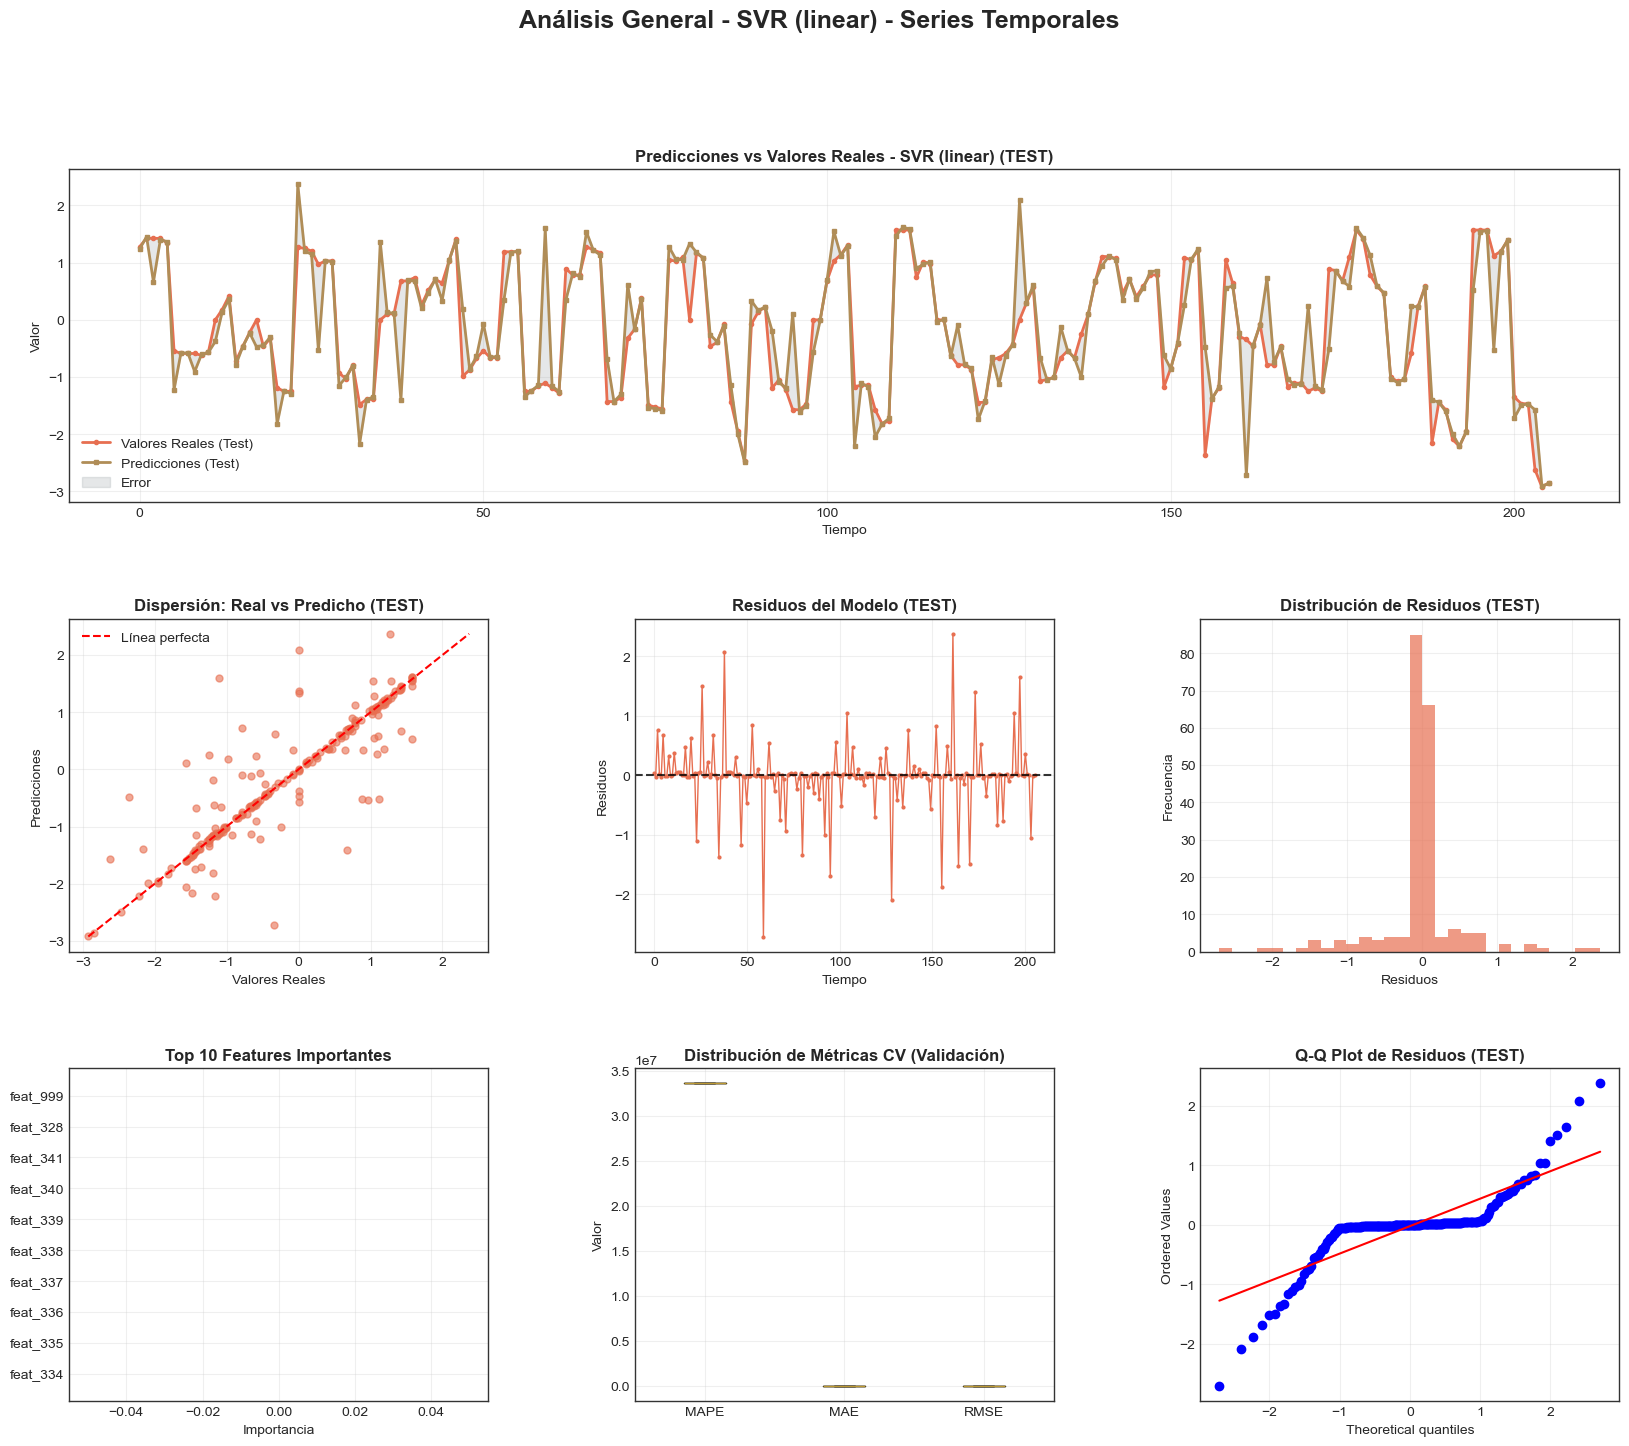

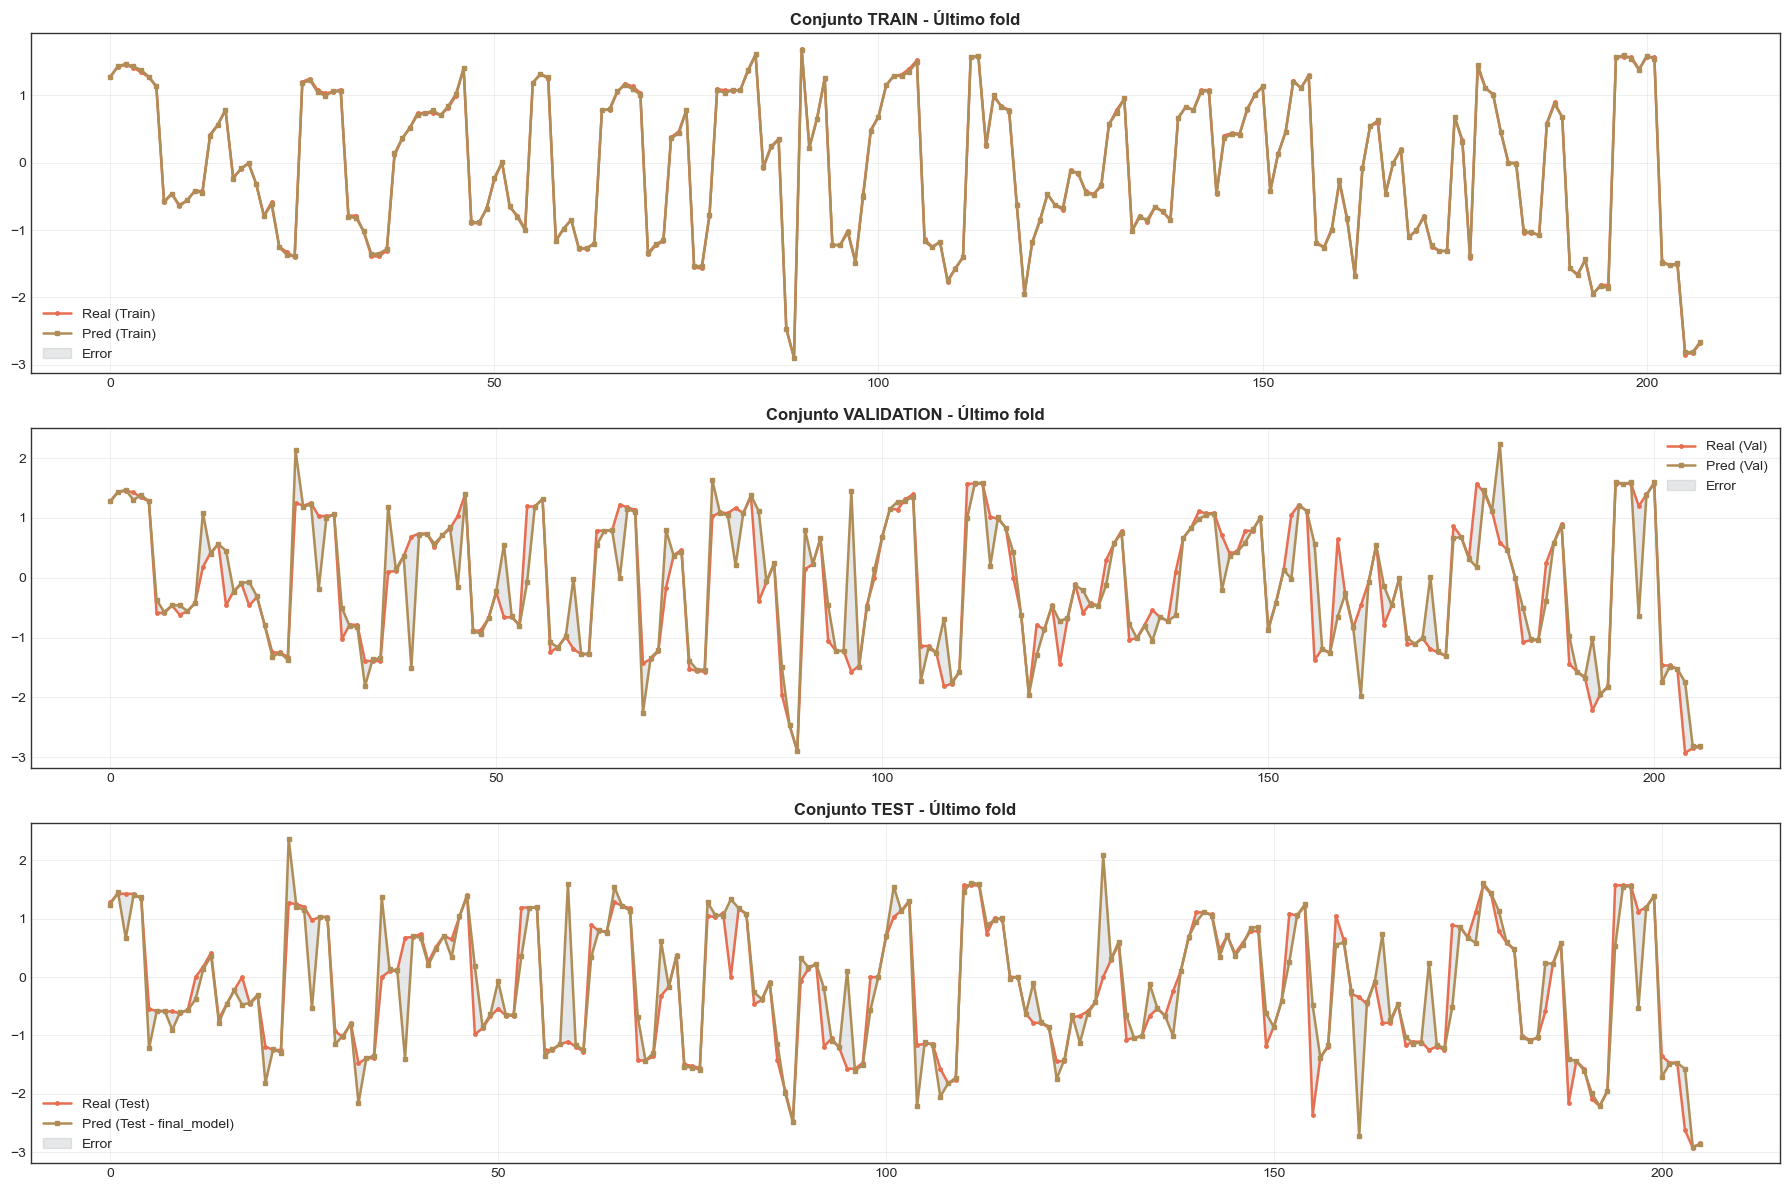

In [64]:
# =======================
# SVR (stand-alone, sin helper) — multi-salida con MultiOutputRegressor
# =======================
import numpy as np
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

# 1) Instancia correcta (NO usar estimator__C en __init__)
svr_tr = MultiOutputRegressor(
    SVR(kernel='linear', C=10.0, epsilon=0.01, gamma='scale')
)
# 2) Entrena en TRAIN y evalúa en VAL
svr_tr.fit(X, y)
y_tr_pred = svr_tr.predict(X)
y_cv_pred = svr_tr.predict(Xcv)

# 3) Reentrena en TRAIN+VAL y evalúa en TEST (nuevo objeto)
svr_tv = MultiOutputRegressor(
    SVR(kernel='linear', C=10.0, epsilon=0.01, gamma='scale')
)
svr_tv.fit(np.vstack([X, Xcv]), np.vstack([y, ycv]))
y_te_pred = svr_tv.predict(Xtest)

# 4) Métricas + BDS (h=0)
print("\n[SVR (RBF)] Métricas")
for tag,(yt,yp) in {"Train":(y,y_tr_pred),"Val":(ycv,y_cv_pred),"Test":(ytest,y_te_pred)}.items():
    line=f"{tag:>5}: MAPE={MAPE(yt,yp):.4f}% | MAE={MAE(yt,yp):.6f} | RMSE={RMSE(yt,yp):.6f}"
    if tag!="Train": line+=f" | sMAPE={sMAPE(yt,yp):.2f}%"
    print(line)

resid_h0 = ytest[:,0] - y_te_pred[:,0]
print("[SVR (RBF)] BDS (residuos TEST, h=t+1):", run_bds(resid_h0, max_dim=6))

# 5) Importancias (SVR RBF no tiene coef_ ⇒ vector de ceros para el panel)
importances = np.zeros(X.shape[1], dtype=float)

# 6) Gráficas estilo compañera
plot_like_partner("SVR (linear)", X, y, Xcv, ycv, Xtest, ytest,
                  y_tr_pred, y_cv_pred, y_te_pred, importances, df)

# Modelo MLP

X.shape: (208, 1000), y.shape: (208, 14)
Modelo configurado para predecir 14 valores

[MLP] Métricas
Train: MAPE=7219044.7557% | MAE=0.862112 | RMSE=1.188377
  Val: MAPE=7681957.0419% | MAE=0.862310 | RMSE=1.238791 | sMAPE=116.85%
 Test: MAPE=8623678.1473% | MAE=0.859353 | RMSE=1.231493 | sMAPE=116.27%
[MLP] BDS (residuos TEST, h=t+1): m=2: p=1.78e-224 | m=3: p=5.33e-206 | m=4: p=6.64e-191 | m=5: p=1.37e-196 | m=6: p=1.96e-210 || Rechazamos H0 — residuos NO independientes.


/var/folders/_p/446c73rj4x19qh7rmqlrf1980000gp/T/ipykernel_92315/1796777802.py:123: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax6.boxplot([[mape_val],[mae_val],[rmse_val]],labels=['MAPE','MAE','RMSE'])
/var/folders/_p/446c73rj4x19qh7rmqlrf1980000gp/T/ipykernel_92315/1796777802.py:130: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(); plt.show()


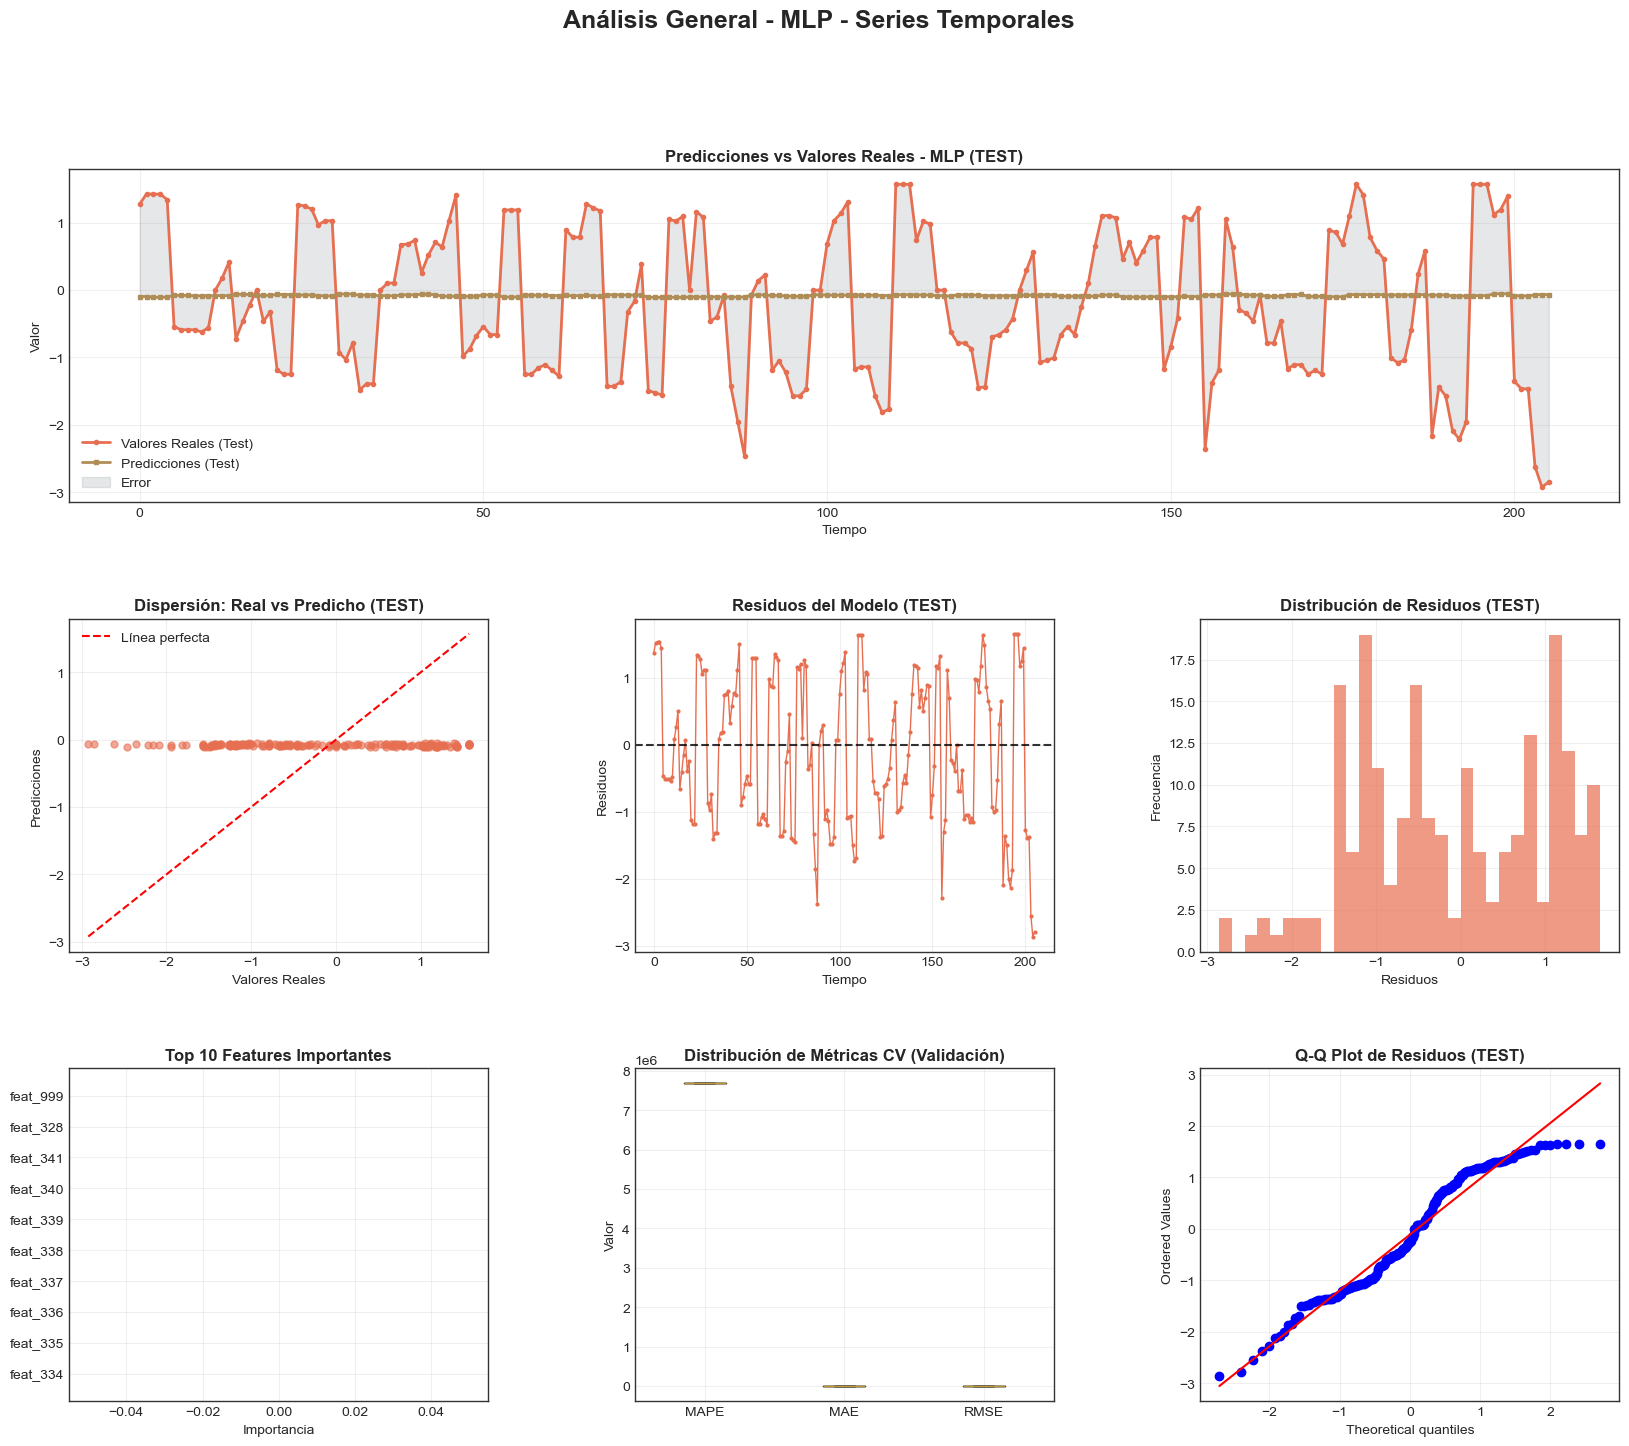

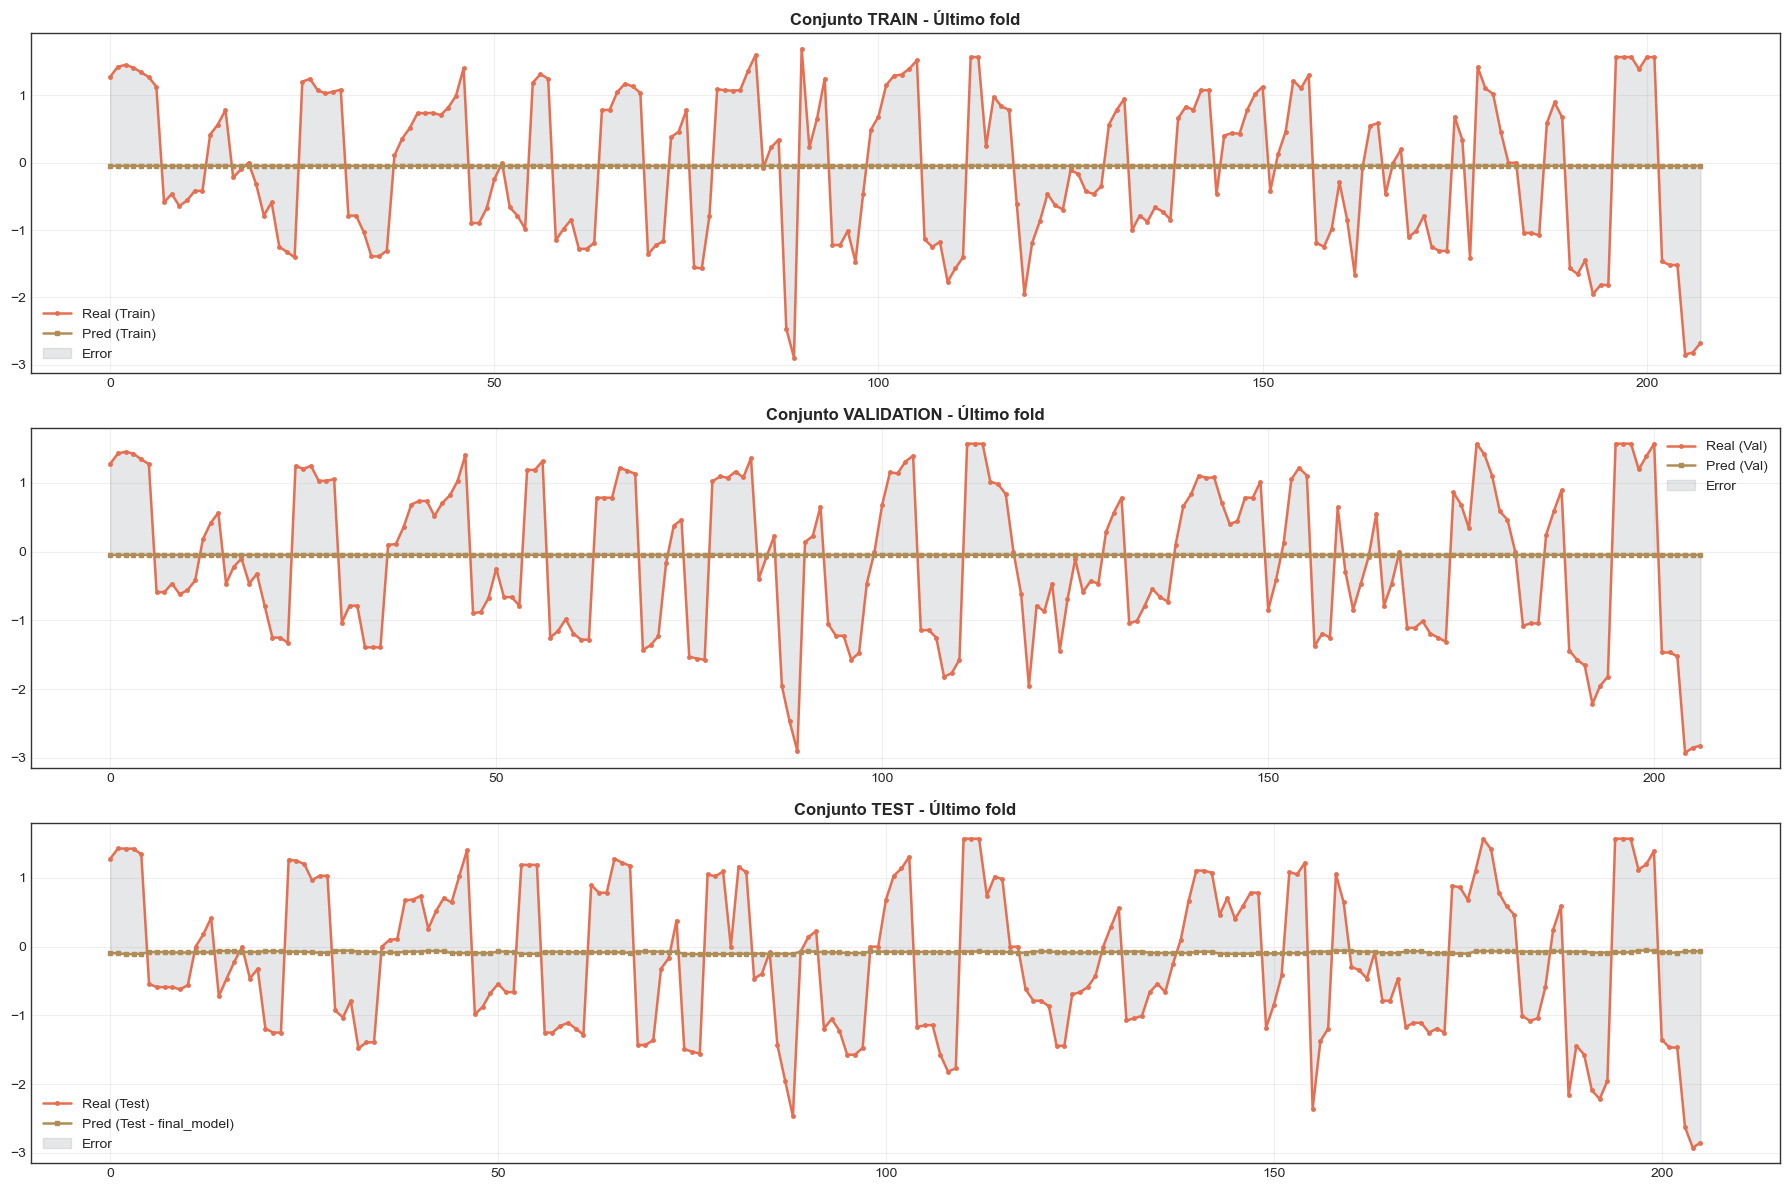

In [68]:
# ===== MLP en PyTorch (multi-salida) =====
import torch, torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

class MLPtorch(nn.Module):
    def __init__(self, lookback, horizon, hidden=[256,256], p_drop=0.2):
        super().__init__()
        layers=[]; in_f=lookback
        for h in hidden:
            layers += [nn.Linear(in_f,h), nn.ReLU(), nn.Dropout(p_drop)]
            in_f=h
        layers += [nn.Linear(in_f, horizon)]
        self.net = nn.Sequential(*layers)
    def forward(self, x):            # x: [B, L]
        return self.net(x)           # -> [B, H]

def train_torch(net, Xtr, ytr, Xva, yva, max_epochs=300, lr=1e-3, patience=25, bs=256):
    opt=torch.optim.Adam(net.parameters(), lr=lr)
    loss_fn=nn.MSELoss()
    tr_ds=TensorDataset(torch.from_numpy(Xtr).float(), torch.from_numpy(ytr).float())
    va_ds=TensorDataset(torch.from_numpy(Xva).float(), torch.from_numpy(yva).float())
    tr_ld=DataLoader(tr_ds,batch_size=bs,shuffle=True); va_ld=DataLoader(va_ds,batch_size=bs,shuffle=False)
    best=float('inf'); best_state=None; wait=0
    for ep in range(1, max_epochs+1):
        net.train()
        for xb,yb in tr_ld:
            xb, yb = xb.to(DEVICE), yb.to(DEVICE)
            opt.zero_grad(); yhat=net(xb); loss=loss_fn(yhat,yb); loss.backward(); opt.step()
        net.eval(); ys=[]; yps=[]
        with torch.no_grad():
            for xb,yb in va_ld:
                xb = xb.to(DEVICE); yp = net(xb).cpu().numpy(); yps.append(yp); ys.append(yb.numpy())
        rmse = RMSE(np.vstack(ys), np.vstack(yps))
        if rmse < best: best=rmse; best_state={k:v.cpu().clone() for k,v in net.state_dict().items()}; wait=0
        else: wait+=1
        if wait>=patience: break
    if best_state: net.load_state_dict(best_state)
    return net, best

def predict_torch(net, Xarr, bs=512):
    ld=DataLoader(TensorDataset(torch.from_numpy(Xarr).float(),
                                torch.from_numpy(np.zeros((len(Xarr),1))).float()),
                  batch_size=bs, shuffle=False)
    net.eval(); out=[]
    with torch.no_grad():
        for xb,_ in ld:
            xb=xb.to(DEVICE); out.append(net(xb).cpu().numpy())
    return np.vstack(out)

# --- entrenar ---
#mlp = MLPtorch(lookback=X.shape[1], horizon=HORIZON, hidden=[512,256], p_drop=0.2).to(DEVICE)

# ============== CORRECCIÓN: Aplanar y para que sea 2D ==============
if y.ndim == 3:
    print(f"Aplanando y de {y.shape} a ({y.shape[0]}, {y.shape[1] * y.shape[2]})")
    y = y.reshape(y.shape[0], -1)
    ycv = ycv.reshape(ycv.shape[0], -1)
    ytest = ytest.reshape(ytest.shape[0], -1)

n_outputs = y.shape[1]  # Debería ser 14 (7 pasos × 2 características)
print(f"X.shape: {X.shape}, y.shape: {y.shape}")
print(f"Modelo configurado para predecir {n_outputs} valores")


mlp = MLPtorch(lookback=X.shape[1], horizon=n_outputs, hidden=[512,256], p_drop=0.2).to(DEVICE)

mlp, best_rmse_val = train_torch(mlp, X, y, Xcv, ycv, max_epochs=500, lr=1e-3, patience=40, bs=256)
y_tr_pred = predict_torch(mlp, X)
y_va_pred = predict_torch(mlp, Xcv)

# Reentrenar Train+Val
mlp_final = MLPtorch(lookback=X.shape[1], horizon=n_outputs, hidden=[512,256], p_drop=0.2).to(DEVICE)
mlp_final, _ = train_torch(mlp_final, np.vstack([X,Xcv]), np.vstack([y,ycv]), Xtest, ytest, max_epochs=400, lr=1e-3, patience=30, bs=256)
y_te_pred = predict_torch(mlp_final, Xtest)

# Métricas + BDS + plots
print(f"\n[MLP] Métricas")
for tag,(yt,yp) in {"Train":(y,y_tr_pred),"Val":(ycv,y_va_pred),"Test":(ytest,y_te_pred)}.items():
    line=f"{tag:>5}: MAPE={MAPE(yt,yp):.4f}% | MAE={MAE(yt,yp):.6f} | RMSE={RMSE(yt,yp):.6f}"
    if tag!="Train": line+=f" | sMAPE={sMAPE(yt,yp):.2f}%"
    print(line)
print("[MLP] BDS (residuos TEST, h=t+1):", run_bds(ytest[:,0]-y_te_pred[:,0]))

plot_like_partner("MLP", X,y,Xcv,ycv,Xtest,ytest, y_tr_pred,y_va_pred,y_te_pred, np.zeros(X.shape[1]), df)

# Modelo de RNN


[RNN] Métricas
Train: MAPE=57602076.0738% | MAE=0.476071 | RMSE=0.758783
  Val: MAPE=60909076.6167% | MAE=0.502106 | RMSE=0.831701 | sMAPE=53.39%
 Test: MAPE=61465484.3764% | MAE=0.456823 | RMSE=0.790216 | sMAPE=49.71%
[RNN] BDS (residuos TEST, h=t+1): m=2: p=9.84e-10 | m=3: p=2.94e-09 | m=4: p=1.13e-08 | m=5: p=6.37e-08 | m=6: p=4.72e-07 || Rechazamos H0 — residuos NO independientes.


/var/folders/_p/446c73rj4x19qh7rmqlrf1980000gp/T/ipykernel_92315/1796777802.py:123: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax6.boxplot([[mape_val],[mae_val],[rmse_val]],labels=['MAPE','MAE','RMSE'])
/var/folders/_p/446c73rj4x19qh7rmqlrf1980000gp/T/ipykernel_92315/1796777802.py:130: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(); plt.show()


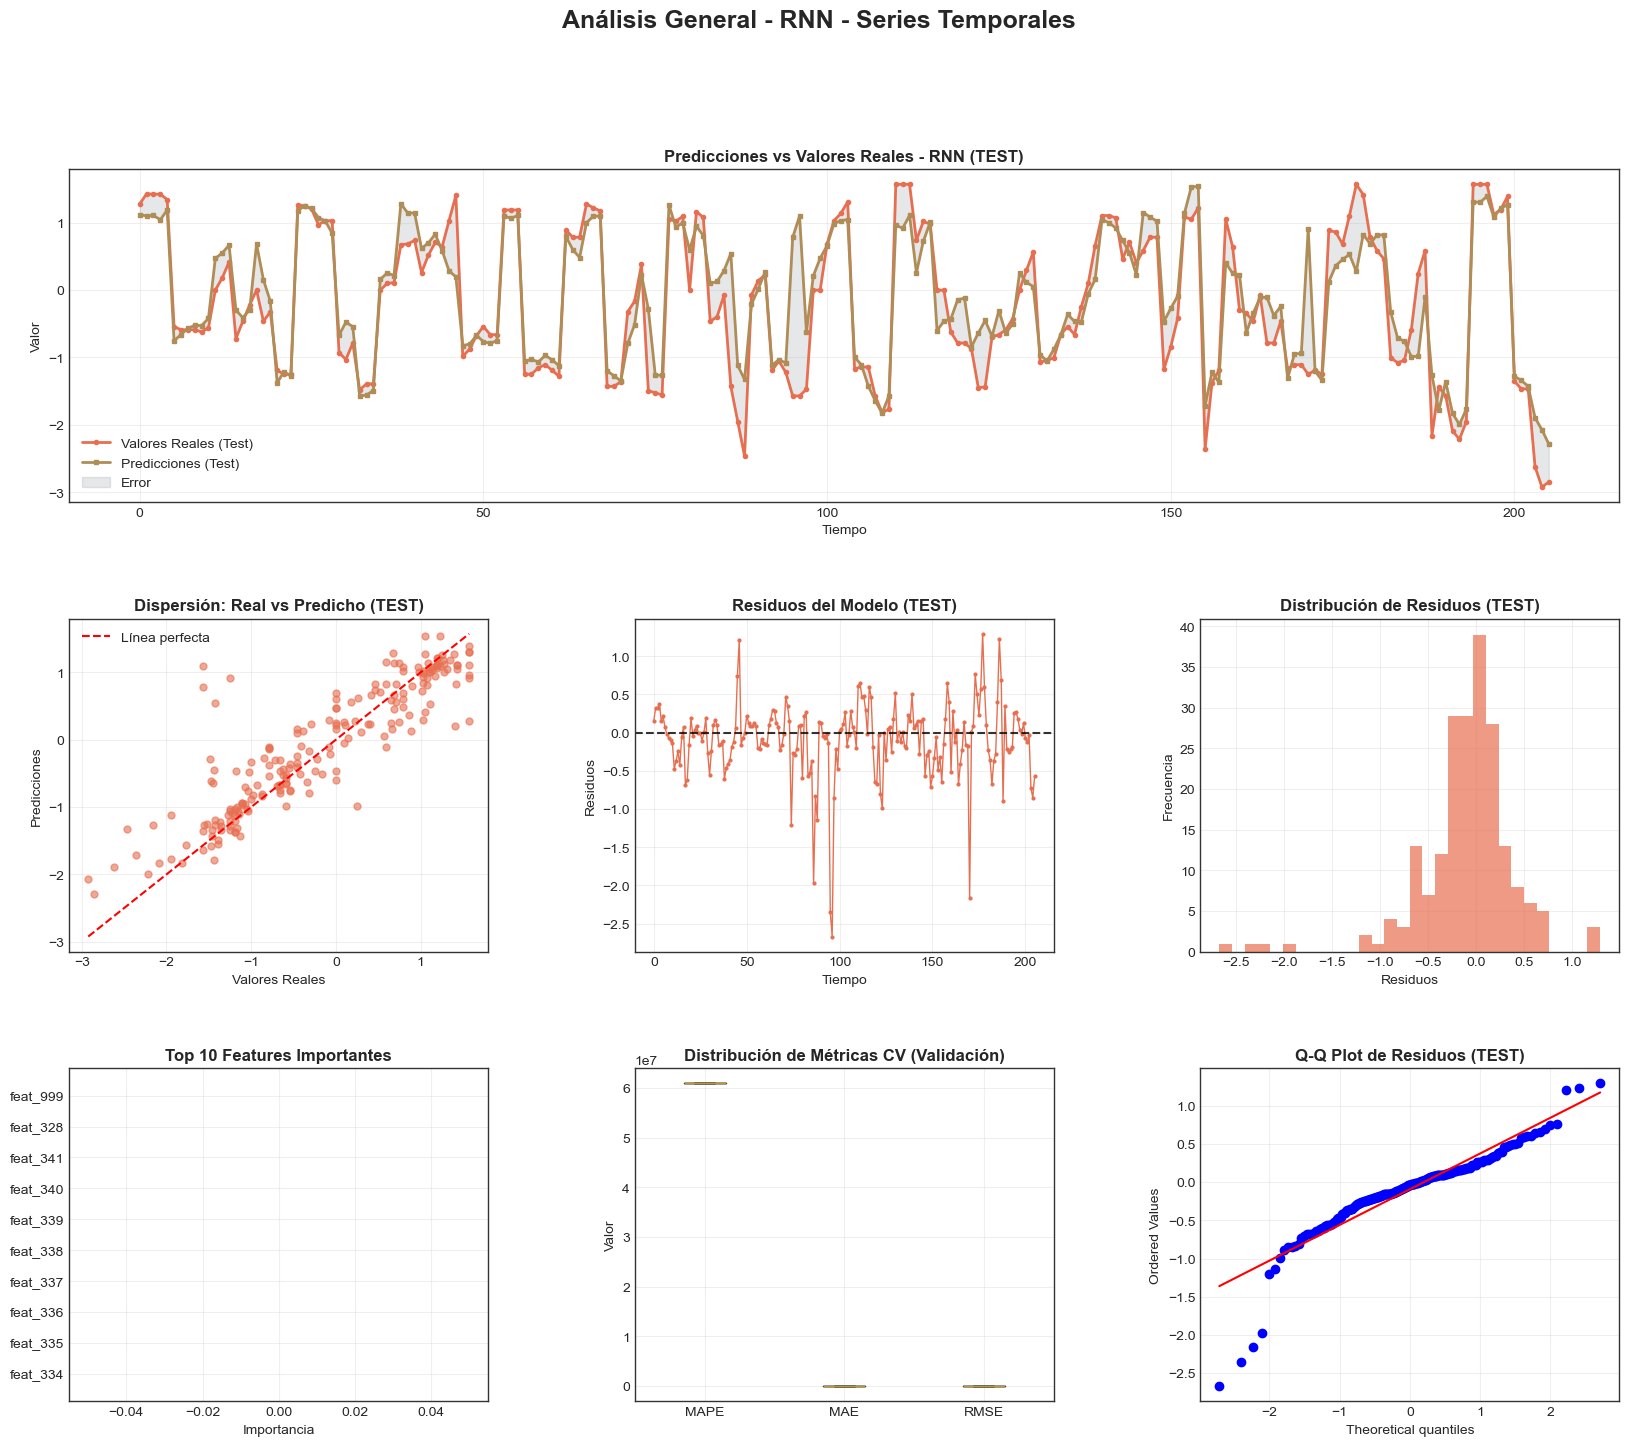

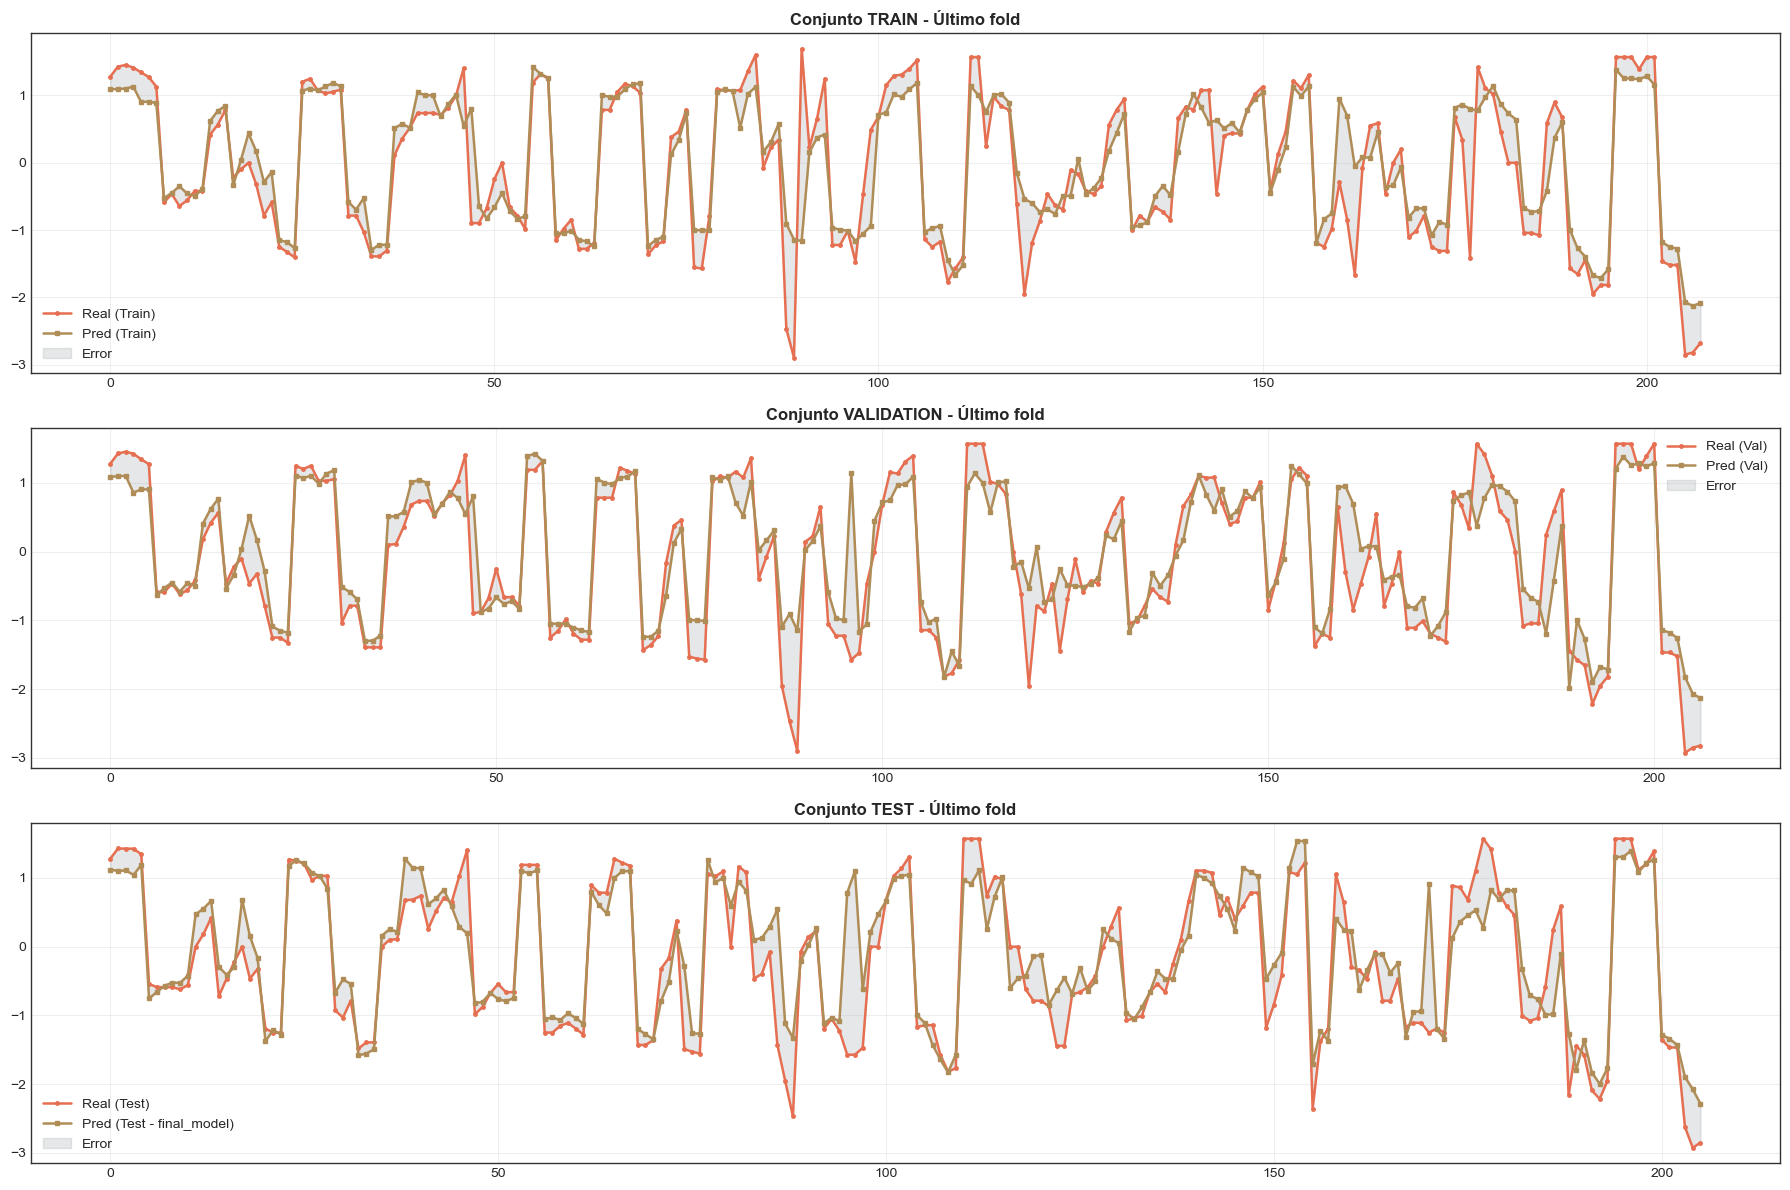

In [78]:
# ===== RNN simple =====
import torch, torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

def to_seq(X):  # [N,L] -> [N,L,1]
    return X.astype('float32').reshape(len(X), -1, 1)

class RNNReg(nn.Module):
    def __init__(self, lookback, horizon, num_features=1, hidden=128, layers=1, p_drop=0.1):
        super().__init__()
        self.rnn = nn.RNN(input_size=1, hidden_size=hidden, num_layers=layers,
                          nonlinearity='tanh', batch_first=True, dropout=0.0 if layers==1 else p_drop)
        self.head = nn.Sequential(nn.Dropout(p_drop), nn.Linear(hidden, horizon * num_features))
        
    def forward(self, x):             # x: [B,L] o [B,L,1]
        if x.dim()==2: x=x.unsqueeze(-1)
        o,_ = self.rnn(x)             # [B,L,H]
        h_last = o[:, -1, :]          # [B,H]
        return self.head(h_last)      # [B,HOR]

def train_rnn(net, Xtr, ytr, Xva, yva, epochs=400, lr=1e-3, patience=40, bs=256):

    # Aplanar y si tiene más de 2 dimensiones
    if ytr.ndim > 2:
        ytr = ytr.reshape(ytr.shape[0], -1)
    if yva.ndim > 2:
        yva = yva.reshape(yva.shape[0], -1)


    tr=TensorDataset(torch.from_numpy(to_seq(Xtr)), torch.from_numpy(ytr).float())
    va=TensorDataset(torch.from_numpy(to_seq(Xva)), torch.from_numpy(yva).float())
    tl=DataLoader(tr,batch_size=bs,shuffle=True); vl=DataLoader(va,batch_size=bs,shuffle=False)
    opt=torch.optim.Adam(net.parameters(), lr=lr); loss_fn=nn.MSELoss()
    best=float('inf'); best_state=None; wait=0
    for ep in range(1,epochs+1):
        net.train()
        for xb,yb in tl:
            xb, yb = xb.to(DEVICE), yb.to(DEVICE)
            opt.zero_grad(); yp = net(xb); loss = loss_fn(yp,yb); loss.backward(); opt.step()
        net.eval(); Ys=[]; YPs=[]
        with torch.no_grad():
            for xb,yb in vl:
                xb=xb.to(DEVICE); YPs.append(net(xb).cpu().numpy()); Ys.append(yb.numpy())
        rmse = RMSE(np.vstack(Ys), np.vstack(YPs))
        if rmse<best: best=rmse; best_state={k:v.cpu().clone() for k,v in net.state_dict().items()}; wait=0
        else: wait+=1
        if wait>=patience: break
    if best_state: net.load_state_dict(best_state)
    return net, best

def predict_rnn(net, Xarr, bs=512):
    ds=TensorDataset(torch.from_numpy(to_seq(Xarr)), torch.zeros(len(Xarr),1))
    ld=DataLoader(ds,batch_size=bs,shuffle=False); net.eval(); out=[]
    with torch.no_grad():
        for xb,_ in ld:
            xb=xb.to(DEVICE); out.append(net(xb).cpu().numpy())
    return np.vstack(out)

rnn = RNNReg(LOOKBACK, HORIZON, num_features=2, hidden=128, layers=2, p_drop=0.2).to(DEVICE)
rnn, _ = train_rnn(rnn, X,y, Xcv,ycv, epochs=500, lr=1e-3, patience=50, bs=256)
y_tr_pred = predict_rnn(rnn, X); y_va_pred = predict_rnn(rnn, Xcv)

rnn_final = RNNReg(LOOKBACK, HORIZON, num_features=2, hidden=128, layers=2, p_drop=0.2).to(DEVICE)
rnn_final, _ = train_rnn(rnn_final, np.vstack([X,Xcv]), np.vstack([y,ycv]), Xtest,ytest,
                         epochs=450, lr=1e-3, patience=40, bs=256)
y_te_pred = predict_rnn(rnn_final, Xtest)

print("\n[RNN] Métricas")
for tag,(yt,yp) in {"Train":(y,y_tr_pred),"Val":(ycv,y_va_pred),"Test":(ytest,y_te_pred)}.items():
    line=f"{tag:>5}: MAPE={MAPE(yt,yp):.4f}% | MAE={MAE(yt,yp):.6f} | RMSE={RMSE(yt,yp):.6f}"
    if tag!="Train": line+=f" | sMAPE={sMAPE(yt,yp):.2f}%"
    print(line)
print("[RNN] BDS (residuos TEST, h=t+1):", run_bds(ytest[:,0]-y_te_pred[:,0]))

plot_like_partner("RNN", X,y,Xcv,ycv,Xtest,ytest, y_tr_pred,y_va_pred,y_te_pred, np.zeros(X.shape[1]), df)

# Modelo de LSTM


[LSTM] Métricas
Train: MAPE=22668965.4429% | MAE=0.214995 | RMSE=0.376890
  Val: MAPE=31433284.9546% | MAE=0.281827 | RMSE=0.539617 | sMAPE=31.54%
 Test: MAPE=35681257.9861% | MAE=0.232375 | RMSE=0.485876 | sMAPE=27.64%
[LSTM] BDS (residuos TEST, h=t+1): m=2: p=0.732 | m=3: p=0.759 | m=4: p=0.374 | m=5: p=0.342 | m=6: p=0.405 || No rechazamos H0 — residuos independientes.


/var/folders/_p/446c73rj4x19qh7rmqlrf1980000gp/T/ipykernel_92315/1796777802.py:123: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax6.boxplot([[mape_val],[mae_val],[rmse_val]],labels=['MAPE','MAE','RMSE'])
/var/folders/_p/446c73rj4x19qh7rmqlrf1980000gp/T/ipykernel_92315/1796777802.py:130: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(); plt.show()


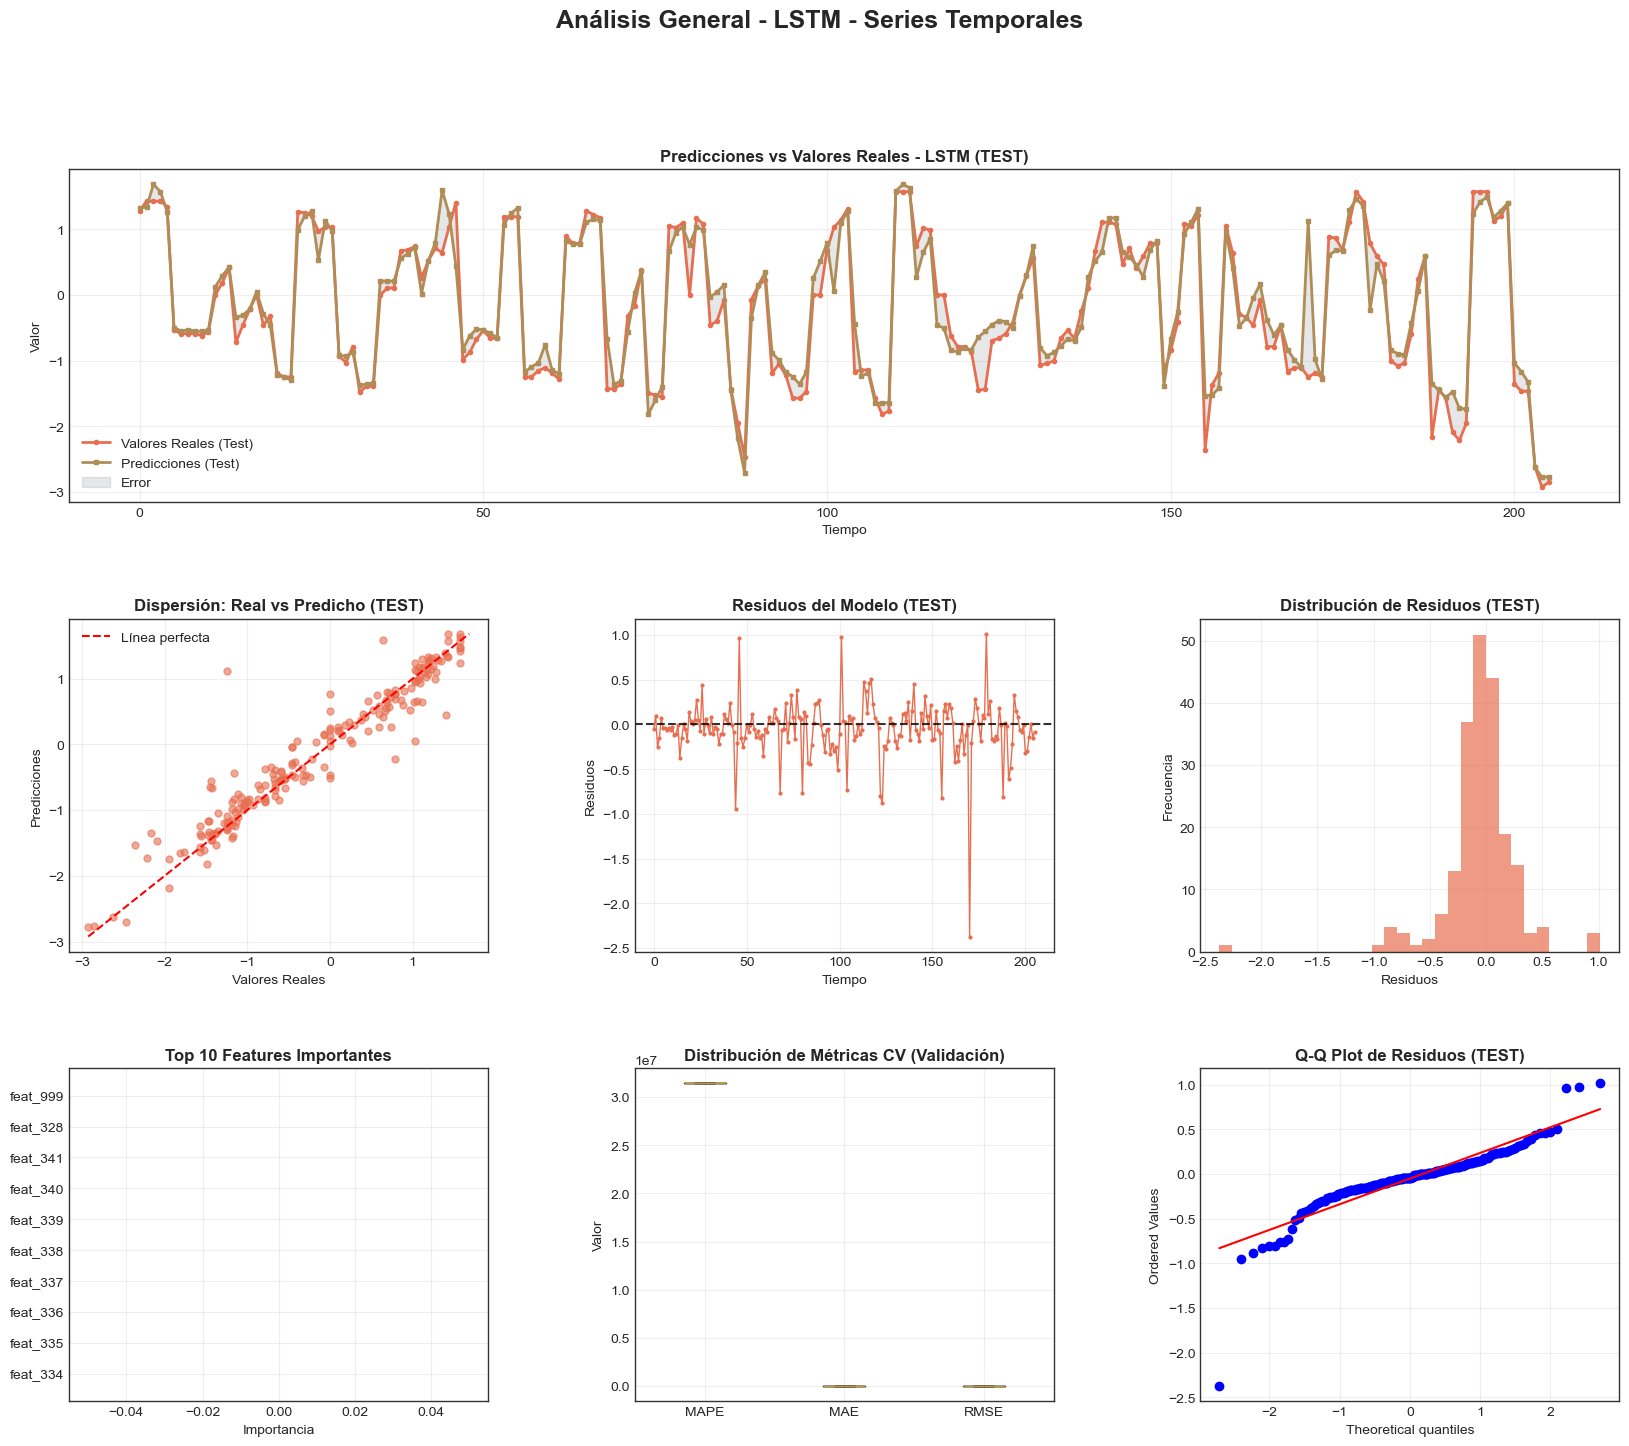

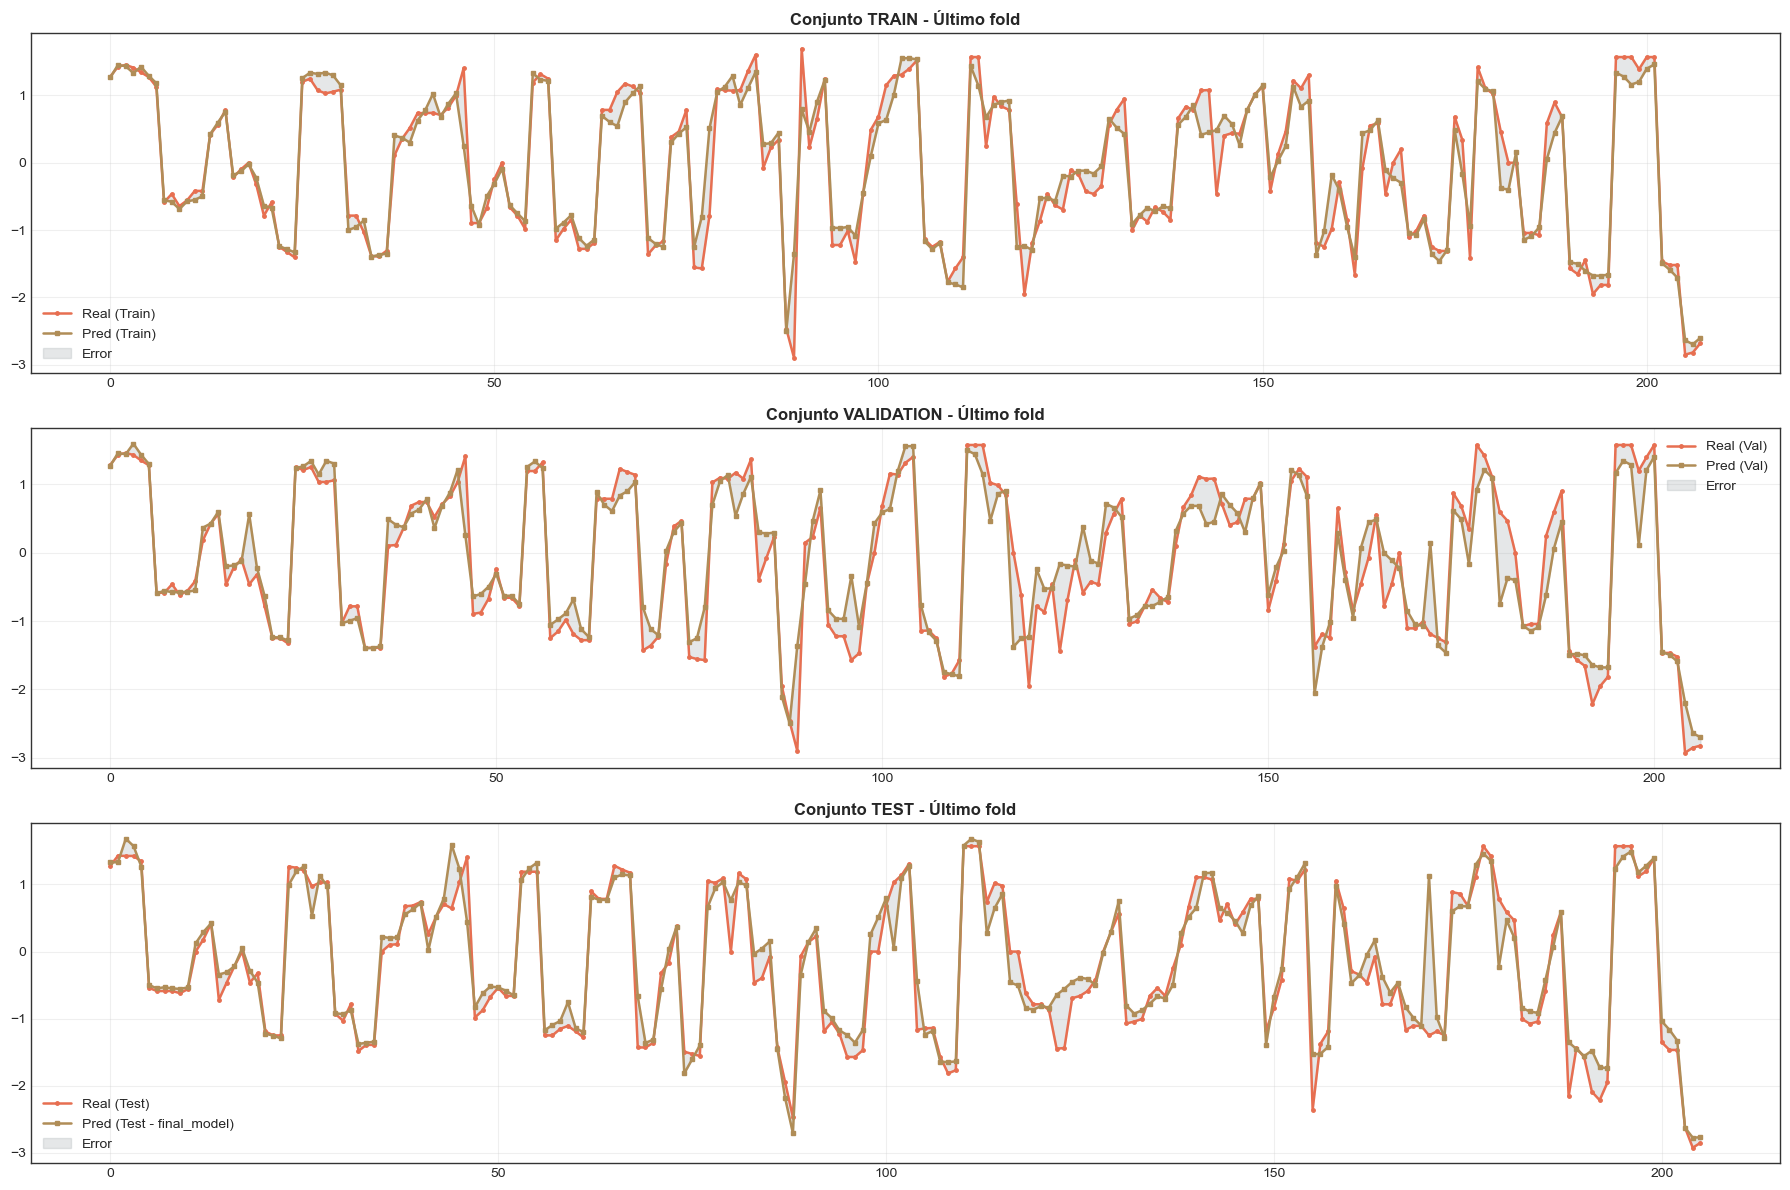

In [81]:
# ===== LSTM =====
import torch, torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

def to_seq(X): return X.astype('float32').reshape(len(X), -1, 1)

class LSTMReg(nn.Module):
    def __init__(self, lookback, horizon, num_features=2, hidden=128, layers=2, p_drop=0.2):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=hidden, num_layers=layers,
                            batch_first=True, dropout=0.0 if layers==1 else p_drop)
        self.head = nn.Sequential(nn.Dropout(p_drop), nn.Linear(hidden, horizon * num_features))
    def forward(self, x):
        if x.dim()==2: x=x.unsqueeze(-1)
        o,_ = self.lstm(x)             # [B,L,H]
        h_last = o[:, -1, :]
        return self.head(h_last)

def train_lstm(net, Xtr, ytr, Xva, yva, epochs=500, lr=1e-3, patience=50, bs=256):
    tr=TensorDataset(torch.from_numpy(to_seq(Xtr)), torch.from_numpy(ytr).float())
    va=TensorDataset(torch.from_numpy(to_seq(Xva)), torch.from_numpy(yva).float())
    tl=DataLoader(tr,batch_size=bs,shuffle=True); vl=DataLoader(va,batch_size=bs,shuffle=False)
    opt=torch.optim.Adam(net.parameters(), lr=lr); loss_fn=nn.MSELoss()
    best=float('inf'); best_state=None; wait=0
    for ep in range(1,epochs+1):
        net.train()
        for xb,yb in tl:
            xb,yb = xb.to(DEVICE), yb.to(DEVICE)
            opt.zero_grad(); yp=net(xb); loss=loss_fn(yp,yb); loss.backward(); opt.step()
        net.eval(); Ys=[]; YPs=[]
        with torch.no_grad():
            for xb,yb in vl:
                xb=xb.to(DEVICE); YPs.append(net(xb).cpu().numpy()); Ys.append(yb.numpy())
        rmse = RMSE(np.vstack(Ys), np.vstack(YPs))
        if rmse<best: best=rmse; best_state={k:v.cpu().clone() for k,v in net.state_dict().items()}; wait=0
        else: wait+=1
        if wait>=patience: break
    if best_state: net.load_state_dict(best_state)
    return net, best

def predict_lstm(net, Xarr, bs=512):
    ds=TensorDataset(torch.from_numpy(to_seq(Xarr)), torch.zeros(len(Xarr),1))
    ld=DataLoader(ds,batch_size=bs,shuffle=False); net.eval(); out=[]
    with torch.no_grad():
        for xb,_ in ld:
            xb=xb.to(DEVICE); out.append(net(xb).cpu().numpy())
    return np.vstack(out)

lstm = LSTMReg(LOOKBACK, HORIZON, num_features=2, hidden=128, layers=2, p_drop=0.2).to(DEVICE)
lstm, _ = train_lstm(lstm, X,y, Xcv,ycv, epochs=600, lr=1e-3, patience=60, bs=256)
y_tr_pred = predict_lstm(lstm, X); y_va_pred = predict_lstm(lstm, Xcv)

lstm_final = LSTMReg(LOOKBACK, HORIZON, num_features=2, hidden=128, layers=2, p_drop=0.2).to(DEVICE)
lstm_final, _ = train_lstm(lstm_final, np.vstack([X,Xcv]), np.vstack([y,ycv]), Xtest,ytest,
                           epochs=550, lr=1e-3, patience=50, bs=256)
y_te_pred = predict_lstm(lstm_final, Xtest)

print("\n[LSTM] Métricas")
for tag,(yt,yp) in {"Train":(y,y_tr_pred),"Val":(ycv,y_va_pred),"Test":(ytest,y_te_pred)}.items():
    line=f"{tag:>5}: MAPE={MAPE(yt,yp):.4f}% | MAE={MAE(yt,yp):.6f} | RMSE={RMSE(yt,yp):.6f}"
    if tag!="Train": line+=f" | sMAPE={sMAPE(yt,yp):.2f}%"
    print(line)
print("[LSTM] BDS (residuos TEST, h=t+1):", run_bds(ytest[:,0]-y_te_pred[:,0]))

plot_like_partner("LSTM", X,y,Xcv,ycv,Xtest,ytest, y_tr_pred,y_va_pred,y_te_pred, np.zeros(X.shape[1]), df)

# Modelo  N-Beast Bayesian

In [199]:
# =========================
# N-BEATS ROBUSTO (UPGRADE)
# =========================
class TrendBasis(nn.Module):
    def __init__(self, lookback, degree=3):
        super().__init__()
        p = degree + 1
        t = torch.linspace(-1, 1, lookback)
        Phi = torch.stack([t**i for i in range(p)], dim=0)  # [p, L]
        self.register_buffer("Phi", Phi)
        self.p = p
    def forward(self, theta):  # [B,p] @ [p,L] -> [B,L]
        return theta @ self.Phi

class SeasonBasis(nn.Module):
    def __init__(self, lookback, K=4):
        super().__init__()
        t = torch.linspace(0, 2*torch.pi, lookback)
        sines  = [torch.sin(k*t) for k in range(1, K+1)]
        cosines= [torch.cos(k*t) for k in range(1, K+1)]
        Phi = torch.stack(sines + cosines, dim=0)           # [2K, L]
        self.register_buffer("Phi", Phi)
        self.k2 = 2*K
    def forward(self, theta):
        return theta @ self.Phi

class InterpretableBlock(nn.Module):
    def __init__(self, lookback, horizon, num_outputs=2, hidden=1200, depth=7, basis="trend", p_drop=0.2):
        super().__init__()
        layers=[]
        for i in range(depth):
            layers += [nn.Linear(lookback if i==0 else hidden, hidden), nn.ReLU(), nn.Dropout(p=p_drop)]
        self.mlp = nn.Sequential(*layers)

        if basis == "trend":
            self.back_basis = TrendBasis(lookback, degree=3); theta_b = self.back_basis.p
        else:
            self.back_basis = SeasonBasis(lookback, K=4);     theta_b = self.back_basis.k2

        self.theta_b = nn.Linear(hidden, theta_b)
        self.theta_f = nn.Linear(hidden, horizon * num_outputs)
        self.lookback, self.horizon, self.num_outputs = lookback, horizon, num_outputs

    def forward(self, x):
        if not torch.is_tensor(x):
            x = torch.as_tensor(x, dtype=torch.float32, device=next(self.parameters()).device)
        if x.dim()==1: x = x.unsqueeze(0)
        assert x.dim()==2 and x.shape[1]==self.lookback, f"x {x.shape}"
        h = self.mlp(x)
        backcast = self.back_basis(self.theta_b(h))
        forecast = self.theta_f(h)
        forecast = forecast.view(-1, self.horizon, self.num_outputs)
        return backcast, forecast

class NBeatsInterpretable(nn.Module):
    def __init__(self, lookback, horizon, num_outputs=2, n_pairs=5, hidden=1200, depth=7, p_drop=0.2):
        super().__init__()
        self.blocks = nn.ModuleList()
        for _ in range(n_pairs):
            self.blocks.append(InterpretableBlock(lookback, horizon, num_outputs, hidden, depth, "trend",  p_drop))
            self.blocks.append(InterpretableBlock(lookback, horizon, num_outputs, hidden, depth, "season", p_drop))
        self.horizon, self.lookback, self.num_outputs = horizon, lookback, num_outputs

    def forward(self, x):
        if not torch.is_tensor(x):
            x = torch.as_tensor(x, dtype=torch.float32, device=next(self.parameters()).device)
        if x.dim()==1: x = x.unsqueeze(0)
        residual = x
        forecast_total = torch.zeros(x.size(0), self.horizon, self.num_outputs, device=x.device)
        for blk in self.blocks:
            b, f = blk(residual)
            residual       = residual - b
            forecast_total = forecast_total + f
        return forecast_total

In [200]:
def train_fit(model, train_loader, val_loader, max_epochs=250, lr=1e-3, patience=15,
              weight_decay=1e-4, clip_grad=1.0, loss_type="mse", horizon_weights=None):
    opt = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    base_loss = nn.MSELoss() if loss_type=="mse" else nn.SmoothL1Loss(beta=0.01)

    # >>> CAMBIA ESTA LÍNEA: quita 'verbose'
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        opt, mode='min', factor=0.5, patience=5, threshold=1e-4,
        threshold_mode='rel', cooldown=0, min_lr=1e-6, eps=1e-8
        # verbose= False   # <--- ELIMINADO
    )

    best_state, best_rmse, wait = None, np.inf, 0
    get_lr = lambda: opt.param_groups[0]['lr']
    prev_lr = get_lr()

    for epoch in tqdm(range(1, max_epochs+1), desc="Entrenando N-BEATS (RMSE Val)", unit="epoch"):
        model.train()
        for xb, yb in train_loader:
            xb, yb = xb.to(DEVICE), yb.to(DEVICE)
            pred = model(xb)

            if horizon_weights is None:
                loss = base_loss(pred, yb)
            else:
                w = torch.as_tensor(horizon_weights, device=pred.device).view(1, -1)
                if loss_type == "mse":
                    loss = ((w * (pred - yb)**2).mean())
                else:
                    loss = (w * torch.abs(pred - yb)).mean()

            opt.zero_grad(); loss.backward()
            if clip_grad is not None:
                torch.nn.utils.clip_grad_norm_(model.parameters(), clip_grad)
            opt.step()

        # --- Validación
        model.eval(); Yt, Yp = [], []
        with torch.no_grad():
            for xb, yb in val_loader:
                yp = model(xb.to(DEVICE)).cpu().numpy()
                Yp.append(yp); Yt.append(yb.numpy())
        rmse_val = RMSE(np.vstack(Yt), np.vstack(Yp))

        scheduler.step(rmse_val)

        # (Opcional) Mensaje cuando baje el LR
        cur_lr = get_lr()
        if cur_lr < prev_lr:
            try:
                from tqdm import tqdm as _tqdm
                _tqdm.write(f"[scheduler] LR: {prev_lr:.2e} -> {cur_lr:.2e}")
            except Exception:
                print(f"[scheduler] LR: {prev_lr:.2e} -> {cur_lr:.2e}")
            prev_lr = cur_lr

        if rmse_val < best_rmse:
            best_rmse, wait = rmse_val, 0
            best_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}
        else:
            wait += 1
        if wait >= patience:
            break

    if best_state is not None:
        model.load_state_dict(best_state)
    return model, best_rmse

In [201]:
def retrain_on_trainval(model_cls, Xtr, ytr, Xval, yval,
                        lr=1e-3, epochs=150,
                        weight_decay=2e-4,           # ↑ regularización leve
                        loss_type="huber",           # "mse" o "huber"
                        horizon_weights=None,        # e.g. np.array([3,2,1,1,1,1,1], np.float32)
                        clip_grad=1.0,
                        bs=256,
                        from_state_dict=None,        # <- pasa nbeats.state_dict() si quieres warm-start
                        **kwargs):
    model = model_cls(**kwargs).to(DEVICE)
    if from_state_dict is not None:
        model.load_state_dict(from_state_dict, strict=True)

    opt = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    base_loss = nn.MSELoss() if loss_type == "mse" else nn.SmoothL1Loss(beta=0.01)

    # scheduler suave (no necesita 'verbose')
    sched = torch.optim.lr_scheduler.CosineAnnealingLR(
        opt, T_max=max(epochs, 50), eta_min=max(lr/50, 1e-6)
    )

    Xf = np.vstack([Xtr, Xval]); Yf = np.vstack([ytr, yval])
    loader = make_loader(Xf, Yf, bs=bs, shuffle=True)

    for _ in tqdm(range(epochs), desc="Reentrenando en Train+Val", unit="epoch"):
        model.train()
        for xb, yb in loader:
            xb, yb = xb.to(DEVICE), yb.to(DEVICE)
            yp = model(xb)

            if horizon_weights is None:
                loss = base_loss(yp, yb)
            else:
                w = torch.as_tensor(horizon_weights, device=yp.device).view(1, -1)  # [1,H]
                if loss_type == "mse":
                    loss = ((w * (yp - yb)**2).mean())
                else:  # Huber aprox ponderada
                    loss = (w * torch.abs(yp - yb)).mean()

            opt.zero_grad(); loss.backward()
            if clip_grad is not None:
                torch.nn.utils.clip_grad_norm_(model.parameters(), clip_grad)
            opt.step()
        sched.step()
    return model


def mc_predict(model, loader, T=200):
    # Dropout activo en inferencia → distribución predictiva
    model.train()
    preds=[]
    with torch.no_grad():
        for _ in tqdm(range(T), desc="MC-Dropout sampling", unit="mc"):
            batch=[]
            for xb, _ in loader:
                xb = xb.to(DEVICE)
                yp = model(xb).cpu().numpy()
                batch.append(yp)
            preds.append(np.vstack(batch))
    P = np.stack(preds, axis=0)      # [T, N, H]
    mean = P.mean(axis=0)
    lo   = np.percentile(P, 5, axis=0)
    hi   = np.percentile(P,95, axis=0)
    return mean, lo, hi

In [202]:
def mc_predict(model, loader, T=800):
    model.train()  # Dropout activo
    preds=[]
    with torch.no_grad():
        for _ in tqdm(range(T), desc="MC-Dropout sampling", unit="mc"):
            batch=[]
            for xb, _ in loader:
                xb = xb.to(DEVICE)
                yp = model(xb).cpu().numpy()
                batch.append(yp)
            preds.append(np.vstack(batch))
    P = np.stack(preds, axis=0)  # [T, N, H]
    return P.mean(axis=0), np.percentile(P, 5, axis=0), np.percentile(P, 95, axis=0)

# --- 1) Entrenamos y seleccionamos por RMSE(Val) ---
nbeats = NBeatsInterpretable(X.shape[1], HORIZON, num_outputs=2,
                             n_pairs=5, hidden=1200, depth=7, p_drop=0.2).to(DEVICE)
nbeats, best_rmse_val = train_fit(nbeats, train_loader, val_loader,
                                  max_epochs=600, lr=1e-3, patience=25)
print(f"Mejor RMSE(Val): {best_rmse_val:.5f}")

# --- 2) Conformal calibration en Validación ---
val_mean, _, _ = mc_predict(nbeats, val_loader, T=400)


# Extraer Yval
Yval = []
for xb, yb in val_loader:
    Yval.append(yb.numpy())
Yval = np.vstack(Yval)  # (207, 7, 2)

# APLANAR ambos para que coincidan
Yval_flat = Yval.reshape(Yval.shape[0], -1)  # (207, 7, 2) -> (207, 14)
val_mean_flat = val_mean.reshape(val_mean.shape[0], -1)  # (207, 7, 2) -> (207, 14)

abs_err_val = np.abs(Yval_flat - val_mean_flat)
q95_val = np.quantile(abs_err_val, 0.95, axis=0)  # ancho por horizonte

# --- 3) Reentrenamos con Train+Val ---
# Si y está aplanado (forma 2D), necesitamos reshapearlo para N-Beats
if y.ndim == 2 and y.shape[1] == HORIZON * 2:  # y.shape[1] = 14 (7*2)
    print(f"Corrigiendo dimensiones de y de {y.shape} a ({y.shape[0]}, {HORIZON}, 2)")
    y = y.reshape(y.shape[0], HORIZON, 2)
    ycv = ycv.reshape(ycv.shape[0], HORIZON, 2)
    ytest = ytest.reshape(ytest.shape[0], HORIZON, 2)
    print(f"Nuevas dimensiones - y: {y.shape}, ycv: {ycv.shape}")


nb_final = retrain_on_trainval(NBeatsInterpretable, X, y, Xcv, ycv,
                               lr=1e-3, epochs=300,
                               lookback=X.shape[1], horizon=HORIZON, num_outputs=2,
                               n_pairs=5, hidden=1200, depth=7, p_drop=0.2)

# --- 4) MC en Test + aplicar calibración ---
mean_te, lo_te_mc, hi_te_mc = mc_predict(nb_final, test_loader, T=800)

# Necesitamos reshape q95_val a (7, 2) para que coincida
q95_val_reshaped = q95_val.reshape(HORIZON, 2)  # (14,) -> (7, 2)

lo_te_cal = mean_te - q95_val_reshaped
hi_te_cal = mean_te + q95_val_reshaped

# CORRECCIÓN: Extraer Ytest con la forma correcta (3D) en lugar de aplanada (2D)
Ytest = []
for xb, yb in test_loader:
    Ytest.append(yb.numpy())
Ytest = np.vstack(Ytest)  # Esto dará forma (206, 7, 2) en lugar de (1442, 2)

rmse_te   = RMSE(Ytest, mean_te)
mae_te    = MAE(Ytest, mean_te)
smape_te  = sMAPE(Ytest, mean_te)
cov90_mc  = float(np.mean((Ytest >= lo_te_mc) & (Ytest <= hi_te_mc)))
cov90_cal = float(np.mean((Ytest >= lo_te_cal) & (Ytest <= hi_te_cal)))

print(f"[TEST] RMSE={rmse_te:.5f} | MAE={mae_te:.5f} | sMAPE={smape_te:.2f}%")
print(f"Coverage@90 (MC crudo)={cov90_mc:.3f} | Coverage@90 (Conformal)={cov90_cal:.3f}")

Entrenando N-BEATS (RMSE Val):   4%|▎         | 22/600 [00:36<07:31,  1.28epoch/s]

[scheduler] LR: 1.00e-03 -> 5.00e-04


Entrenando N-BEATS (RMSE Val):   5%|▍         | 28/600 [00:40<06:07,  1.55epoch/s]

[scheduler] LR: 5.00e-04 -> 2.50e-04


Entrenando N-BEATS (RMSE Val):   6%|▌         | 34/600 [00:44<07:06,  1.33epoch/s]

[scheduler] LR: 2.50e-04 -> 1.25e-04


Entrenando N-BEATS (RMSE Val):   7%|▋         | 40/600 [00:50<12:35,  1.35s/epoch]

[scheduler] LR: 1.25e-04 -> 6.25e-05


Entrenando N-BEATS (RMSE Val):   7%|▋         | 40/600 [00:52<12:09,  1.30s/epoch]


Mejor RMSE(Val): 1.22419


MC-Dropout sampling: 100%|██████████| 400/400 [01:00<00:00,  6.59mc/s]


Corrigiendo dimensiones de y de (208, 14) a (208, 7, 2)
Nuevas dimensiones - y: (208, 7, 2), ycv: (207, 7, 2)


MC-Dropout sampling: 100%|██████████| 800/800 [01:54<00:00,  6.97mc/s]


[TEST] RMSE=1.19763 | MAE=0.74668 | sMAPE=78.78%
Coverage@90 (MC crudo)=0.271 | Coverage@90 (Conformal)=0.914


In [203]:
# ===== Helpers MÉTRICAS + PLOTS (estilo compañera) =====
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from scipy import stats

# Estilo igual al de los otros modelos
plt.style.use('seaborn-v0_8-whitegrid'); sns.set_palette("husl")
plt.rcParams.update({"axes.edgecolor":"#333","axes.titleweight":"bold","axes.grid":True,"grid.alpha":0.3,"legend.frameon":False})
COL_REAL, COL_PRED, COL_ERR = "#e76f51", "#b08d57", "#9aa0a6"
H_GRAPH = 0  # horizonte a graficar (0=t+1)

# Métricas (reusa tus RMSE/MAE/sMAPE si ya existen)
def MAPE(y_true,y_pred,eps=1e-8):
    yt=np.asarray(y_true).ravel().astype(float)
    yp=np.asarray(y_pred).ravel().astype(float)
    return 100*np.mean(np.abs(yt-yp)/np.maximum(np.abs(yt),eps))

def last_block_dates(df_full, n, offset=0):
    if isinstance(df_full, pd.DataFrame) and 'ds' in df_full.columns:
        idx=pd.to_datetime(df_full['ds']); end=len(idx)-offset; start=max(0,end-n)
        return idx.iloc[start:end]
    return pd.RangeIndex(n)

# BDS (si tienes statsmodels)
try:
    from statsmodels.tsa.stattools import bds
    HAS_BDS=True
except Exception:
    HAS_BDS=False
def run_bds(residuals_1d, max_dim=6):
    if not HAS_BDS: return "BDS no disponible."
    r=np.asarray(residuals_1d,dtype=float).ravel()
    stats_b,pvals=bds(r,max_dim=max_dim)
    dims=np.arange(2,2+len(np.ravel(stats_b)))
    lines=[f"m={int(m)}: p={float(p):.3g}" for m,p in zip(dims,np.ravel(pvals))]
    concl=("Rechazamos H0 — residuos NO independientes."
           if (np.ravel(pvals)<0.05).any() else
           "No rechazamos H0 — residuos independientes.")
    return " | ".join(lines)+" || "+concl

# Helper: predicciones puntuales con un modelo dado y un loader
def preds_point(model, loader, device):
    model.eval()
    Y_true, Y_pred = [], []
    with torch.no_grad():
        for xb, yb in loader:
            yp = model(xb.to(device)).cpu().numpy()
            Y_pred.append(yp); Y_true.append(yb.numpy())
    return np.vstack(Y_true), np.vstack(Y_pred)

# === Plot general 3×3 + por conjunto (con banda 90% en TEST si se provee) ===
def plot_like_partner_nbeats(model_name,
                             y_tr, y_tr_pred, y_va, y_va_pred,
                             y_te, y_te_pred_mean,
                             df, lookback,
                             lo_band=None, hi_band=None):
    # Fechas por bloque
    Nte, Nva, Ntr = len(y_te), len(y_va), len(y_tr)
    test_dates  = last_block_dates(df, Nte, offset=0)
    val_dates   = last_block_dates(df, Nva, offset=Nte)
    train_dates = last_block_dates(df, Ntr, offset=Nte+Nva)

    # Residuos TEST (h=0)
    resid_h0 = y_te[:,0,0] - y_te_pred_mean[:,0,0]

    # ===== Figura general =====
    fig=plt.figure(figsize=(20,16)); gs=fig.add_gridspec(3,3,hspace=0.35,wspace=0.35)

    # (1) Pred vs Real TEST
    ax1=fig.add_subplot(gs[0,:])
    ax1.plot(test_dates, y_te[:,H_GRAPH], 'o-', color=COL_REAL, lw=2, ms=3, label='Valores Reales (Test)')
    ax1.plot(test_dates, y_te_pred_mean[:,H_GRAPH], 's-', color=COL_PRED, lw=2, ms=3, label='Predicciones (Test)')
    ax1.fill_between(test_dates, y_te[:,H_GRAPH,0], y_te_pred_mean[:,H_GRAPH,0], color=COL_ERR, alpha=0.25, label='Error')
    # banda 90%
    if lo_band is not None and hi_band is not None:
        ax1.fill_between(test_dates, lo_band[:,H_GRAPH,0], hi_band[:,H_GRAPH,0], color='gray', alpha=0.18, label='Banda 90%')
    ax1.set_title(f'Predicciones vs Valores Reales - {model_name} (TEST)')
    ax1.set_xlabel('Tiempo'); ax1.set_ylabel('Valor'); ax1.legend()

    # (2) Dispersión TEST
    ax2=fig.add_subplot(gs[1,0])
    ax2.scatter(y_te[:,H_GRAPH], y_te_pred_mean[:,H_GRAPH], alpha=0.6, s=25, color=COL_REAL)
    miv=min(y_te[:,H_GRAPH].min(), y_te_pred_mean[:,H_GRAPH].min())
    mav=max(y_te[:,H_GRAPH].max(), y_te_pred_mean[:,H_GRAPH].max())
    ax2.plot([miv,mav],[miv,mav],'r--',lw=1.5,label='Línea perfecta')
    ax2.set_title('Dispersión: Real vs Predicho (TEST)')
    ax2.set_xlabel('Valores Reales'); ax2.set_ylabel('Predicciones'); ax2.legend()

    # (3) Residuos TEST en el tiempo
    ax3=fig.add_subplot(gs[1,1])
    ax3.plot(test_dates, resid_h0, 'o-', color=COL_REAL, lw=1, ms=2)
    ax3.axhline(0,color='k',ls='--',alpha=0.8)
    ax3.set_title('Residuos del Modelo (TEST)'); ax3.set_xlabel('Tiempo'); ax3.set_ylabel('Residuos')

    # (4) Histograma residuos
    ax4=fig.add_subplot(gs[1,2])
    ax4.hist(resid_h0, bins=30, alpha=0.7, ec='black', color=COL_REAL)
    ax4.set_title('Distribución de Residuos (TEST)'); ax4.set_xlabel('Residuos'); ax4.set_ylabel('Frecuencia')

    # (5) “Importancias”: N-BEATS no tiene -> vector cero (placeholder)
    ax5=fig.add_subplot(gs[2,0])
    n_feats = y_tr.shape[1] * 0 + LOOKBACK  # placeholder
    feat_names=[f"feat_{i}" for i in range(LOOKBACK)]
    zeros = np.zeros(LOOKBACK)
    top_idx=np.argsort(zeros)[-10:]
    fi=pd.DataFrame({"feature":np.array(feat_names)[top_idx],"importance":zeros[top_idx]}).sort_values("importance")
    ax5.barh(range(len(fi)), fi["importance"], color=COL_PRED)
    ax5.set_yticks(range(len(fi))); ax5.set_yticklabels(fi["feature"])
    ax5.set_xlabel("Importancia"); ax5.set_title("Top 10 Features Importantes"); ax5.grid(True,axis="x",alpha=0.3)

    # (6) Caja de métricas Val (single-point como el resto)
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    def _RMSE(a,b): return float(np.sqrt(mean_squared_error(np.ravel(a), np.ravel(b))))
    def _MAE(a,b):  return float(mean_absolute_error(np.ravel(a), np.ravel(b)))
    def _MAPE(a,b,eps=1e-8):
        a=np.ravel(a).astype(float); b=np.ravel(b).astype(float)
        return 100*np.mean(np.abs(a-b)/np.maximum(np.abs(a),eps))
    ax6=fig.add_subplot(gs[2,1])
    mape_val=_MAPE(y_va, y_va_pred); mae_val=_MAE(y_va, y_va_pred); rmse_val=_RMSE(y_va, y_va_pred)
    ax6.boxplot([[mape_val],[mae_val],[rmse_val]], labels=['MAPE','MAE','RMSE'])
    ax6.set_title('Distribución de Métricas CV (Validación)'); ax6.set_ylabel('Valor')

    # (7) Q-Q plot residuos TEST
    ax7=fig.add_subplot(gs[2,2]); stats.probplot(resid_h0, dist="norm", plot=ax7); ax7.set_title('Q-Q Plot de Residuos (TEST)')

    plt.suptitle(f'Análisis General - {model_name} - Series Temporales', fontsize=18, fontweight='bold')
    plt.tight_layout(); plt.show()

    # ===== Figura por conjunto (TRAIN / VAL / TEST) =====
    fig2,axs=plt.subplots(3,1,figsize=(18,12),sharex=False)
    axs[0].plot(train_dates, y_tr[:,H_GRAPH], 'o-', color=COL_REAL, ms=2.5, lw=1.8, label='Real (Train)')
    axs[0].plot(train_dates, y_tr_pred[:,H_GRAPH], 's-', color=COL_PRED, ms=2.5, lw=1.8, label='Pred (Train)')
    axs[0].fill_between(train_dates, y_tr[:,H_GRAPH, 0], y_tr_pred[:,H_GRAPH, 0], color=COL_ERR, alpha=0.25, label='Error')
    axs[0].set_title('Conjunto TRAIN - Último fold'); axs[0].legend()

    axs[1].plot(val_dates, y_va[:,H_GRAPH], 'o-', color=COL_REAL, ms=2.5, lw=1.8, label='Real (Val)')
    axs[1].plot(val_dates, y_va_pred[:,H_GRAPH], 's-', color=COL_PRED, ms=2.5, lw=1.8, label='Pred (Val)')
    axs[1].fill_between(val_dates, y_va[:,H_GRAPH,0], y_va_pred[:,H_GRAPH, 0], color=COL_ERR, alpha=0.25, label='Error')
    axs[1].set_title('Conjunto VALIDATION - Último fold'); axs[1].legend()

    axs[2].plot(test_dates, y_te[:,H_GRAPH], 'o-', color=COL_REAL, ms=2.5, lw=1.8, label='Real (Test)')
    axs[2].plot(test_dates, y_te_pred_mean[:,H_GRAPH], 's-', color=COL_PRED, ms=2.5, lw=1.8, label='Pred (Test - mean MC)')
    if lo_band is not None and hi_band is not None:
        axs[2].fill_between(test_dates, lo_band[:,H_GRAPH,0], hi_band[:,H_GRAPH,0], color='gray', alpha=0.25, label='Banda 90%')
    else:
        axs[2].fill_between(test_dates, y_te[:,H_GRAPH,0], y_te_pred_mean[:,H_GRAPH,0], color=COL_ERR, alpha=0.25, label='Error')
    axs[2].set_title('Conjunto TEST - Último fold'); axs[2].legend()
    plt.tight_layout(); plt.show()


[N-BEATS] Métricas
Train: MAPE=9608445.1482% | MAE=0.898658 | RMSE=1.174409
  Val: MAPE=9446526.8632% | MAE=0.901313 | RMSE=1.224186 | sMAPE=117.25%
 Test: MAPE=52811243.6957% | MAE=0.746676 | RMSE=1.197628 | sMAPE=78.78%
[N-BEATS] BDS (residuos TEST, h=t+1): m=2: p=2.65e-09 | m=3: p=1.41e-35 | m=4: p=3.74e-43 | m=5: p=5.06e-47 | m=6: p=3.08e-48 || Rechazamos H0 — residuos NO independientes.


/var/folders/_p/446c73rj4x19qh7rmqlrf1980000gp/T/ipykernel_92315/1909965028.py:119: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax6.boxplot([[mape_val],[mae_val],[rmse_val]], labels=['MAPE','MAE','RMSE'])
/var/folders/_p/446c73rj4x19qh7rmqlrf1980000gp/T/ipykernel_92315/1909965028.py:126: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(); plt.show()


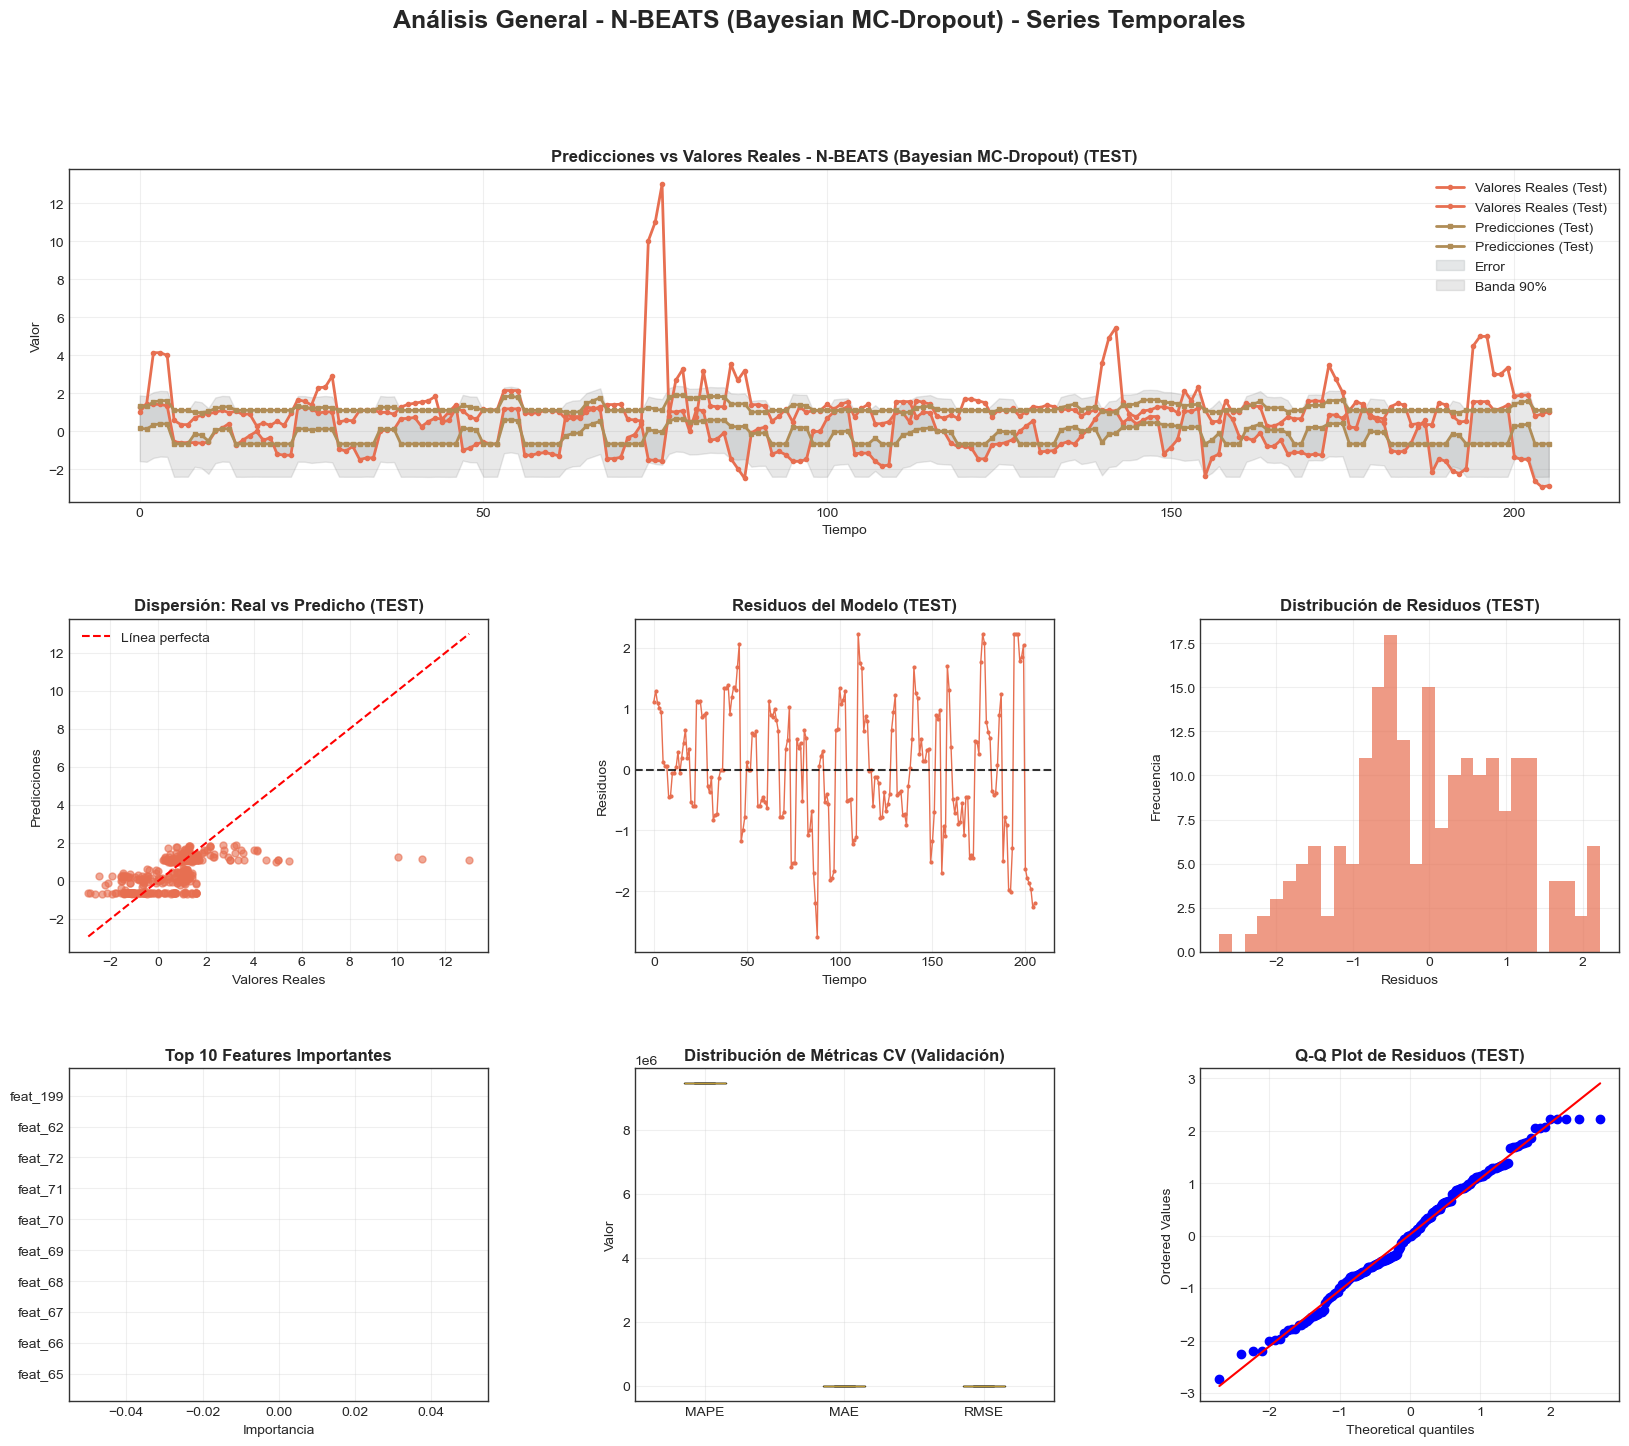

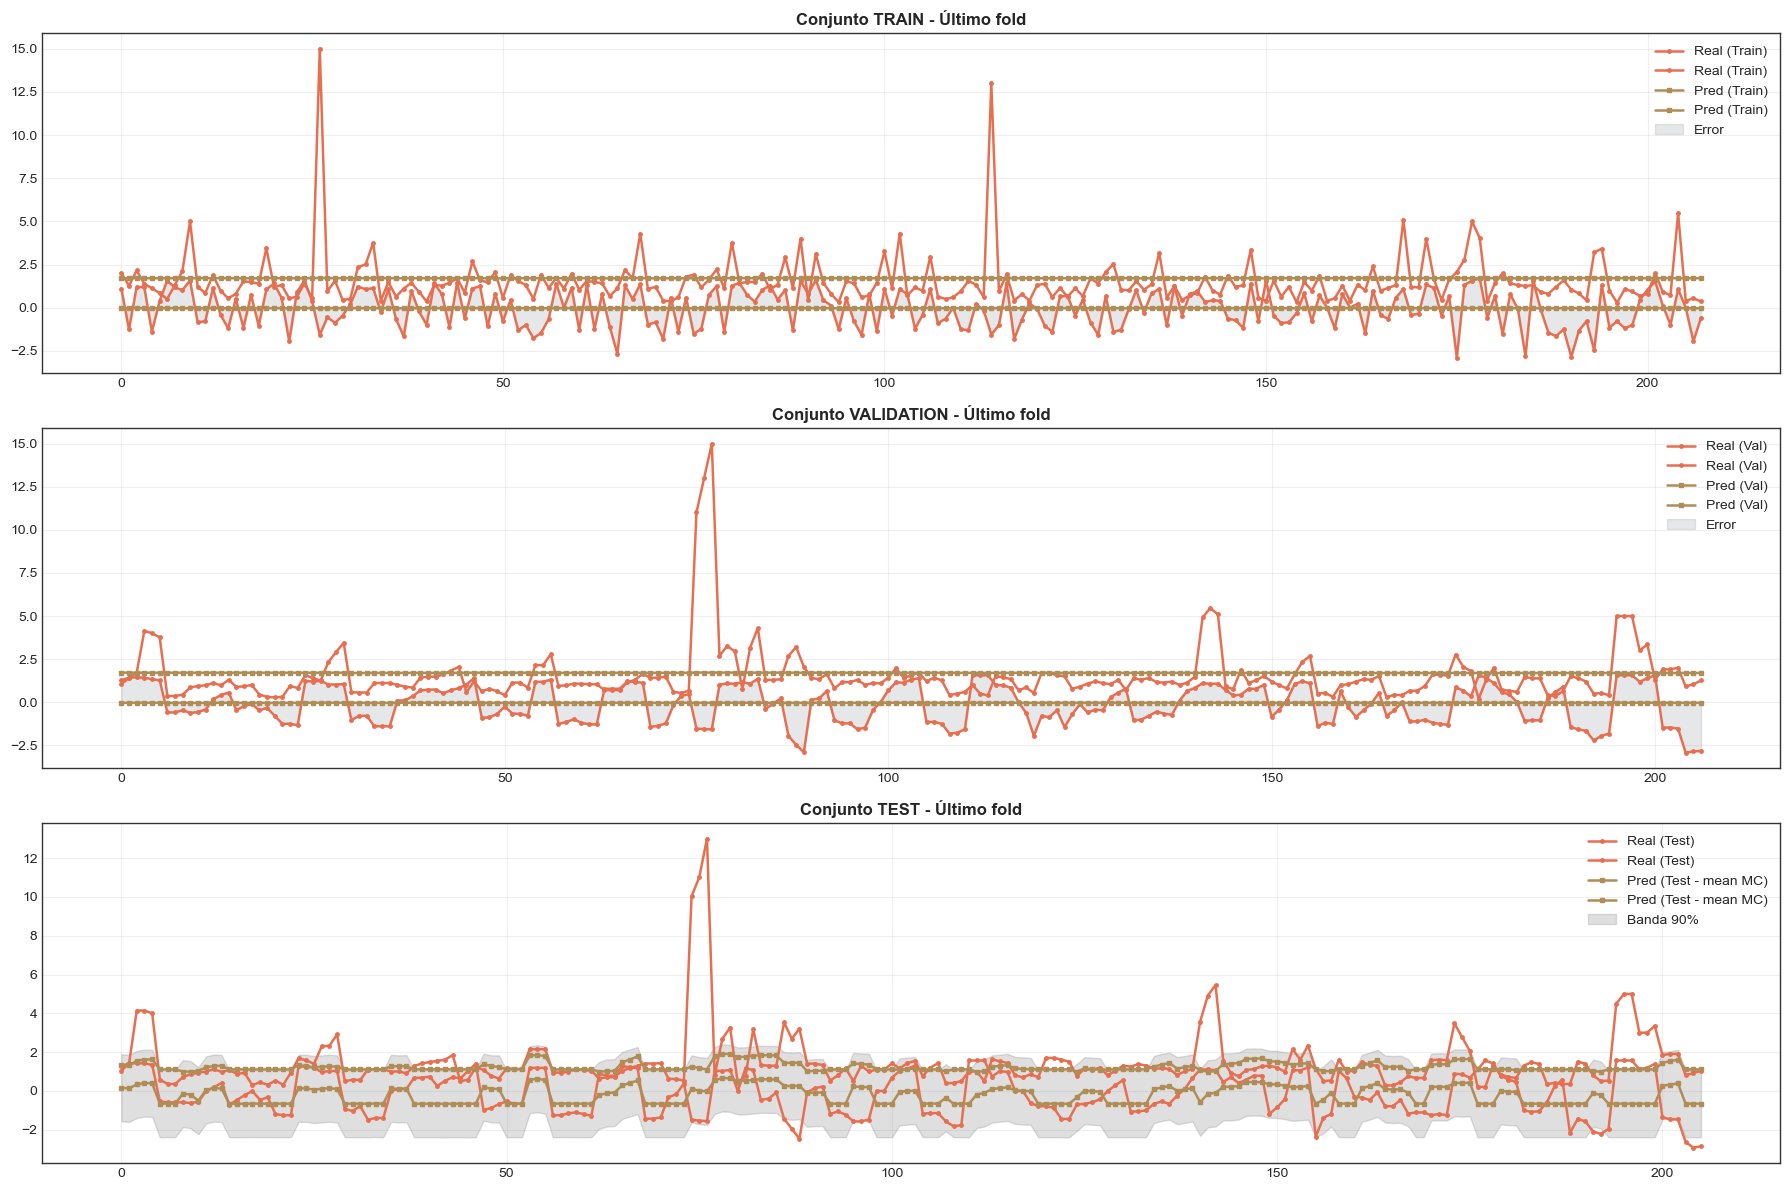

In [204]:
# ===== N-BEATS: métricas + gráficas estilo compañera =====

# 1) Predicciones puntuales en TRAIN/VAL usando el modelo seleccionado por Val
Ytr_true, Ytr_pred = preds_point(nbeats, train_loader, DEVICE)
Yva_true, Yva_pred = preds_point(nbeats, val_loader,   DEVICE)

# 2) TEST: usamos la media MC del modelo reentrenado (nb_final)
#Yte_true = np.vstack([y for _, y in test_loader.dataset])  # ya lo tienes arriba como Ytest
Yte_true = Ytest  # ✅ Datos con forma correcta (206,7,2)
Yte_mean = mean_te                                         # media MC ya calculada
# banda 90%: prioriza la calibrada si la tienes
Yte_lo = lo_te_cal if 'lo_te_cal' in globals() else lo_te_mc
Yte_hi = hi_te_cal if 'hi_te_cal' in globals() else hi_te_mc

# 3) Métricas y BDS (coinciden con el resto)
print("\n[N-BEATS] Métricas")
for tag,(yt,yp) in {"Train":(Ytr_true,Ytr_pred),"Val":(Yva_true,Yva_pred),"Test":(Yte_true,Yte_mean)}.items():
    line=f"{tag:>5}: MAPE={MAPE(yt,yp):.4f}% | MAE={MAE(yt,yp):.6f} | RMSE={RMSE(yt,yp):.6f}"
    if tag!="Train": line+=f" | sMAPE={sMAPE(yt,yp):.2f}%"
    print(line)
print("[N-BEATS] BDS (residuos TEST, h=t+1):", run_bds(Yte_true[:,0]-Yte_mean[:,0], max_dim=6))

# 4) Gráficas (idénticas al resto, con banda 90% en TEST)
plot_like_partner_nbeats("N-BEATS (Bayesian MC-Dropout)",
                         Ytr_true, Ytr_pred, Yva_true, Yva_pred,
                         Yte_true, Yte_mean,
                         df, LOOKBACK,
                         lo_band=Yte_lo, hi_band=Yte_hi)

In [206]:
# Primero define h (el horizonte que quieres analizar)
h = 0  # Por ejemplo, para t+1

# Luego necesitas aplanar o seleccionar una sola columna
# Si quieres analizar solo una de las dos salidas (lat o lon):
output_idx = 0  # 0 para la primera salida, 1 para la segunda

LO = lo_te_cal[:, h, output_idx]    # Ahora es 1D
HI = hi_te_cal[:, h, output_idx]    # Ahora es 1D
PRED = mean_te[:, h, output_idx]    # Ahora es 1D
TRUE = Ytest[:, h, output_idx]      # Ahora es 1D

width = HI - LO
half = width / 2.0
cov = np.mean((TRUE >= LO) & (TRUE <= HI))

print(f"Ancho medio de banda (h=t+{h+1}): {width.mean():.6f}")
print(f"Radio medio (±):                 ±{half.mean():.6f}")
print("Cuantiles del ancho (10/50/90%):",
      [f"{q:.6f}" for q in np.quantile(width, [0.10, 0.50, 0.90])])
print(f"Coverage empírico:               {cov:.3f}")

# Tabla por fecha con lo/hi
dates = last_block_dates(df, len(TRUE), offset=0)
intervals_df = pd.DataFrame({
    "ds": dates,
    "y_true": TRUE,
    "y_pred_mean": PRED,
    "lo": LO,
    "hi": HI,
    "width": width,
    "half_width": half,
    "inside_90": (TRUE >= LO) & (TRUE <= HI),
})
print(intervals_df.head(10))

Ancho medio de banda (h=t+1): 3.454781
Radio medio (±):                 ±1.727390
Cuantiles del ancho (10/50/90%): ['3.454782', '3.454782', '3.454782']
Coverage empírico:               0.888
   ds    y_true  y_pred_mean        lo        hi     width  half_width  \
0   0  1.279340     0.168336 -1.559054  1.895727  3.454782    1.727391   
1   1  1.428899     0.131347 -1.596043  1.858738  3.454782    1.727391   
2   2  1.425486     0.337194 -1.390197  2.064585  3.454782    1.727391   
3   3  1.425486     0.407105 -1.320286  2.134496  3.454782    1.727391   
4   4  1.343997     0.392546 -1.334844  2.119937  3.454782    1.727391   
5   5 -0.540420    -0.658330 -2.385721  1.069061  3.454782    1.727391   
6   6 -0.588003    -0.651718 -2.379108  1.075673  3.454782    1.727391   
7   7 -0.588003    -0.653598 -2.380989  1.073793  3.454782    1.727391   
8   8 -0.588003    -0.131531 -1.858921  1.595860  3.454782    1.727391   
9   9 -0.620250    -0.191695 -1.919086  1.535696  3.454782    1.72739

# Resultados

In [218]:
# === Datos de Train ===
df_train = pd.DataFrame({
    "Modelo": ["KNN", "Decision Tree", "Random Forest", "XGBoost", "SVR (RBF)", "MLP", "RNN", "LSTM", "N-BEATS"],
    "Train MAPE": ["61.6277%", "60923442.5139%", "18071639.7888%", "36936.3070%", "1788404.9668%", "7219044.7557%", "57602076.0738%", "22668965.4429%", "9608445.1482%"],
    "Train MAE": [0.000001, 0.593727, 0.176111, 0.000297, 0.016497, 0.862112, 0.476071, 0.214995, 0.898658],
    "Train RMSE": [0.000004, 0.880555, 0.295977, 0.000358, 0.020847, 1.188377, 0.758783, 0.376890, 1.174409],
    "Train MSE": [0.000000016, 0.775377, 0.087602, 0.000128, 0.000434, 1.412240, 0.575752, 0.142046, 1.379237],
    "BDS Test": ["Residuos NO independientes", "Residuos NO independientes", "Residuos independientes", 
                 "Residuos NO independientes", "Residuos NO independientes", "Residuos NO independientes",
                 "Residuos NO independientes", "Residuos independientes", "Residuos NO independientes"]
})

# === Datos de Validation ===
df_val = pd.DataFrame({
    "Modelo": ["KNN", "Decision Tree", "Random Forest", "XGBoost", "SVR (RBF)", "MLP", "RNN", "LSTM", "N-BEATS"],
    "Val MAPE": ["23072942.2392%", "68007300.0792%", "30454236.9005%", "18534984.1555%", "33603197.6966%", "7681957.0419%", "60909076.6167%", "31433284.9546%", "9446526.8632%"],
    "Val MAE": [0.196383, 0.616334, 0.271871, 0.146771, 0.282873, 0.862310, 0.502106, 0.281827, 0.901313],
    "Val RMSE": [0.552011, 0.949099, 0.570564, 0.517411, 0.673387, 1.238791, 0.831701, 0.539617, 1.224186],
    "Val MSE": [0.304716, 0.900789, 0.325543, 0.267714, 0.453450, 1.534603, 0.691726, 0.291186, 1.498631],
    "Val sMAPE": ["23.04%", "63.05%", "30.58%", "17.41%", "31.18%", "116.85%", "53.39%", "31.54%", "117.25%"],
    "BDS Test": ["Residuos NO independientes", "Residuos NO independientes", "Residuos independientes", 
                 "Residuos NO independientes", "Residuos NO independientes", "Residuos NO independientes",
                 "Residuos NO independientes", "Residuos independientes", "Residuos NO independientes"]
})

# === Datos de Test ===
df_test = pd.DataFrame({
    "Modelo": ["KNN", "Decision Tree", "Random Forest", "XGBoost", "SVR (RBF)", "MLP", "RNN", "LSTM", "N-BEATS"],
    "Test MAPE": ["39938595.3365%", "62111948.2259%", "32281029.6121%", "24877618.7023%", "48926776.8399%", "8623678.1473%", "61465484.3764%", "35681257.9861%", "52811243.6957%"],
    "Test MAE": [0.169211, 0.576209, 0.232165, 0.147315, 0.322745, 0.859353, 0.456823, 0.232375, 0.746676],
    "Test RMSE": [0.535271, 1.004173, 0.565599, 0.510887, 0.739414, 1.231493, 0.790216, 0.485876, 1.197628],
    "Test MSE": [0.286515, 1.008363, 0.319902, 0.261005, 0.546733, 1.516575, 0.624441, 0.236076, 1.434313],
    "Test sMAPE": ["19.10%", "58.62%", "26.19%", "17.48%", "33.70%", "116.27%", "49.71%", "27.64%", "78.78%"],
    "BDS Test": ["Residuos NO independientes", "Residuos NO independientes", "Residuos independientes", 
                 "Residuos NO independientes", "Residuos NO independientes", "Residuos NO independientes",
                 "Residuos NO independientes", "Residuos independientes", "Residuos NO independientes"]
})

## Resultado de Training

In [219]:
import pandas as pd
from IPython.display import display


# === Columna auxiliar: 0 = independientes, 1 = NO independientes ===
df_train["BDS_flag"] = df_train["BDS Test"].apply(lambda x: 0 if "NO" not in x else 1)

# === Orden: primero BDS independientes, luego Train RMSE ascendente ===
df_train = df_train.sort_values(by=["BDS_flag","Train RMSE"], ascending=[True, True]).reset_index(drop=True)

# === Colores para BDS ===
def highlight_bds(val: str):
    if "NO" not in val:
        return "background-color:#E8F5E9; color:#1B5E20; font-weight:bold;"
    return "background-color:#FFEBEE; color:#B71C1C; font-weight:bold;"

# === Estilo visual ===
styled_train = (
    df_train.drop(columns=["BDS_flag"])
        .style
        .applymap(highlight_bds, subset=["BDS Test"])
        .set_table_styles([
            {"selector": "th", "props": [
                ("background-color", "#4CAF50"),
                ("color", "white"),
                ("font-size", "14px"),
                ("text-align", "center"),
                ("padding", "8px")
            ]},
            {"selector": "table", "props": [
                ("border-collapse", "collapse"),
                ("margin", "0 auto"),
                ("font-family", "Georgia, serif"),
                ("font-size", "13px")
            ]},
            {"selector": "td", "props": [("text-align", "center"), ("padding", "6px")]}
        ])
        .format({"Train MAE": "{:.6f}", "Train RMSE": "{:.6f}", "Train MSE": "{:.6f}"})
        .set_properties(**{"border": "1px solid #dddddd"})
)

# === Mostrar en el notebook ===
display(styled_train)

/var/folders/_p/446c73rj4x19qh7rmqlrf1980000gp/T/ipykernel_92315/2732124800.py:21: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_bds, subset=["BDS Test"])


## Resultado validación 

In [220]:
import pandas as pd
from IPython.display import display


# === Orden combinado: BDS (independientes primero) + Val RMSE ascendente ===
df_val["BDS_flag"] = df_val["BDS Test"].apply(lambda x: 0 if "NO" not in x else 1)
df_val = df_val.sort_values(by=["BDS_flag", "Val RMSE"], ascending=[True, True]).reset_index(drop=True)

# === Colores para BDS ===
def highlight_bds(val: str):
    if "NO" not in val:
        return "background-color:#E8F5E9; color:#1B5E20; font-weight:bold;"
    return "background-color:#FFEBEE; color:#B71C1C; font-weight:bold;"

# === Estilo ===
styled_val = (
    df_val.drop(columns=["BDS_flag"])   # ocultar columna auxiliar
        .style
        .applymap(highlight_bds, subset=["BDS Test"])
        .set_table_styles([
            {"selector": "th", "props": [
                ("background-color", "#4CAF50"),
                ("color", "white"),
                ("font-size", "14px"),
                ("text-align", "center"),
                ("padding", "8px")
            ]},
            {"selector": "table", "props": [
                ("border-collapse", "collapse"),
                ("margin", "0 auto"),
                ("font-family", "Georgia, serif"),
                ("font-size", "13px")
            ]},
            {"selector": "td", "props": [("text-align", "center"), ("padding", "6px")]}
        ])
        .format({"Val MAE": "{:.6f}", "Val RMSE": "{:.6f}", "Val MSE": "{:.6f}"})
        .set_properties(**{"border": "1px solid #dddddd"})
)

# === Mostrar en el notebook ===
display(styled_val)

/var/folders/_p/446c73rj4x19qh7rmqlrf1980000gp/T/ipykernel_92315/4037125152.py:19: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_bds, subset=["BDS Test"])


## Resultados Test

In [221]:
import pandas as pd
from IPython.display import display



# === Columna auxiliar para ordenar por independencia (0=independientes, 1=no) ===
df_test["BDS_flag"] = df_test["BDS Test"].apply(lambda x: 0 if "NO" not in x else 1)

# === Ordenar primero por BDS_flag (independientes arriba), luego por RMSE ===
df_test = df_test.sort_values(by=["BDS_flag","Test RMSE"], ascending=[True, True]).reset_index(drop=True)

# === Función de colores para BDS ===
def highlight_bds(val: str):
    if "NO" not in val:
        return "background-color:#E8F5E9; color:#1B5E20; font-weight:bold;"
    return "background-color:#FFEBEE; color:#B71C1C; font-weight:bold;"

# === Estilo ===
styled_test = (
    df_test.drop(columns=["BDS_flag"])  # ya no mostramos la auxiliar
        .style
        .applymap(highlight_bds, subset=["BDS Test"])
        .set_table_styles([
            {"selector": "th", "props": [
                ("background-color", "#4CAF50"),
                ("color", "white"),
                ("font-size", "14px"),
                ("text-align", "center"),
                ("padding", "8px")
            ]},
            {"selector": "table", "props": [
                ("border-collapse", "collapse"),
                ("margin", "0 auto"),
                ("font-family", "Georgia, serif"),
                ("font-size", "13px")
            ]},
            {"selector": "td", "props": [("text-align", "center"), ("padding", "6px")]}
        ])
        .format({"Test MAE": "{:.6f}", "Test RMSE": "{:.6f}", "Test MSE": "{:.6f}"})
        .set_properties(**{"border": "1px solid #dddddd"})
)

# === Mostrar en el notebook ===
display(styled_test)

/var/folders/_p/446c73rj4x19qh7rmqlrf1980000gp/T/ipykernel_92315/300298435.py:22: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_bds, subset=["BDS Test"])
